In [1]:
# standard data analysis modules
import pandas as pd
import numpy as np

from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter, MaxNLocator
import matplotlib.ticker as ticker

from datetime import datetime

import io
import requests

import time

%matplotlib inline
pd.options.display.max_columns = None

In [2]:
# check on the panda version and its dependencies
#pd.__version__
#pd.show_versions()

In [3]:
# to read a directory on my PC
import glob # not used in this code, data taken direct from government website

In [4]:
# to take dates from file names and convert currency columns to integers
import re # actually, i dont use that in this code

In [5]:
# to prepare the powerpoint presentation
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN
from pptx.enum.text import MSO_ANCHOR
from pptx.enum.dml import MSO_FILL
from pptx.dml.color import RGBColor

In [6]:
# Presentation preperation and image saving

# toggle to switch on image saving: 0 = off, 1 = on (i.e.save images and also slide titles)
savePNG = 0

# toggle to switch on powerpoint preparation: 0 = off, 1 = on (automatically saves the images also)
PwrptPrep = 1

# list of slide titles, text and images to add
monthNow = ''
presentationTitle = ['Covid UK data visualisation', 'Andrew Neville']
saveFileName = 'presentationPrep - coviduk.pptx'
slideTitle = []
slideText = []
imagePath = []

In [7]:
# download direct from the UK government website

def load_from_website(url):
    
    #url="https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv"
    s=requests.get(url).content
    c=pd.read_csv(io.StringIO(s.decode('utf-8')))
    
    return c

In [8]:
# url_list = [
# 'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newCasesBySpecimenDate%22:%22newCasesBySpecimenDate%22,%22cumCasesBySpecimenDate%22:%22cumCasesBySpecimenDate%22%7D&format=csv',
# 'https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=newDeaths28DaysByDeathDate&metric=cumDeaths28DaysByDeathDate&format=csv',
# 'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newAdmissions%22:%22newAdmissions%22,%22cumAdmissions%22:%22cumAdmissions%22%7D&format=csv',
# 'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22hospitalCases%22:%22hospitalCases%22%7D&format=csv',
# 'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22covidOccupiedMVBeds%22:%22covidOccupiedMVBeds%22%7D&format=csv',
# 'https://coronavirus.data.gov.uk/api/v1/data?filters=areaName=United%2520Kingdom;areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newVirusTests%22:%22newVirusTests%22,%22cumVirusTests%22:%22cumVirusTests%22%7D&format=csv',
# 'https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=newCasesBySpecimenDateAgeDemographics&format=csv',
# 'https://api.coronavirus.data.gov.uk/v2/data?areaType=nation&areaCode=E92000001&metric=newCasesBySpecimenDateAgeDemographics&metric=newDeaths28DaysByDeathDateAgeDemographics&format=csv',
# 'https://api.coronavirus.data.gov.uk/v2/data?areaType=nation&areaCode=E92000001&metric=cumAdmissionsByAge&format=csv',
# 'https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=cumPeopleVaccinatedFirstDoseByPublishDate&metric=newPeopleVaccinatedFirstDoseByPublishDate&metric=newPeopleVaccinatedSecondDoseByPublishDate&metric=cumPeopleVaccinatedSecondDoseByPublishDate&format=csv',
# 'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000004&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',    
# 'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000006&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
# 'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000007&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
# 'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000001&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
# 'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000001&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
# 'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000008&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
# 'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000009&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
# 'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000005&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
# 'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000003&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',   
#             ]


In [9]:
# delay each download by 11 seconds to abide by fair use policy

url_list = [
'https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=newCasesBySpecimenDate&metric=cumCasesBySpecimenDate&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=newDeaths28DaysByDeathDate&metric=cumDeaths28DaysByDeathDate&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=newAdmissions&metric=cumAdmissions&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=hospitalCases&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=covidOccupiedMVBeds&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=newVirusTests&metric=cumVirusTests&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=newCasesBySpecimenDateAgeDemographics&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=nation&areaCode=E92000001&metric=newCasesBySpecimenDateAgeDemographics&metric=newDeaths28DaysByDeathDateAgeDemographics&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=nation&areaCode=E92000001&metric=cumAdmissionsByAge&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=cumPeopleVaccinatedFirstDoseByPublishDate&metric=newPeopleVaccinatedFirstDoseByPublishDate&metric=newPeopleVaccinatedSecondDoseByPublishDate&metric=cumPeopleVaccinatedSecondDoseByPublishDate&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000004&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',    
'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000006&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000007&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000001&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000001&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000008&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000009&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000005&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000003&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',   
            ]

i=0
sleep_time = 11

df_cases = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_deaths = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_hospital_a = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_hospital_t = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_hospital_v = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_testing = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_casesAge = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_eng_cd = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_eng_cumadmissionsbyage = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_vac = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_EM = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_EE = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_LO = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_NE = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_NW = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_SE = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_SW = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_WM = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_YH = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1


In [10]:
# sort all dataframes by date

df_cases = df_cases.sort_values('date').reset_index(drop=True)
df_deaths = df_deaths.sort_values('date').reset_index(drop=True)
df_hospital_a = df_hospital_a.sort_values('date').reset_index(drop=True)
df_hospital_t = df_hospital_t.sort_values('date').reset_index(drop=True)
df_hospital_v = df_hospital_v.sort_values('date').reset_index(drop=True)
df_testing = df_testing.sort_values('date').reset_index(drop=True)
df_casesAge = df_casesAge.sort_values('date').reset_index(drop=True)
df_eng_cd = df_eng_cd.sort_values('date').reset_index(drop=True)
df_eng_cumadmissionsbyage = df_eng_cumadmissionsbyage.sort_values('date').reset_index(drop=True)
df_vac = df_vac.sort_values('date').reset_index(drop=True)
df_EM = df_EM.sort_values('date').reset_index(drop=True)
df_EE = df_EE.sort_values('date').reset_index(drop=True)
df_LO = df_LO.sort_values('date').reset_index(drop=True)
df_NE = df_NE.sort_values('date').reset_index(drop=True)
df_NW = df_NW.sort_values('date').reset_index(drop=True)
df_SE = df_SE.sort_values('date').reset_index(drop=True)
df_SW = df_SW.sort_values('date').reset_index(drop=True)
df_WM = df_WM.sort_values('date').reset_index(drop=True)
df_YH = df_YH.sort_values('date').reset_index(drop=True)


In [11]:
df_casesAge.tail()

date  areaType   areaCode        areaName  \
7981  2021-01-26  overview  K02000001  United Kingdom   
7982  2021-01-26  overview  K02000001  United Kingdom   
7983  2021-01-26  overview  K02000001  United Kingdom   
7984  2021-01-26  overview  K02000001  United Kingdom   
7985  2021-01-26  overview  K02000001  United Kingdom   

                                     metric         age  cases  rollingRate  \
7981  newCasesBySpecimenDateAgeDemographics  unassigned     23          NaN   
7982  newCasesBySpecimenDateAgeDemographics         60+   4753        206.1   
7983  newCasesBySpecimenDateAgeDemographics       00_59  19559        278.2   
7984  newCasesBySpecimenDateAgeDemographics       55_59   1809        292.4   
7985  newCasesBySpecimenDateAgeDemographics       00_04    692        131.3   

      rollingSum  
7981         201  
7982       33246  
7983      140936  
7984       12883  
7985        5066

In [12]:
# # function to create dataframes

# def create_dataframe(file_name):
       
#     #upload the files to seperate dataframes   
#     file = str(folder[0]) + '/' + str(file_name) + '.csv'
       
#     # recognise the date column as a date
#     try:
#         dateparse = lambda x: datetime.strptime(x, '%d/%m/%Y')
#         df = pd.read_csv(file, parse_dates={'datetime': ['date']}, date_parser=dateparse)
#     except:
#         dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
#         df = pd.read_csv(file, parse_dates={'datetime': ['date']}, date_parser=dateparse)
    
#     df = df.sort_values(by=['datetime']).reset_index(drop=True)
    
#     return df    

In [13]:
# sources

# df_deathsAges
# https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/weeklyprovisionalfiguresondeathsregisteredinenglandandwales
# https://www.ons.gov.uk/file?uri=%2fpeoplepopulationandcommunity%2fbirthsdeathsandmarriages%2fdeaths%2fdatasets%2fweeklyprovisionalfiguresondeathsregisteredinenglandandwales%2f2020/publishedweek532020.xlsx

# https://www.ons.gov.uk/file?uri=%2fpeoplepopulationandcommunity%2fbirthsdeathsandmarriages%2fdeaths%2fdatasets%2fweeklyprovisionalfiguresondeathsregisteredinenglandandwales%2f2021/publishedweek012021.xlsx


In [14]:
# read the deaths by ages excel file for 2020

url = 'https://www.ons.gov.uk/file?uri=%2fpeoplepopulationandcommunity%2fbirthsdeathsandmarriages%2fdeaths%2fdatasets%2fweeklyprovisionalfiguresondeathsregisteredinenglandandwales%2f2020/publishedweek532020.xlsx'

s=requests.get(url).content
df_deathsAges_20 = pd.read_excel(io.BytesIO(s),
                              nrows = 25, header = 5, sheet_name='Covid-19 - Weekly occurrences')

df_deathsAges_all_20 = pd.read_excel(io.BytesIO(s),
                              nrows = 35, header = 5, sheet_name='Weekly figures 2020')

In [15]:
# set variables to lists, will replacve with a dataframe

df_deathsAges_21 = []
df_deathsAges_all_2 = []

In [16]:
# read the deaths by ages excel file for 2021

# look for the most up to date file
url1 = 'https://www.ons.gov.uk/file?uri=%2fpeoplepopulationandcommunity%2fbirthsdeathsandmarriages%2fdeaths%2fdatasets%2fweeklyprovisionalfiguresondeathsregisteredinenglandandwales%2f2021/publishedweek'
url2 = '2021.xlsx'

for i in range(53,0,-1):
    url3 = str(i)
    if len(str(i)) == 1:
        url3 = '0' + str(i)
    url = url1 + url3 + url2
    
    try:
        s=requests.get(url).content
        df_deathsAges_21 = pd.read_excel(io.BytesIO(s),
                              nrows = 25, header = 5, sheet_name='Covid-19 - Weekly occurrences')
        df_deathsAges_all_21 = pd.read_excel(io.BytesIO(s),
                              nrows = 35, header = 5, sheet_name='Weekly figures 2021')

        df_deathsAges_21.shape # this forces an error if nothing there
      
        break
    except:
        continue


In [17]:
print(url)

https://www.ons.gov.uk/file?uri=%2fpeoplepopulationandcommunity%2fbirthsdeathsandmarriages%2fdeaths%2fdatasets%2fweeklyprovisionalfiguresondeathsregisteredinenglandandwales%2f2021/publishedweek022021.xlsx


In [18]:
# df_deathsAges_xx contains the weekly deaths by age for covid
# df_deathsAges_all_xx contains the cumulative deaths by age and totals and 5 year average for all causes

In [19]:
# merging the df_deathsAges_21 and df_deathsAges_20

In [20]:
# it looks like df_deathsAges_21 is a continuation
# so no need to combine with df_deathsAges_20
# i can work with df_deathsAges_21 and convert to df_deathsAges

df_deathsAges_21.head()

Week ended           Unnamed: 1  \
0                                   NaN                  NaN   
1                                   NaN                  NaN   
2  Deaths involving COVID-19, all ages1                  NaN   
3                                   NaN            Persons 4   
4                                   NaN  Deaths by age group   

   2020-01-03 00:00:00  2020-01-10 00:00:00  2020-01-17 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  0.0                  0.0                  0.0   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

   2020-01-24 00:00:00  2020-01-31 00:00:00  2020-02-07 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  0.0                  1.0                  1.0   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

   2020-02-14 00:00:00  2020-02-21 00:00:00  2020-02-28 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  0.0                  0.0                  1.0   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

   2020-03-06 00:00:00  2020-03-13 00:00:00  2020-03-20 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  6.0                 44.0                407.0   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

   2020-03-27 00:00:00  2020-04-03 00:00:00  2020-04-10 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2               1882.0               5195.0               8265.0   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

   2020-04-17 00:00:00  2020-04-24 00:00:00  2020-05-01 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2               8334.0               6955.0               5230.0   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

   2020-05-08 00:00:00  2020-05-15 00:00:00  2020-05-22 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2               3992.0               2869.0               2294.0   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

   2020-05-29 00:00:00  2020-06-05 00:00:00  2020-06-12 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2               1786.0               1314.0                954.0   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

   2020-06-19 00:00:00  2020-06-26 00:00:00  2020-07-03 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                683.0                590.0                428.0   
3                  NaN                  NaN                  NaN   
4                  NaN          

In [21]:
df_deathsAges_21.tail()

Week ended Unnamed: 1  2020-01-03 00:00:00  2020-01-10 00:00:00  \
20        NaN      70-74                  0.0                  0.0   
21        NaN      75-79                  0.0                  0.0   
22        NaN      80-84                  0.0                  0.0   
23        NaN      85-89                  0.0                  0.0   
24        NaN        90+                  0.0                  0.0   

    2020-01-17 00:00:00  2020-01-24 00:00:00  2020-01-31 00:00:00  \
20                  0.0                  0.0                  0.0   
21                  0.0                  0.0                  0.0   
22                  0.0                  0.0                  1.0   
23                  0.0                  0.0                  0.0   
24                  0.0                  0.0                  0.0   

    2020-02-07 00:00:00  2020-02-14 00:00:00  2020-02-21 00:00:00  \
20                  0.0                  0.0                  0.0   
21                  0.0                  0.0                  0.0   
22                  0.0                  0.0                  0.0   
23                  0.0                  0.0                  0.0   
24                  0.0                  0.0                  0.0   

    2020-02-28 00:00:00  2020-03-06 00:00:00  2020-03-13 00:00:00  \
20                  0.0                  1.0                  6.0   
21                  0.0                  3.0                  2.0   
22                  0.0                  1.0                  8.0   
23                  0.0                  0.0                  8.0   
24                  0.0                  1.0                  7.0   

    2020-03-20 00:00:00  2020-03-27 00:00:00  2020-04-03 00:00:00  \
20                 40.0                217.0                600.0   
21                 46.0                291.0                814.0   
22                 74.0                355.0               1015.0   
23                 84.0                335.0                867.0   
24                 68.0                273.0                793.0   

    2020-04-10 00:00:00  2020-04-17 00:00:00  2020-04-24 00:00:00  \
20                864.0                789.0                582.0   
21               1229.0               1090.0                848.0   
22               1579.0               1570.0               1332.0   
23               1534.0               1735.0               1471.0   
24               1429.0               1715.0               1642.0   

    2020-05-01 00:00:00  2020-05-08 00:00:00  2020-05-15 00:00:00  \
20                396.0                342.0                203.0   
21                674.0                477.0                347.0   
22                990.0                714.0                545.0   
23               1118.0                902.0                652.0   
24               1342.0               1047.0                768.0   

    2020-05-22 00:00:00  2020-05-29 00:00:00  2020-06-05 00:00:00  \
20                187.0                139.0                111.0   
21                279.0                207.0                163.0   
22                422.0                358.0                256.0   
23                533.0                394.0                284.0   
24                612.0                456.0                334.0   

    2020-06-12 00:00:00  2020-06-19 00:00:00  2020-06-26 00:00:00  \
20                 69.0                 70.0                 48.0   
21                119.0                 89.0                 80.0   
22                198.0                129.0                122.0   
23                210.0                143.0                118.0   
24                237.0                159.0                145.0   

    2020-07-03 00:00:00  2020-07-10 00:00:00  2020-07-17 00:00:00  \
20                 37.0                 34.0                 32.0   
21                 57.0                 39.0                 33.0   
22                 84.0                 63.0           

In [22]:
# keep this code in in case we need it later in the year
# the df_deathsAges_21 may cease to include 2020 data at some point

# df_deathsAges_20 = df_deathsAges_20.drop([0,1,2,3,4]).reset_index(drop=True)
# df_deathsAges_20.drop(['Week ended'], axis=1, inplace=True)
# df_deathsAges_20.rename(columns={"Unnamed: 1": "age"}, inplace=True)

In [23]:
df_deathsAges_21 = df_deathsAges_21.drop([0,1,2,3,4]).reset_index(drop=True)
df_deathsAges_21.drop(['Week ended'], axis=1, inplace=True)
df_deathsAges_21.rename(columns={"Unnamed: 1": "age"}, inplace=True)
df_deathsAges_21.drop(list(df_deathsAges_21.filter(regex = 'Unnamed:')), axis = 1, inplace = True)

In [24]:
df_deathsAges_21.head()

age  2020-01-03 00:00:00  2020-01-10 00:00:00  2020-01-17 00:00:00  \
0     <1                  0.0                  0.0                  0.0   
1    1-4                  0.0                  0.0                  0.0   
2    5-9                  0.0                  0.0                  0.0   
3  10-14                  0.0                  0.0                  0.0   
4  15-19                  0.0                  0.0                  0.0   

   2020-01-24 00:00:00  2020-01-31 00:00:00  2020-02-07 00:00:00  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   2020-02-14 00:00:00  2020-02-21 00:00:00  2020-02-28 00:00:00  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   2020-03-06 00:00:00  2020-03-13 00:00:00  2020-03-20 00:00:00  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   2020-03-27 00:00:00  2020-04-03 00:00:00  2020-04-10 00:00:00  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  1.0                  0.0   
3                  0.0                  0.0                  1.0   
4                  2.0                  3.0                  1.0   

   2020-04-17 00:00:00  2020-04-24 00:00:00  2020-05-01 00:00:00  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  2.0                  0.0                  0.0   

   2020-05-08 00:00:00  2020-05-15 00:00:00  2020-05-22 00:00:00  \
0                  1.0                  1.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  1.0   
4                  0.0                  1.0                  0.0   

   2020-05-29 00:00:00  2020-06-05 00:00:00  2020-06-12 00:00:00  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  1.0                  0.0   
4                  0.0                  0.0                  0.0   

   2020-06-19 00:00:00  2020-06-26 00:00:00  2020-07-03 00:00:00  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   2020-07-10 00:00:00  2020-07-17 00:00:00  2020-07-24 00:00:00  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3         

In [25]:
# it looks like the 2021 file continues toe 'covid-19 - weekly occurrences' onwards

df_deathsAges = df_deathsAges_21.copy()

In [26]:
# getting the weekly totals and averages of all deaths for each year
# and merging them together to form df_deathsAges_all_totals


In [27]:
df_deathsAges_all_20[0:5]

Week ended Unnamed: 1  \
0                                                NaN        NaN   
1                                                NaN        NaN   
2                             Total deaths, all ages        NaN   
3             Total deaths: average of corresponding        NaN   
4  week over the previous 5 years 1, 10, 11 (Engl...        NaN   

   2020-01-03 00:00:00  2020-01-10 00:00:00  2020-01-17 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2              12254.0              14058.0              12990.0   
3                  NaN                  NaN                  NaN   
4              12175.0              13822.0              13216.0   

   2020-01-24 00:00:00  2020-01-31 00:00:00  2020-02-07 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2              11856.0              11612.0              10986.0   
3                  NaN                  NaN                  NaN   
4              12760.0              12206.0              11925.0   

   2020-02-14 00:00:00  2020-02-21 00:00:00  2020-02-28 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2              10944.0              10841.0              10816.0   
3                  NaN                  NaN                  NaN   
4              11627.0              11548.0              11183.0   

   2020-03-06 00:00:00  2020-03-13 00:00:00  2020-03-20 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2              10895.0              11019.0              10645.0   
3                  NaN                  NaN                  NaN   
4              11498.0              11205.0              10573.0   

   2020-03-27 00:00:00  2020-04-03 00:00:00  2020-04-10 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2              11141.0              16387.0              18516.0   
3                  NaN                  NaN                  NaN   
4              10130.0              10305.0              10520.0   

   2020-04-17 00:00:00  2020-04-24 00:00:00  2020-05-01 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2              22351.0              21997.0              17953.0   
3                  NaN                  NaN                  NaN   
4              10497.0              10458.0               9941.0   

   2020-05-08 00:00:00  2020-05-15 00:00:00  2020-05-22 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2              12657.0              14573.0              12288.0   
3                  NaN                  NaN                  NaN   
4               9576.0              10188.0               9940.0   

   2020-05-29 00:00:00  2020-06-05 00:00:00  2020-06-12 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2               9824.0              10709.0               9976.0   
3                  NaN                  NaN                  NaN   
4               8171.0               9977.0               9417.0   

   2020-06-19 00:00:00  2020-06-26 00:00:00  2020-07-03 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2               9339.0               8979.0               9140.0   
3                  NaN                  NaN                  NaN   
4               9404.0     

In [28]:
df_deathsAges_all_21[0:6]

Week ended Unnamed: 1  \
0                                                NaN        NaN   
1                                                NaN        NaN   
2                      Total deaths, all ages (2021)        NaN   
3                                                NaN        NaN   
4                      Total deaths, all ages (2020)        NaN   
5  Total deaths: average of corresponding week in...        NaN   

   2021-01-08 00:00:00  2021-01-15 00:00:00  2021-01-22 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2              17751.0              18042.0                  NaN   
3                  NaN                  NaN                  NaN   
4              12254.0              14058.0              12990.0   
5              12175.0              13822.0              13216.0   

   2021-01-29 00:00:00  2021-02-05 00:00:00  2021-02-12 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4              11856.0              11612.0              10986.0   
5              12760.0              12206.0              11925.0   

   2021-02-19 00:00:00  2021-02-26 00:00:00  2021-03-05 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4              10944.0              10841.0              10816.0   
5              11627.0              11548.0              11183.0   

   2021-03-12 00:00:00  2021-03-19 00:00:00  2021-03-26 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4              10895.0              11019.0              10645.0   
5              11498.0              11205.0              10573.0   

   2021-04-02 00:00:00  2021-04-09 00:00:00  2021-04-16 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4              11141.0              16387.0              18516.0   
5              10130.0              10305.0              10520.0   

   2021-04-23 00:00:00  2021-04-30 00:00:00  2021-05-07 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4              22351.0              21997.0              17953.0   
5              10497.0              10458.0               9941.0   

   2021-05-14 00:00:00  2021-05-21 00:00:00  2021-05-28 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4              12657.0              14573.0              12288.0   
5               9576.0              10188.0               9940.0   

   2021-06-04 00:00:00  2021-06-11 00:00:00  2021-06-18 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN       

In [29]:
# these dataframes have slightly different rows
# looking to keep the total deaths and average deaths

df_deathsAges_all_totals_20 = df_deathsAges_all_20.loc[[2,4]].reset_index(drop=True)
df_deathsAges_all_totals_21 = df_deathsAges_all_21.loc[[2,5]].reset_index(drop=True)

In [30]:
df_deathsAges_all_totals_20.drop('Unnamed: 1', axis=1, inplace=True)
df_deathsAges_all_totals_21.drop('Unnamed: 1', axis=1, inplace=True)
df_deathsAges_all_totals_21.drop('Week ended', axis=1, inplace=True) # drop 'week ended' column off 2021

In [31]:
df_deathsAges_all_totals_20.head()

Week ended  2020-01-03 00:00:00  \
0                             Total deaths, all ages              12254.0   
1  week over the previous 5 years 1, 10, 11 (Engl...              12175.0   

   2020-01-10 00:00:00  2020-01-17 00:00:00  2020-01-24 00:00:00  \
0              14058.0              12990.0              11856.0   
1              13822.0              13216.0              12760.0   

   2020-01-31 00:00:00  2020-02-07 00:00:00  2020-02-14 00:00:00  \
0              11612.0              10986.0              10944.0   
1              12206.0              11925.0              11627.0   

   2020-02-21 00:00:00  2020-02-28 00:00:00  2020-03-06 00:00:00  \
0              10841.0              10816.0              10895.0   
1              11548.0              11183.0              11498.0   

   2020-03-13 00:00:00  2020-03-20 00:00:00  2020-03-27 00:00:00  \
0              11019.0              10645.0              11141.0   
1              11205.0              10573.0              10130.0   

   2020-04-03 00:00:00  2020-04-10 00:00:00  2020-04-17 00:00:00  \
0              16387.0              18516.0              22351.0   
1              10305.0              10520.0              10497.0   

   2020-04-24 00:00:00  2020-05-01 00:00:00  2020-05-08 00:00:00  \
0              21997.0              17953.0              12657.0   
1              10458.0               9941.0               9576.0   

   2020-05-15 00:00:00  2020-05-22 00:00:00  2020-05-29 00:00:00  \
0              14573.0              12288.0               9824.0   
1              10188.0               9940.0               8171.0   

   2020-06-05 00:00:00  2020-06-12 00:00:00  2020-06-19 00:00:00  \
0              10709.0               9976.0               9339.0   
1               9977.0               9417.0               9404.0   

   2020-06-26 00:00:00  2020-07-03 00:00:00  2020-07-10 00:00:00  \
0               8979.0               9140.0               8690.0   
1               9293.0               9183.0               9250.0   

   2020-07-17 00:00:00  2020-07-24 00:00:00  2020-07-31 00:00:00  \
0               8823.0               8891.0               8946.0   
1               9093.0               9052.0               9036.0   

   2020-08-07 00:00:00  2020-08-14 00:00:00  2020-08-21 00:00:00  \
0               8945.0               9392.0               9631.0   
1               9102.0               9085.0               9157.0   

   2020-08-28 00:00:00  2020-09-04 00:00:00  2020-09-11 00:00:00  \
0               9032.0               7739.0               9811.0   
1               8241.0               9182.0               9306.0   

   2020-09-18 00:00:00  2020-09-25 00:00:00  2020-10-02 00:00:00  \
0               9523.0               9634.0               9945.0   
1               9264.0               9377.0               9555.0   

   2020-10-09 00:00:00  2020-10-16 00:00:00  2020-10-23 00:00:00  \
0               9954.0              10534.0              10739.0   
1               9811.0               9865.0               9759.0   

   2020-10-30 00:00:00  2020-11-06 00:00:00  2020-11-13 00:00:00  \
0              10887.0              11812.0              12254.0   
1               9891.0              10331.0              10350.0   

   2020-11-20 00:00:00  2020-11-27 00:00:00  2020-12-04 00:00:00  \
0              12535.0              12456.0              12303.0   
1              10380.0              10357.0              10695.0   

   2020-12-11 00:00:00  2020-12-18 00:00:00  2020-12-25 00:00:00  \
0              12292.0              13011.0              11520.0   
1              10750.0              11548.0               7954.0   

   2021-01-01 00:00:00  
0              10069.0  
1               7954.0

In [32]:
df_deathsAges_all_totals_21.head()

2021-01-08 00:00:00  2021-01-15 00:00:00  2021-01-22 00:00:00  \
0              17751.0              18042.0                  NaN   
1              12175.0              13822.0              13216.0   

   2021-01-29 00:00:00  2021-02-05 00:00:00  2021-02-12 00:00:00  \
0                  NaN                  NaN                  NaN   
1              12760.0              12206.0              11925.0   

   2021-02-19 00:00:00  2021-02-26 00:00:00  2021-03-05 00:00:00  \
0                  NaN                  NaN                  NaN   
1              11627.0              11548.0              11183.0   

   2021-03-12 00:00:00  2021-03-19 00:00:00  2021-03-26 00:00:00  \
0                  NaN                  NaN                  NaN   
1              11498.0              11205.0              10573.0   

   2021-04-02 00:00:00  2021-04-09 00:00:00  2021-04-16 00:00:00  \
0                  NaN                  NaN                  NaN   
1              10130.0              10305.0              10520.0   

   2021-04-23 00:00:00  2021-04-30 00:00:00  2021-05-07 00:00:00  \
0                  NaN                  NaN                  NaN   
1              10497.0              10458.0               9941.0   

   2021-05-14 00:00:00  2021-05-21 00:00:00  2021-05-28 00:00:00  \
0                  NaN                  NaN                  NaN   
1               9576.0              10188.0               9940.0   

   2021-06-04 00:00:00  2021-06-11 00:00:00  2021-06-18 00:00:00  \
0                  NaN                  NaN                  NaN   
1               8171.0               9977.0               9417.0   

   2021-06-25 00:00:00  2021-07-02 00:00:00  2021-07-09 00:00:00  \
0                  NaN                  NaN                  NaN   
1               9404.0               9293.0               9183.0   

   2021-07-16 00:00:00  2021-07-23 00:00:00  2021-07-30 00:00:00  \
0                  NaN                  NaN                  NaN   
1               9250.0               9093.0               9052.0   

   2021-08-06 00:00:00  2021-08-13 00:00:00  2021-08-20 00:00:00  \
0                  NaN                  NaN                  NaN   
1               9036.0               9102.0               9085.0   

   2021-08-27 00:00:00  2021-09-03 00:00:00  2021-09-10 00:00:00  \
0                  NaN                  NaN                  NaN   
1               9157.0               8241.0               9182.0   

   2021-09-17 00:00:00  2021-09-24 00:00:00  2021-10-01 00:00:00  \
0                  NaN                  NaN                  NaN   
1               9306.0               9264.0               9377.0   

   2021-10-08 00:00:00  2021-10-15 00:00:00  2021-10-22 00:00:00  \
0                  NaN                  NaN                  NaN   
1               9555.0               9811.0               9865.0   

   2021-10-29 00:00:00  2021-11-05 00:00:00  2021-11-12 00:00:00  \
0                  NaN                  NaN                  NaN   
1               9759.0               9891.0              10331.0   

   2021-11-19 00:00:00  2021-11-26 00:00:00  2021-12-03 00:00:00  \
0                  NaN                  NaN                  NaN   
1              10350.0              10380.0              10357.0   

   2021-12-10 00:00:00  2021-12-17 00:00:00  2021-12-24 00:00:00  \
0                  NaN                  NaN                  NaN   
1              10695.0              10750.0              11548.0   

   2021-12-31 00:00:00  
0                  NaN  
1               7954.0

In [33]:
df_deathsAges_all_totals = df_deathsAges_all_totals_20.join(df_deathsAges_all_totals_21)

In [34]:
df_deathsAges_all_totals

Week ended  2020-01-03 00:00:00  \
0                             Total deaths, all ages              12254.0   
1  week over the previous 5 years 1, 10, 11 (Engl...              12175.0   

   2020-01-10 00:00:00  2020-01-17 00:00:00  2020-01-24 00:00:00  \
0              14058.0              12990.0              11856.0   
1              13822.0              13216.0              12760.0   

   2020-01-31 00:00:00  2020-02-07 00:00:00  2020-02-14 00:00:00  \
0              11612.0              10986.0              10944.0   
1              12206.0              11925.0              11627.0   

   2020-02-21 00:00:00  2020-02-28 00:00:00  2020-03-06 00:00:00  \
0              10841.0              10816.0              10895.0   
1              11548.0              11183.0              11498.0   

   2020-03-13 00:00:00  2020-03-20 00:00:00  2020-03-27 00:00:00  \
0              11019.0              10645.0              11141.0   
1              11205.0              10573.0              10130.0   

   2020-04-03 00:00:00  2020-04-10 00:00:00  2020-04-17 00:00:00  \
0              16387.0              18516.0              22351.0   
1              10305.0              10520.0              10497.0   

   2020-04-24 00:00:00  2020-05-01 00:00:00  2020-05-08 00:00:00  \
0              21997.0              17953.0              12657.0   
1              10458.0               9941.0               9576.0   

   2020-05-15 00:00:00  2020-05-22 00:00:00  2020-05-29 00:00:00  \
0              14573.0              12288.0               9824.0   
1              10188.0               9940.0               8171.0   

   2020-06-05 00:00:00  2020-06-12 00:00:00  2020-06-19 00:00:00  \
0              10709.0               9976.0               9339.0   
1               9977.0               9417.0               9404.0   

   2020-06-26 00:00:00  2020-07-03 00:00:00  2020-07-10 00:00:00  \
0               8979.0               9140.0               8690.0   
1               9293.0               9183.0               9250.0   

   2020-07-17 00:00:00  2020-07-24 00:00:00  2020-07-31 00:00:00  \
0               8823.0               8891.0               8946.0   
1               9093.0               9052.0               9036.0   

   2020-08-07 00:00:00  2020-08-14 00:00:00  2020-08-21 00:00:00  \
0               8945.0               9392.0               9631.0   
1               9102.0               9085.0               9157.0   

   2020-08-28 00:00:00  2020-09-04 00:00:00  2020-09-11 00:00:00  \
0               9032.0               7739.0               9811.0   
1               8241.0               9182.0               9306.0   

   2020-09-18 00:00:00  2020-09-25 00:00:00  2020-10-02 00:00:00  \
0               9523.0               9634.0               9945.0   
1               9264.0               9377.0               9555.0   

   2020-10-09 00:00:00  2020-10-16 00:00:00  2020-10-23 00:00:00  \
0               9954.0              10534.0              10739.0   
1               9811.0               9865.0               9759.0   

   2020-10-30 00:00:00  2020-11-06 00:00:00  2020-11-13 00:00:00  \
0              10887.0              11812.0              12254.0   
1               9891.0              10331.0              10350.0   

   2020-11-20 00:00:00  2020-11-27 00:00:00  2020-12-04 00:00:00  \
0              12535.0              12456.0              12303.0   
1              10380.0              10357.0              10695.0   

   2020-12-11 00:00:00  2020-12-18 00:00:00  2020-12-25 00:00:00  \
0              12292.0              13011.0              11520.0   
1              10750.0              11548.0               7954.0   

   2021-01-01 00:00:00  2021-01-08 00:00:00  2021-01-15 00:00:00  \
0              10069.0              17751.0              18042.0   
1               7954.0              12175.0              13822.0   

   2021-01-22 00:00:00  2021-01-29 00:00:00  2021-02-05 00:00:00  \
0                  NaN                  NaN         

In [35]:
# getting the weekly totals of all deaths by age
# and merging them together to form df_deathsAges_all

In [36]:
df_deathsAges_all_20 = df_deathsAges_all_20.loc[15:].reset_index(drop=True)
df_deathsAges_all_20.drop(['Week ended'], axis=1, inplace=True)
df_deathsAges_all_20.rename(columns={"Unnamed: 1": "age"}, inplace=True)

In [37]:
df_deathsAges_all_20.head(1)

age  2020-01-03 00:00:00  2020-01-10 00:00:00  2020-01-17 00:00:00  \
0  <1                 48.0                 50.0                 69.0   

   2020-01-24 00:00:00  2020-01-31 00:00:00  2020-02-07 00:00:00  \
0                 53.0                 50.0                 30.0   

   2020-02-14 00:00:00  2020-02-21 00:00:00  2020-02-28 00:00:00  \
0                 43.0                 51.0                 49.0   

   2020-03-06 00:00:00  2020-03-13 00:00:00  2020-03-20 00:00:00  \
0                 56.0                 53.0                 44.0   

   2020-03-27 00:00:00  2020-04-03 00:00:00  2020-04-10 00:00:00  \
0                 49.0                 51.0                 38.0   

   2020-04-17 00:00:00  2020-04-24 00:00:00  2020-05-01 00:00:00  \
0                 51.0                 54.0                 48.0   

   2020-05-08 00:00:00  2020-05-15 00:00:00  2020-05-22 00:00:00  \
0                 28.0                 56.0                 51.0   

   2020-05-29 00:00:00  2020-06-05 00:00:00  2020-06-12 00:00:00  \
0                 40.0                 44.0                 44.0   

   2020-06-19 00:00:00  2020-06-26 00:00:00  2020-07-03 00:00:00  \
0                 48.0                 47.0                 47.0   

   2020-07-10 00:00:00  2020-07-17 00:00:00  2020-07-24 00:00:00  \
0                 58.0                 35.0                 49.0   

   2020-07-31 00:00:00  2020-08-07 00:00:00  2020-08-14 00:00:00  \
0                 45.0                 44.0                 50.0   

   2020-08-21 00:00:00  2020-08-28 00:00:00  2020-09-04 00:00:00  \
0                 49.0                 38.0                 29.0   

   2020-09-11 00:00:00  2020-09-18 00:00:00  2020-09-25 00:00:00  \
0                 39.0                 36.0                 45.0   

   2020-10-02 00:00:00  2020-10-09 00:00:00  2020-10-16 00:00:00  \
0                 47.0                 45.0                 41.0   

   2020-10-23 00:00:00  2020-10-30 00:00:00  2020-11-06 00:00:00  \
0                 34.0                 31.0                 43.0   

   2020-11-13 00:00:00  2020-11-20 00:00:00  2020-11-27 00:00:00  \
0                 45.0                 54.0                 44.0   

   2020-12-04 00:00:00  2020-12-11 00:00:00  2020-12-18 00:00:00  \
0                 50.0                 45.0                 46.0   

   2020-12-25 00:00:00  2021-01-01 00:00:00  
0                 33.0                 32.0

In [38]:
df_deathsAges_all_20.tail(1)

age  2020-01-03 00:00:00  2020-01-10 00:00:00  2020-01-17 00:00:00  \
19  90+               2898.0               3297.0               2924.0   

    2020-01-24 00:00:00  2020-01-31 00:00:00  2020-02-07 00:00:00  \
19               2626.0               2583.0               2433.0   

    2020-02-14 00:00:00  2020-02-21 00:00:00  2020-02-28 00:00:00  \
19               2517.0               2475.0               2398.0   

    2020-03-06 00:00:00  2020-03-13 00:00:00  2020-03-20 00:00:00  \
19               2391.0               2483.0               2302.0   

    2020-03-27 00:00:00  2020-04-03 00:00:00  2020-04-10 00:00:00  \
19               2428.0               3413.0               3898.0   

    2020-04-17 00:00:00  2020-04-24 00:00:00  2020-05-01 00:00:00  \
19               5157.0               5144.0               4395.0   

    2020-05-08 00:00:00  2020-05-15 00:00:00  2020-05-22 00:00:00  \
19               3003.0               3408.0               2780.0   

    2020-05-29 00:00:00  2020-06-05 00:00:00  2020-06-12 00:00:00  \
19               2168.0               2215.0               2068.0   

    2020-06-19 00:00:00  2020-06-26 00:00:00  2020-07-03 00:00:00  \
19               1912.0               1831.0               1820.0   

    2020-07-10 00:00:00  2020-07-17 00:00:00  2020-07-24 00:00:00  \
19               1703.0               1735.0               1796.0   

    2020-07-31 00:00:00  2020-08-07 00:00:00  2020-08-14 00:00:00  \
19               1757.0               1819.0               1986.0   

    2020-08-21 00:00:00  2020-08-28 00:00:00  2020-09-04 00:00:00  \
19               1999.0               1778.0               1538.0   

    2020-09-11 00:00:00  2020-09-18 00:00:00  2020-09-25 00:00:00  \
19               2075.0               1961.0               1917.0   

    2020-10-02 00:00:00  2020-10-09 00:00:00  2020-10-16 00:00:00  \
19               2032.0               2089.0               2213.0   

    2020-10-23 00:00:00  2020-10-30 00:00:00  2020-11-06 00:00:00  \
19               2198.0               2222.0               2513.0   

    2020-11-13 00:00:00  2020-11-20 00:00:00  2020-11-27 00:00:00  \
19               2490.0               2645.0               2643.0   

    2020-12-04 00:00:00  2020-12-11 00:00:00  2020-12-18 00:00:00  \
19               2602.0               2596.0               2881.0   

    2020-12-25 00:00:00  2021-01-01 00:00:00  
19               2508.0               2255.0

In [39]:
df_deathsAges_all_21 = df_deathsAges_all_21.loc[11:30].reset_index(drop=True)
df_deathsAges_all_21.drop(['Week ended'], axis=1, inplace=True)
df_deathsAges_all_21.rename(columns={"Unnamed: 1": "age"}, inplace=True)

In [40]:
df_deathsAges_all_21.head(1)

age  2021-01-08 00:00:00  2021-01-15 00:00:00  2021-01-22 00:00:00  \
0  <1                 52.0                 52.0                  NaN   

   2021-01-29 00:00:00  2021-02-05 00:00:00  2021-02-12 00:00:00  \
0                  NaN                  NaN                  NaN   

   2021-02-19 00:00:00  2021-02-26 00:00:00  2021-03-05 00:00:00  \
0                  NaN                  NaN                  NaN   

   2021-03-12 00:00:00  2021-03-19 00:00:00  2021-03-26 00:00:00  \
0                  NaN                  NaN                  NaN   

   2021-04-02 00:00:00  2021-04-09 00:00:00  2021-04-16 00:00:00  \
0                  NaN                  NaN                  NaN   

   2021-04-23 00:00:00  2021-04-30 00:00:00  2021-05-07 00:00:00  \
0                  NaN                  NaN                  NaN   

   2021-05-14 00:00:00  2021-05-21 00:00:00  2021-05-28 00:00:00  \
0                  NaN                  NaN                  NaN   

   2021-06-04 00:00:00  2021-06-11 00:00:00  2021-06-18 00:00:00  \
0                  NaN                  NaN                  NaN   

   2021-06-25 00:00:00  2021-07-02 00:00:00  2021-07-09 00:00:00  \
0                  NaN                  NaN                  NaN   

   2021-07-16 00:00:00  2021-07-23 00:00:00  2021-07-30 00:00:00  \
0                  NaN                  NaN                  NaN   

   2021-08-06 00:00:00  2021-08-13 00:00:00  2021-08-20 00:00:00  \
0                  NaN                  NaN                  NaN   

   2021-08-27 00:00:00  2021-09-03 00:00:00  2021-09-10 00:00:00  \
0                  NaN                  NaN                  NaN   

   2021-09-17 00:00:00  2021-09-24 00:00:00  2021-10-01 00:00:00  \
0                  NaN                  NaN                  NaN   

   2021-10-08 00:00:00  2021-10-15 00:00:00  2021-10-22 00:00:00  \
0                  NaN                  NaN                  NaN   

   2021-10-29 00:00:00  2021-11-05 00:00:00  2021-11-12 00:00:00  \
0                  NaN                  NaN                  NaN   

   2021-11-19 00:00:00  2021-11-26 00:00:00  2021-12-03 00:00:00  \
0                  NaN                  NaN                  NaN   

   2021-12-10 00:00:00  2021-12-17 00:00:00  2021-12-24 00:00:00  \
0                  NaN                  NaN                  NaN   

   2021-12-31 00:00:00  
0                  NaN

In [41]:
df_deathsAges_all_21.tail(1)

age  2021-01-08 00:00:00  2021-01-15 00:00:00  2021-01-22 00:00:00  \
19  90+               3996.0               3987.0                  NaN   

    2021-01-29 00:00:00  2021-02-05 00:00:00  2021-02-12 00:00:00  \
19                  NaN                  NaN                  NaN   

    2021-02-19 00:00:00  2021-02-26 00:00:00  2021-03-05 00:00:00  \
19                  NaN                  NaN                  NaN   

    2021-03-12 00:00:00  2021-03-19 00:00:00  2021-03-26 00:00:00  \
19                  NaN                  NaN                  NaN   

    2021-04-02 00:00:00  2021-04-09 00:00:00  2021-04-16 00:00:00  \
19                  NaN                  NaN                  NaN   

    2021-04-23 00:00:00  2021-04-30 00:00:00  2021-05-07 00:00:00  \
19                  NaN                  NaN                  NaN   

    2021-05-14 00:00:00  2021-05-21 00:00:00  2021-05-28 00:00:00  \
19                  NaN                  NaN                  NaN   

    2021-06-04 00:00:00  2021-06-11 00:00:00  2021-06-18 00:00:00  \
19                  NaN                  NaN                  NaN   

    2021-06-25 00:00:00  2021-07-02 00:00:00  2021-07-09 00:00:00  \
19                  NaN                  NaN                  NaN   

    2021-07-16 00:00:00  2021-07-23 00:00:00  2021-07-30 00:00:00  \
19                  NaN                  NaN                  NaN   

    2021-08-06 00:00:00  2021-08-13 00:00:00  2021-08-20 00:00:00  \
19                  NaN                  NaN                  NaN   

    2021-08-27 00:00:00  2021-09-03 00:00:00  2021-09-10 00:00:00  \
19                  NaN                  NaN                  NaN   

    2021-09-17 00:00:00  2021-09-24 00:00:00  2021-10-01 00:00:00  \
19                  NaN                  NaN                  NaN   

    2021-10-08 00:00:00  2021-10-15 00:00:00  2021-10-22 00:00:00  \
19                  NaN                  NaN                  NaN   

    2021-10-29 00:00:00  2021-11-05 00:00:00  2021-11-12 00:00:00  \
19                  NaN                  NaN                  NaN   

    2021-11-19 00:00:00  2021-11-26 00:00:00  2021-12-03 00:00:00  \
19                  NaN                  NaN                  NaN   

    2021-12-10 00:00:00  2021-12-17 00:00:00  2021-12-24 00:00:00  \
19                  NaN                  NaN                  NaN   

    2021-12-31 00:00:00  
19                  NaN

In [42]:
# drop the age column from the df_deathsAges_all_21 pre joining

df_deathsAges_all_21.drop(['age'], axis=1, inplace=True)

In [43]:
df_deathsAges_all = df_deathsAges_all_20.join(df_deathsAges_all_21)

In [44]:
df_deathsAges_all.head()

age  2020-01-03 00:00:00  2020-01-10 00:00:00  2020-01-17 00:00:00  \
0     <1                 48.0                 50.0                 69.0   
1    1-4                  8.0                  9.0                  7.0   
2    5-9                  4.0                  8.0                  5.0   
3  10-14                  4.0                  9.0                  4.0   
4  15-19                  6.0                 16.0                 10.0   

   2020-01-24 00:00:00  2020-01-31 00:00:00  2020-02-07 00:00:00  \
0                 53.0                 50.0                 30.0   
1                  9.0                  6.0                  8.0   
2                  4.0                  5.0                  4.0   
3                  8.0                  4.0                  4.0   
4                 15.0                 23.0                 10.0   

   2020-02-14 00:00:00  2020-02-21 00:00:00  2020-02-28 00:00:00  \
0                 43.0                 51.0                 49.0   
1                  6.0                  5.0                  7.0   
2                  2.0                  6.0                  6.0   
3                  4.0                  7.0                  7.0   
4                 16.0                 20.0                 24.0   

   2020-03-06 00:00:00  2020-03-13 00:00:00  2020-03-20 00:00:00  \
0                 56.0                 53.0                 44.0   
1                 11.0                 13.0                  2.0   
2                  2.0                  3.0                  6.0   
3                  7.0                  6.0                  4.0   
4                 21.0                 18.0                 15.0   

   2020-03-27 00:00:00  2020-04-03 00:00:00  2020-04-10 00:00:00  \
0                 49.0                 51.0                 38.0   
1                  8.0                  8.0                  6.0   
2                  1.0                  5.0                  4.0   
3                  4.0                  8.0                  4.0   
4                 12.0                  9.0                  8.0   

   2020-04-17 00:00:00  2020-04-24 00:00:00  2020-05-01 00:00:00  \
0                 51.0                 54.0                 48.0   
1                  6.0                  6.0                  8.0   
2                  5.0                  3.0                  0.0   
3                  4.0                  3.0                  3.0   
4                 20.0                 11.0                 14.0   

   2020-05-08 00:00:00  2020-05-15 00:00:00  2020-05-22 00:00:00  \
0                 28.0                 56.0                 51.0   
1                  6.0                 10.0                  4.0   
2                  4.0                  5.0                  5.0   
3                 10.0                  4.0                  7.0   
4                  9.0                 13.0                 13.0   

   2020-05-29 00:00:00  2020-06-05 00:00:00  2020-06-12 00:00:00  \
0                 40.0                 44.0                 44.0   
1                  6.0                  4.0                  4.0   
2                  3.0                  4.0                  2.0   
3                  5.0                  8.0                  5.0   
4                  7.0                 10.0                 10.0   

   2020-06-19 00:00:00  2020-06-26 00:00:00  2020-07-03 00:00:00  \
0                 48.0                 47.0                 47.0   
1                 10.0                  4.0                  7.0   
2                  5.0                  4.0                  2.0   
3                  4.0                  3.0                  4.0   
4                  9.0                  2.0                 14.0   

   2020-07-10 00:00:00  2020-07-17 00:00:00  2020-07-24 00:00:00  \
0                 58.0                 35.0                 49.0   
1                  3.0                  6.0                  3.0   
2                  2.0                  4.0                  5.0   
3         

In [45]:
# convert column headers from datetime to dates strings
# drop surplus columns at end

df_deathsAges.columns = df_deathsAges.columns.astype(str)
col_list = df_deathsAges.columns.tolist()

col_names = []
endcol = 999
for i in range(len(col_list)):
    if len(col_list[i]) > 10:
        col_names.append(col_list[i][:10])
    else:
        col_names.append(col_list[i])
        if i > 0:
            endcol = i

df_deathsAges = df_deathsAges.drop(df_deathsAges.columns[endcol:],axis=1)
df_deathsAges.columns = col_names[0:endcol]

In [46]:
df_deathsAges.tail()

age  2020-01-03  2020-01-10  2020-01-17  2020-01-24  2020-01-31  \
15  70-74         0.0         0.0         0.0         0.0         0.0   
16  75-79         0.0         0.0         0.0         0.0         0.0   
17  80-84         0.0         0.0         0.0         0.0         1.0   
18  85-89         0.0         0.0         0.0         0.0         0.0   
19    90+         0.0         0.0         0.0         0.0         0.0   

    2020-02-07  2020-02-14  2020-02-21  2020-02-28  2020-03-06  2020-03-13  \
15         0.0         0.0         0.0         0.0         1.0         6.0   
16         0.0         0.0         0.0         0.0         3.0         2.0   
17         0.0         0.0         0.0         0.0         1.0         8.0   
18         0.0         0.0         0.0         0.0         0.0         8.0   
19         0.0         0.0         0.0         0.0         1.0         7.0   

    2020-03-20  2020-03-27  2020-04-03  2020-04-10  2020-04-17  2020-04-24  \
15        40.0       217.0       600.0       864.0       789.0       582.0   
16        46.0       291.0       814.0      1229.0      1090.0       848.0   
17        74.0       355.0      1015.0      1579.0      1570.0      1332.0   
18        84.0       335.0       867.0      1534.0      1735.0      1471.0   
19        68.0       273.0       793.0      1429.0      1715.0      1642.0   

    2020-05-01  2020-05-08  2020-05-15  2020-05-22  2020-05-29  2020-06-05  \
15       396.0       342.0       203.0       187.0       139.0       111.0   
16       674.0       477.0       347.0       279.0       207.0       163.0   
17       990.0       714.0       545.0       422.0       358.0       256.0   
18      1118.0       902.0       652.0       533.0       394.0       284.0   
19      1342.0      1047.0       768.0       612.0       456.0       334.0   

    2020-06-12  2020-06-19  2020-06-26  2020-07-03  2020-07-10  2020-07-17  \
15        69.0        70.0        48.0        37.0        34.0        32.0   
16       119.0        89.0        80.0        57.0        39.0        33.0   
17       198.0       129.0       122.0        84.0        63.0        41.0   
18       210.0       143.0       118.0        91.0        65.0        43.0   
19       237.0       159.0       145.0       100.0        88.0        51.0   

    2020-07-24  2020-07-31  2020-08-07  2020-08-14  2020-08-21  2020-08-28  \
15        15.0        14.0        14.0        10.0         5.0         6.0   
16        27.0        23.0        15.0        25.0        14.0         9.0   
17        34.0        35.0        24.0        29.0        24.0        18.0   
18        47.0        27.0        23.0        31.0        23.0        17.0   
19        39.0        36.0        33.0        26.0        12.0        19.0   

    2020-09-04  2020-09-11  2020-09-18  2020-09-25  2020-10-02  2020-10-09  \
15         9.0        10.0        13.0        27.0        52.0        53.0   
16        11.0        19.0        22.0        30.0        60.0        88.0   
17        11.0        15.0        33.0        43.0        78.0       104.0   
18        14.0        18.0        47.0        42.0        66.0        97.0   
19        15.0        20.0        27.0        54.0        68.0        99.0   

    2020-10-16  2020-10-23  2020-10-30  2020-11-06  2020-11-13  2020-11-20  \
15        89.0       142.0       172.0       225.0       285.0       279.0   
16       118.0       218.0       260.0       315.0       368.0       440.0   
17       152.0       238.0       341.0       467.0       513.0       559.0   
18       140.0       250.0       341.0       420.0       541.0       608.0   
19       151.0       218.0       330.0       447.0       504.0       612.0   

    2020-11-27  2020-12-04  2020-12-11  2020-12-18  2020-12-25  2021-01-01  \
15       315.0       286.0       242.0       287.0       384.0       447.0   
16       440.0       431.0       410.0       414.0       484.0       640.0   
17       564.0       524.0       502.0       627.0

In [47]:
# convert column headers from datetime to dates strings
# drop surplus columns at end

df_deathsAges_all.columns = df_deathsAges_all.columns.astype(str)
col_list = df_deathsAges_all.columns.tolist()

col_names = []
endcol = 999
for i in range(len(col_list)):
    if len(col_list[i]) > 10:
        col_names.append(col_list[i][:10])
    else:
        col_names.append(col_list[i])
        if i > 0:
            endcol = i

df_deathsAges_all = df_deathsAges_all.drop(df_deathsAges_all.columns[endcol:],axis=1)
df_deathsAges_all.columns = col_names[0:endcol]

In [48]:
df_deathsAges_all.dropna(axis=1, how='all', inplace=True)

In [49]:
df_deathsAges_all.head()

age  2020-01-03  2020-01-10  2020-01-17  2020-01-24  2020-01-31  \
0     <1        48.0        50.0        69.0        53.0        50.0   
1    1-4         8.0         9.0         7.0         9.0         6.0   
2    5-9         4.0         8.0         5.0         4.0         5.0   
3  10-14         4.0         9.0         4.0         8.0         4.0   
4  15-19         6.0        16.0        10.0        15.0        23.0   

   2020-02-07  2020-02-14  2020-02-21  2020-02-28  2020-03-06  2020-03-13  \
0        30.0        43.0        51.0        49.0        56.0        53.0   
1         8.0         6.0         5.0         7.0        11.0        13.0   
2         4.0         2.0         6.0         6.0         2.0         3.0   
3         4.0         4.0         7.0         7.0         7.0         6.0   
4        10.0        16.0        20.0        24.0        21.0        18.0   

   2020-03-20  2020-03-27  2020-04-03  2020-04-10  2020-04-17  2020-04-24  \
0        44.0        49.0        51.0        38.0        51.0        54.0   
1         2.0         8.0         8.0         6.0         6.0         6.0   
2         6.0         1.0         5.0         4.0         5.0         3.0   
3         4.0         4.0         8.0         4.0         4.0         3.0   
4        15.0        12.0         9.0         8.0        20.0        11.0   

   2020-05-01  2020-05-08  2020-05-15  2020-05-22  2020-05-29  2020-06-05  \
0        48.0        28.0        56.0        51.0        40.0        44.0   
1         8.0         6.0        10.0         4.0         6.0         4.0   
2         0.0         4.0         5.0         5.0         3.0         4.0   
3         3.0        10.0         4.0         7.0         5.0         8.0   
4        14.0         9.0        13.0        13.0         7.0        10.0   

   2020-06-12  2020-06-19  2020-06-26  2020-07-03  2020-07-10  2020-07-17  \
0        44.0        48.0        47.0        47.0        58.0        35.0   
1         4.0        10.0         4.0         7.0         3.0         6.0   
2         2.0         5.0         4.0         2.0         2.0         4.0   
3         5.0         4.0         3.0         4.0         5.0         0.0   
4        10.0         9.0         2.0        14.0        11.0        10.0   

   2020-07-24  2020-07-31  2020-08-07  2020-08-14  2020-08-21  2020-08-28  \
0        49.0        45.0        44.0        50.0        49.0        38.0   
1         3.0        11.0         4.0         5.0         7.0         5.0   
2         5.0         5.0         5.0         2.0         4.0         7.0   
3         4.0         3.0         6.0         8.0         5.0         6.0   
4         9.0        12.0        13.0        12.0        14.0        14.0   

   2020-09-04  2020-09-11  2020-09-18  2020-09-25  2020-10-02  2020-10-09  \
0        29.0        39.0        36.0        45.0        47.0        45.0   
1         3.0         6.0         4.0         7.0         3.0         6.0   
2         2.0         5.0         4.0         3.0         3.0         5.0   
3         5.0         3.0         7.0         7.0        10.0         6.0   
4         7.0        15.0        15.0        13.0        12.0        12.0   

   2020-10-16  2020-10-23  2020-10-30  2020-11-06  2020-11-13  2020-11-20  \
0        41.0        34.0        31.0        43.0        45.0        54.0   
1         6.0         2.0         6.0         6.0         8.0        11.0   
2         4.0         7.0         2.0         2.0         7.0         6.0   
3         3.0         5.0         5.0         4.0         3.0         4.0   
4        15.0        14.0        15.0        12.0         7.0        17.0   

   2020-11-27  2020-12-04  2020-12-11  2020-12-18  2020-12-25  2021-01-01  \
0        44.0        50.0        45.0        46.0        33.0        32.0   
1         7.0         4.0         3.0         5.0         7.0         4.0   
2         5.0         3.0        11.0         4.0         5.0         1.0   
3         5.0         8

In [50]:
# # uploading the files from my pc


# # build a list of all the folders

# folder = []
# folder = glob.glob("C:/Users/andre/OneDrive/Documents/Covid UK")

# files_list = ['casesbyspec', 'deaths']


In [51]:
df_deathsAges_all_totals.head()

Week ended  2020-01-03 00:00:00  \
0                             Total deaths, all ages              12254.0   
1  week over the previous 5 years 1, 10, 11 (Engl...              12175.0   

   2020-01-10 00:00:00  2020-01-17 00:00:00  2020-01-24 00:00:00  \
0              14058.0              12990.0              11856.0   
1              13822.0              13216.0              12760.0   

   2020-01-31 00:00:00  2020-02-07 00:00:00  2020-02-14 00:00:00  \
0              11612.0              10986.0              10944.0   
1              12206.0              11925.0              11627.0   

   2020-02-21 00:00:00  2020-02-28 00:00:00  2020-03-06 00:00:00  \
0              10841.0              10816.0              10895.0   
1              11548.0              11183.0              11498.0   

   2020-03-13 00:00:00  2020-03-20 00:00:00  2020-03-27 00:00:00  \
0              11019.0              10645.0              11141.0   
1              11205.0              10573.0              10130.0   

   2020-04-03 00:00:00  2020-04-10 00:00:00  2020-04-17 00:00:00  \
0              16387.0              18516.0              22351.0   
1              10305.0              10520.0              10497.0   

   2020-04-24 00:00:00  2020-05-01 00:00:00  2020-05-08 00:00:00  \
0              21997.0              17953.0              12657.0   
1              10458.0               9941.0               9576.0   

   2020-05-15 00:00:00  2020-05-22 00:00:00  2020-05-29 00:00:00  \
0              14573.0              12288.0               9824.0   
1              10188.0               9940.0               8171.0   

   2020-06-05 00:00:00  2020-06-12 00:00:00  2020-06-19 00:00:00  \
0              10709.0               9976.0               9339.0   
1               9977.0               9417.0               9404.0   

   2020-06-26 00:00:00  2020-07-03 00:00:00  2020-07-10 00:00:00  \
0               8979.0               9140.0               8690.0   
1               9293.0               9183.0               9250.0   

   2020-07-17 00:00:00  2020-07-24 00:00:00  2020-07-31 00:00:00  \
0               8823.0               8891.0               8946.0   
1               9093.0               9052.0               9036.0   

   2020-08-07 00:00:00  2020-08-14 00:00:00  2020-08-21 00:00:00  \
0               8945.0               9392.0               9631.0   
1               9102.0               9085.0               9157.0   

   2020-08-28 00:00:00  2020-09-04 00:00:00  2020-09-11 00:00:00  \
0               9032.0               7739.0               9811.0   
1               8241.0               9182.0               9306.0   

   2020-09-18 00:00:00  2020-09-25 00:00:00  2020-10-02 00:00:00  \
0               9523.0               9634.0               9945.0   
1               9264.0               9377.0               9555.0   

   2020-10-09 00:00:00  2020-10-16 00:00:00  2020-10-23 00:00:00  \
0               9954.0              10534.0              10739.0   
1               9811.0               9865.0               9759.0   

   2020-10-30 00:00:00  2020-11-06 00:00:00  2020-11-13 00:00:00  \
0              10887.0              11812.0              12254.0   
1               9891.0              10331.0              10350.0   

   2020-11-20 00:00:00  2020-11-27 00:00:00  2020-12-04 00:00:00  \
0              12535.0              12456.0              12303.0   
1              10380.0              10357.0              10695.0   

   2020-12-11 00:00:00  2020-12-18 00:00:00  2020-12-25 00:00:00  \
0              12292.0              13011.0              11520.0   
1              10750.0              11548.0               7954.0   

   2021-01-01 00:00:00  2021-01-08 00:00:00  2021-01-15 00:00:00  \
0              10069.0              17751.0              18042.0   
1               7954.0              12175.0              13822.0   

   2021-01-22 00:00:00  2021-01-29 00:00:00  2021-02-05 00:00:00  \
0                  NaN                  NaN         

In [52]:
#df_deathsAges_all_totals.drop(['Unnamed: 1'], axis=1, inplace=True)

In [53]:
# convert column headers from datetime to dates strings
# drop surplus columns at end

df_deathsAges_all_totals.columns = df_deathsAges_all_totals.columns.astype(str)
col_list = df_deathsAges_all_totals.columns.tolist()

col_names = []
endcol = 999
for i in range(len(col_list)):
    if len(col_list[i]) > 10:
        col_names.append(col_list[i][:10])
    else:
        col_names.append(col_list[i])
        if i > 0:
            endcol = i

df_deathsAges_all_totals = df_deathsAges_all_totals.drop(df_deathsAges_all_totals.columns[endcol:],axis=1)
df_deathsAges_all_totals.columns = col_names[0:endcol]

In [54]:
df_deathsAges_all_totals.dropna(axis=1, how='any', inplace=True)

In [55]:
df_deathsAges_all_totals.head()

Week ended  2020-01-03  2020-01-10  \
0                             Total deaths, all ages     12254.0     14058.0   
1  week over the previous 5 years 1, 10, 11 (Engl...     12175.0     13822.0   

   2020-01-17  2020-01-24  2020-01-31  2020-02-07  2020-02-14  2020-02-21  \
0     12990.0     11856.0     11612.0     10986.0     10944.0     10841.0   
1     13216.0     12760.0     12206.0     11925.0     11627.0     11548.0   

   2020-02-28  2020-03-06  2020-03-13  2020-03-20  2020-03-27  2020-04-03  \
0     10816.0     10895.0     11019.0     10645.0     11141.0     16387.0   
1     11183.0     11498.0     11205.0     10573.0     10130.0     10305.0   

   2020-04-10  2020-04-17  2020-04-24  2020-05-01  2020-05-08  2020-05-15  \
0     18516.0     22351.0     21997.0     17953.0     12657.0     14573.0   
1     10520.0     10497.0     10458.0      9941.0      9576.0     10188.0   

   2020-05-22  2020-05-29  2020-06-05  2020-06-12  2020-06-19  2020-06-26  \
0     12288.0      9824.0     10709.0      9976.0      9339.0      8979.0   
1      9940.0      8171.0      9977.0      9417.0      9404.0      9293.0   

   2020-07-03  2020-07-10  2020-07-17  2020-07-24  2020-07-31  2020-08-07  \
0      9140.0      8690.0      8823.0      8891.0      8946.0      8945.0   
1      9183.0      9250.0      9093.0      9052.0      9036.0      9102.0   

   2020-08-14  2020-08-21  2020-08-28  2020-09-04  2020-09-11  2020-09-18  \
0      9392.0      9631.0      9032.0      7739.0      9811.0      9523.0   
1      9085.0      9157.0      8241.0      9182.0      9306.0      9264.0   

   2020-09-25  2020-10-02  2020-10-09  2020-10-16  2020-10-23  2020-10-30  \
0      9634.0      9945.0      9954.0     10534.0     10739.0     10887.0   
1      9377.0      9555.0      9811.0      9865.0      9759.0      9891.0   

   2020-11-06  2020-11-13  2020-11-20  2020-11-27  2020-12-04  2020-12-11  \
0     11812.0     12254.0     12535.0     12456.0     12303.0     12292.0   
1     10331.0     10350.0     10380.0     10357.0     10695.0     10750.0   

   2020-12-18  2020-12-25  2021-01-01  2021-01-08  2021-01-15  
0     13011.0     11520.0     10069.0     17751.0     18042.0  
1     11548.0      7954.0      7954.0     12175.0     13822.0

In [56]:
df_temp = pd.merge(df_cases, df_deaths, left_on='date', right_on='date', how='left')
df_temp_1 = pd.merge(df_temp, df_hospital_a, left_on='date', right_on='date', how='left')
df_temp_2 = pd.merge(df_temp_1, df_hospital_t, left_on='date', right_on='date', how='left')
df_temp_3 = pd.merge(df_temp_2, df_hospital_v, left_on='date', right_on='date', how='left')
df_summary = pd.merge(df_temp_3, df_testing, left_on='date', right_on='date', how='left')


In [57]:
df_summary.tail()

date areaType_x areaCode_x      areaName_x  newCasesBySpecimenDate  \
360  2021-01-24   overview  K02000001  United Kingdom                   17171   
361  2021-01-25   overview  K02000001  United Kingdom                   29805   
362  2021-01-26   overview  K02000001  United Kingdom                   26852   
363  2021-01-27   overview  K02000001  United Kingdom                   25441   
364  2021-01-28   overview  K02000001  United Kingdom                   22860   

     cumCasesBySpecimenDate areaType_y areaCode_y      areaName_y  \
360                 3691773   overview  K02000001  United Kingdom   
361                 3721578   overview  K02000001  United Kingdom   
362                 3748430   overview  K02000001  United Kingdom   
363                 3773871   overview  K02000001  United Kingdom   
364                 3796731   overview  K02000001  United Kingdom   

     newDeaths28DaysByDeathDate  cumDeaths28DaysByDeathDate areaType_x  \
360                      1036.0                    101780.0   overview   
361                      1069.0                    102849.0   overview   
362                       920.0                    103769.0   overview   
363                       905.0                    104674.0   overview   
364                       820.0                    105494.0        NaN   

    areaCode_x      areaName_x  newAdmissions  cumAdmissions areaType_y  \
360  K02000001  United Kingdom         3096.0       380974.0   overview   
361  K02000001  United Kingdom         2903.0       383877.0   overview   
362  K02000001  United Kingdom         3120.0       386997.0   overview   
363  K02000001  United Kingdom         3039.0       390036.0   overview   
364        NaN             NaN            NaN            NaN   overview   

    areaCode_y      areaName_y  hospitalCases areaType_x areaCode_x  \
360  K02000001  United Kingdom        37646.0   overview  K02000001   
361  K02000001  United Kingdom        37659.0   overview  K02000001   
362  K02000001  United Kingdom        36990.0   overview  K02000001   
363  K02000001  United Kingdom        35405.0   overview  K02000001   
364  K02000001  United Kingdom        34783.0   overview  K02000001   

         areaName_x  covidOccupiedMVBeds areaType_y areaCode_y  \
360  United Kingdom               4077.0   overview  K02000001   
361  United Kingdom               4032.0   overview  K02000001   
362  United Kingdom               3961.0   overview  K02000001   
363  United Kingdom               3937.0   overview  K02000001   
364  United Kingdom               3918.0   overview  K02000001   

         areaName_y  newVirusTests  cumVirusTests  
360  United Kingdom       412204.0     65861305.0  
361  United Kingdom       542893.0     66422967.0  
362  United Kingdom       596845.0     67040373.0  
363  United Kingdom       771710.0     67828936.0  
364  United Kingdom       753031.0     68606924.0

In [58]:
df_summary.head(10)

date areaType_x areaCode_x      areaName_x  newCasesBySpecimenDate  \
0  2020-01-30   overview  K02000001  United Kingdom                       2   
1  2020-01-31   overview  K02000001  United Kingdom                       1   
2  2020-02-01   overview  K02000001  United Kingdom                       1   
3  2020-02-02   overview  K02000001  United Kingdom                       0   
4  2020-02-03   overview  K02000001  United Kingdom                       0   
5  2020-02-04   overview  K02000001  United Kingdom                       0   
6  2020-02-05   overview  K02000001  United Kingdom                       1   
7  2020-02-06   overview  K02000001  United Kingdom                       0   
8  2020-02-07   overview  K02000001  United Kingdom                       0   
9  2020-02-08   overview  K02000001  United Kingdom                       4   

   cumCasesBySpecimenDate areaType_y areaCode_y areaName_y  \
0                       2        NaN        NaN        NaN   
1                       3        NaN        NaN        NaN   
2                       4        NaN        NaN        NaN   
3                       4        NaN        NaN        NaN   
4                       4        NaN        NaN        NaN   
5                       4        NaN        NaN        NaN   
6                       5        NaN        NaN        NaN   
7                       5        NaN        NaN        NaN   
8                       5        NaN        NaN        NaN   
9                       9        NaN        NaN        NaN   

   newDeaths28DaysByDeathDate  cumDeaths28DaysByDeathDate areaType_x  \
0                         NaN                         NaN        NaN   
1                         NaN                         NaN        NaN   
2                         NaN                         NaN        NaN   
3                         NaN                         NaN        NaN   
4                         NaN                         NaN        NaN   
5                         NaN                         NaN        NaN   
6                         NaN                         NaN        NaN   
7                         NaN                         NaN        NaN   
8                         NaN                         NaN        NaN   
9                         NaN                         NaN        NaN   

  areaCode_x areaName_x  newAdmissions  cumAdmissions areaType_y areaCode_y  \
0        NaN        NaN            NaN            NaN        NaN        NaN   
1        NaN        NaN            NaN            NaN        NaN        NaN   
2        NaN        NaN            NaN            NaN        NaN        NaN   
3        NaN        NaN            NaN            NaN        NaN        NaN   
4        NaN        NaN            NaN            NaN        NaN        NaN   
5        NaN        NaN            NaN            NaN        NaN        NaN   
6        NaN        NaN            NaN            NaN        NaN        NaN   
7        NaN        NaN            NaN            NaN        NaN        NaN   
8        NaN        NaN            NaN            NaN        NaN        NaN   
9        NaN        NaN            NaN            NaN        NaN        NaN   

  areaName_y  hospitalCases areaType_x areaCode_x areaName_x  \
0        NaN            NaN        NaN        NaN        NaN   
1        NaN            NaN        NaN        NaN        NaN   
2        NaN            NaN        NaN        NaN        NaN   
3        NaN            NaN        NaN        NaN        NaN   
4        NaN            NaN        NaN        NaN        NaN   
5        NaN            NaN        NaN        NaN        NaN   
6        NaN            NaN        NaN        NaN        NaN   
7        NaN            NaN        NaN        NaN        NaN   
8        NaN            NaN        NaN        NaN        NaN   
9        NaN            NaN        NaN        NaN        NaN   

   covidOccupiedMVBeds areaType_y areaCode_y areaName_y  newVirusTests  \
0             

In [59]:
#df_summary['date'] = df_summary['datetime'].dt.strftime('%d-%m-%Y')

In [60]:
# for the presentation
monthNow = df_summary['date'].iloc[-1]
presentationTitle.append(monthNow)
monthNow

'2021-01-28'

In [61]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    #plt.savefig('Auto Trader - bar chart of Lookers cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('The most uptodate daily data: Tests, Cases, Hospitalisations, Deaths')
    slideText.append('')
    imagePath.append('')

plt.show()

In [62]:
cols_keep = ['date','newCasesBySpecimenDate','cumCasesBySpecimenDate','newDeaths28DaysByDeathDate',
             'cumDeaths28DaysByDeathDate','newAdmissions','cumAdmissions','hospitalCases','covidOccupiedMVBeds',
            'newVirusTests','cumVirusTests']

In [63]:
df_summary=df_summary[cols_keep]

In [64]:
df_summary.tail()

date  newCasesBySpecimenDate  cumCasesBySpecimenDate  \
360  2021-01-24                   17171                 3691773   
361  2021-01-25                   29805                 3721578   
362  2021-01-26                   26852                 3748430   
363  2021-01-27                   25441                 3773871   
364  2021-01-28                   22860                 3796731   

     newDeaths28DaysByDeathDate  cumDeaths28DaysByDeathDate  newAdmissions  \
360                      1036.0                    101780.0         3096.0   
361                      1069.0                    102849.0         2903.0   
362                       920.0                    103769.0         3120.0   
363                       905.0                    104674.0         3039.0   
364                       820.0                    105494.0            NaN   

     cumAdmissions  hospitalCases  covidOccupiedMVBeds  newVirusTests  \
360       380974.0        37646.0               4077.0       412204.0   
361       383877.0        37659.0               4032.0       542893.0   
362       386997.0        36990.0               3961.0       596845.0   
363       390036.0        35405.0               3937.0       771710.0   
364            NaN        34783.0               3918.0       753031.0   

     cumVirusTests  
360     65861305.0  
361     66422967.0  
362     67040373.0  
363     67828936.0  
364     68606924.0

In [65]:
# add new columns

df_summary['%_on_ventilation'] = df_summary['covidOccupiedMVBeds'] / df_summary['hospitalCases']
df_summary['%_positive_tests'] = (df_summary['newCasesBySpecimenDate'].rolling(5).mean() 
                                  / df_summary['newVirusTests'].rolling(5).mean())


In [66]:
# leaving hospital

leaving_hospital = []

in_hospital_start = [0] + df_summary['hospitalCases'][:-1].tolist()
in_hospital_end = df_summary['hospitalCases'].tolist()
new_in_hospital = df_summary['newAdmissions'].tolist()
new_deaths = df_summary['newDeaths28DaysByDeathDate'].tolist()

for i in range(len(in_hospital_start)):
    leaving_hospital.append(in_hospital_start[i] + new_in_hospital[i] - new_deaths[i] - in_hospital_end[i])
    
df_summary['leaving_hospital'] = leaving_hospital

In [67]:
df_summary['leavers_%_admissions'] = (df_summary['leaving_hospital'].rolling(5).mean() 
                                      / df_summary['newAdmissions'].rolling(5).mean())

df_summary['newAdmissions%_inHospital'] = (df_summary['newAdmissions'].rolling(5).mean() 
                                      / df_summary['hospitalCases'].rolling(5).mean())
df_summary['leavers_%_inHospital'] = (df_summary['leaving_hospital'].rolling(5).mean() 
                                      / df_summary['hospitalCases'].rolling(5).mean())

df_summary['deaths_%_vent'] = (df_summary['newDeaths28DaysByDeathDate'].rolling(5).mean() 
                                      / df_summary['covidOccupiedMVBeds'].rolling(5).mean())

In [68]:
# add rolling average columns

df_summary['newVirusTests_rolling'] = df_summary['newVirusTests'].rolling(7).mean()
df_summary['newCasesBySpecimenDate_rolling'] = df_summary['newCasesBySpecimenDate'].rolling(7).mean()
df_summary['newAdmissions_rolling'] = df_summary['newAdmissions'].rolling(7).mean()
df_summary['leaving_hospital_rolling'] = df_summary['leaving_hospital'].rolling(7).mean()
df_summary['newDeaths28DaysByDeathDate_rolling'] = df_summary['newDeaths28DaysByDeathDate'].rolling(7).mean()


In [69]:
# for deaths, take the last 5 days of rolling mean out
# the last 5 days of the deaths data tends to be incomplete

df_summary['newDeaths28DaysByDeathDate_rolling'][-5:] = np.NaN

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [70]:
def one_chart(column, chart_title, bar, percent, rolling):

    # plot 1 chart showing the % value  of STCs/STCM to total resi units on the site

    fig, ax = plt.subplots(figsize=(25,10))

    plt.subplots_adjust(hspace=0.6, wspace=0.2)

    x = df_summary.index.values

    labels = list(df_summary['date'])

    # prevent x-axis labels from overlapping by printing every nth label
    for i in range(4,len(labels),4):
        labels[i-1], labels[i-2], labels[i-3]='','',''

    labels[len(labels)-1]=list(df_summary['date'])[-1]
    labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

    y1 = df_summary[column]
    if rolling == 1:
        y2 = df_summary[column + '_rolling']
        chart_title_1 = chart_title + ' and 7 day rolling average'
    else:
        chart_title_1 = chart_title
    #y2 = df_rightmove['STCs_value_scdhd']/df_rightmove['resi_value_scdhd']
    #y3 = df_rightmove['STCs_value_new']/df_rightmove['resi_value_new']

    ax.set_title(chart_title_1, fontsize=25)
    ax.set_xticklabels(labels, rotation=90, fontsize=12)
    ax.set_xticks(x)
    
    if percent == 1:
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    
    ax.yaxis.set_tick_params(labelsize=15)
    
    if bar == 1:
        ax.bar(x, y1)
    else:
        ax.plot(x, y1)
        
    if rolling == 1:
        ax.plot(x, y2, color='black', lw=4)
        
    #ax.plot(x, y2)
    #ax.plot(x, y3)
    #ax.legend(('New Cases by Specimen Date'),fontsize=20)

    # if savePNG == 1 or PwrptPrep == 1:
    #     savefig = 'Rightmove LD - STCs and STCMs as a % of all resi sale units.png'
    #     plt.savefig(savefig, bbox_inches = 'tight')    
    #     slideTitle.append('Weekly offers on the site as a % of all units')
    #     slideText.append(str(first_data) + ' to '+ str(monthNow))
    #     imagePath.append(savefig)

    start_date = df_summary['date'].iloc[0]
    end_date = df_summary['date'].iloc[-1]
    
    fileName = 'Coviduk - onechart ' + str(chart_title) + '.png'  

    plt.savefig(fileName, bbox_inches = 'tight')
    
    slideTitle_ = chart_title
    slideText_ = (str(start_date) + ' to ' + str(end_date))
    imagePath_ = (fileName)  
    
    plt.show()
    
    return slideTitle_, slideText_, imagePath_

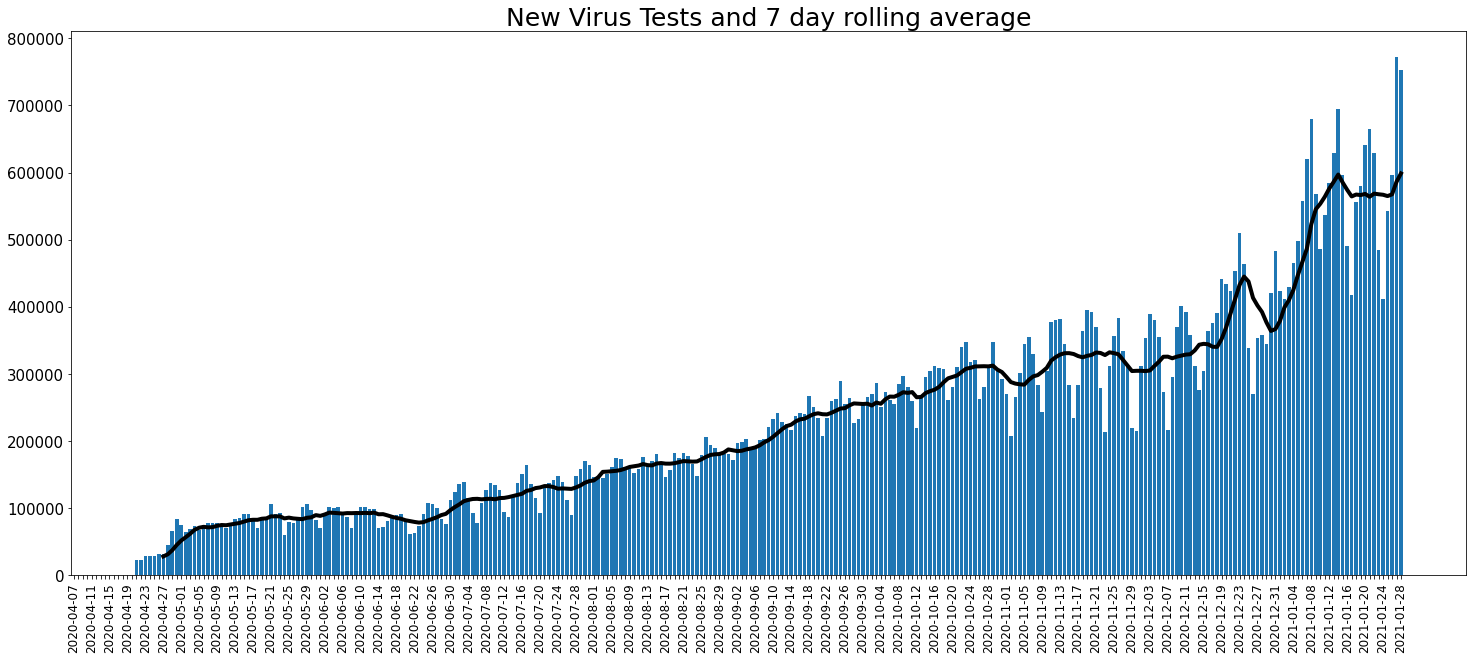

In [71]:
return1, return2, return3 = one_chart('newVirusTests', 'New Virus Tests',1,0,1)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

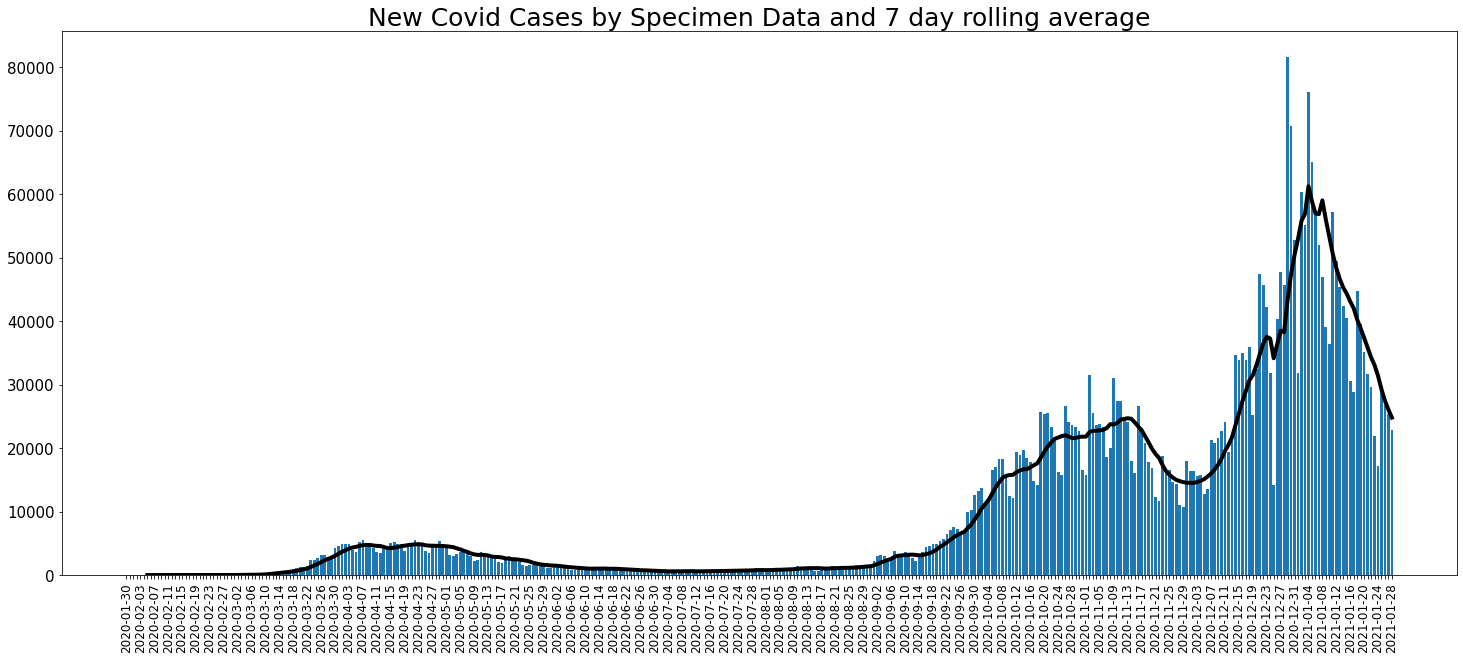

In [72]:
return1, return2, return3 = one_chart('newCasesBySpecimenDate', 'New Covid Cases by Specimen Data',1,0,1)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

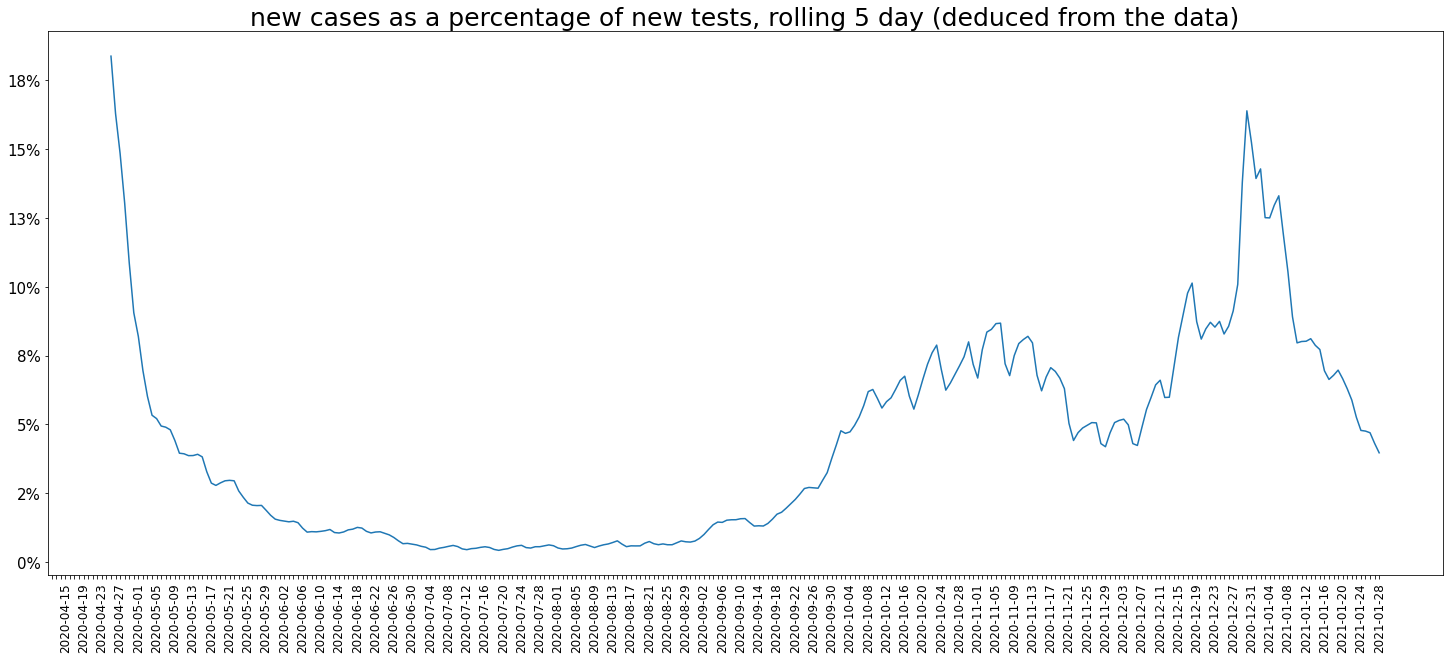

In [73]:
return1, return2, return3 = one_chart('%_positive_tests', 'new cases as a percentage of new tests, rolling 5 day (deduced from the data)',0,1,0)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

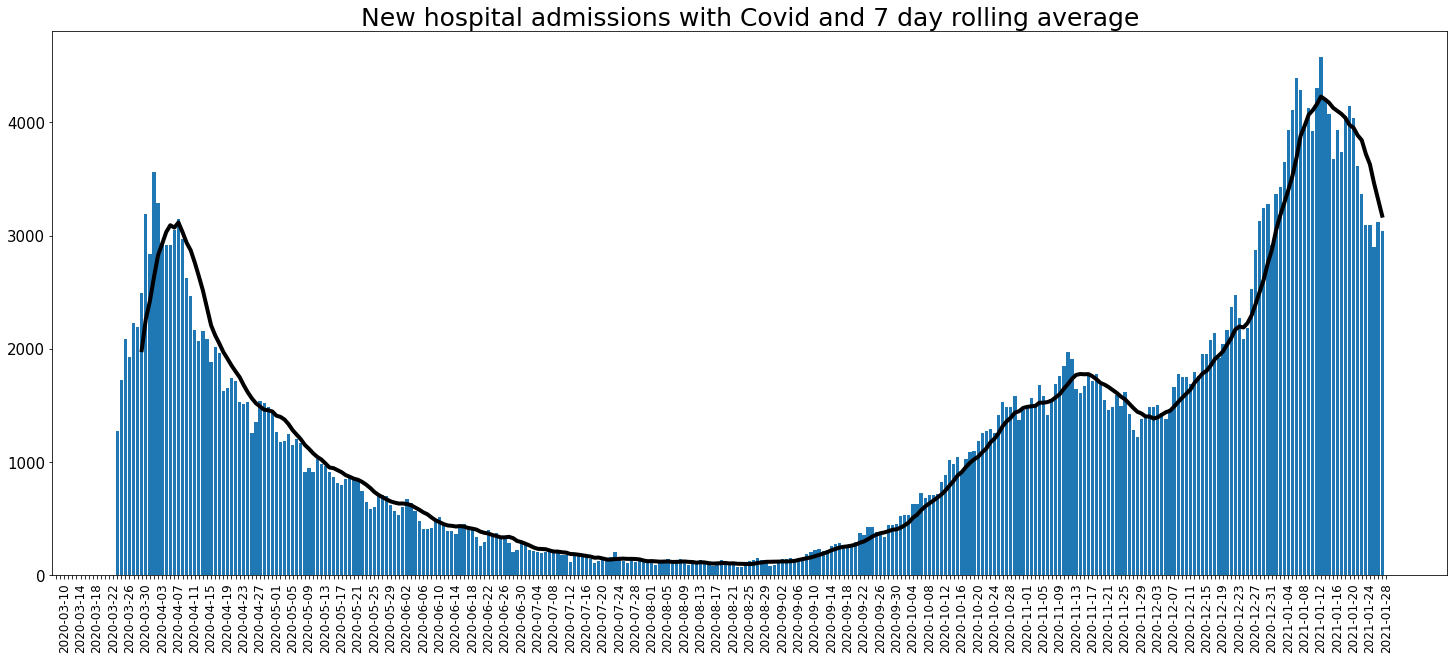

In [74]:
return1, return2, return3 = one_chart('newAdmissions', 'New hospital admissions with Covid',1,0,1)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

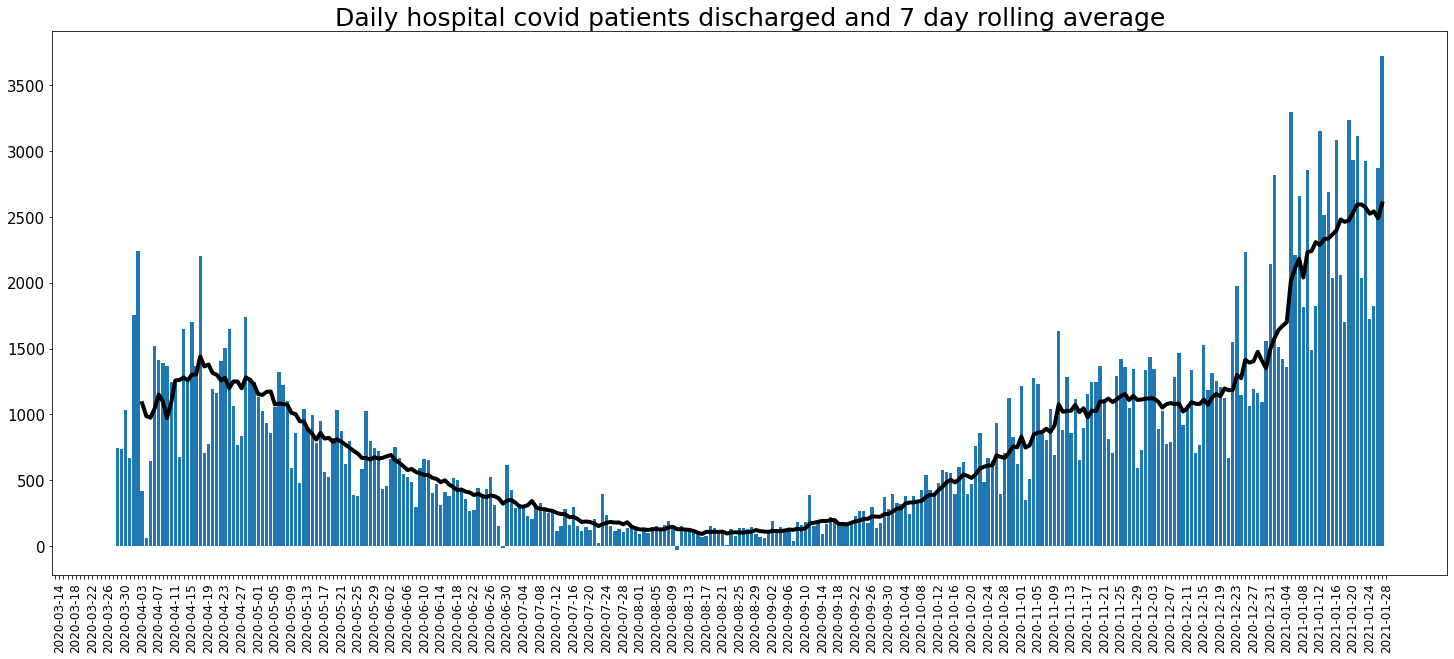

In [75]:
return1, return2, return3 = one_chart('leaving_hospital', 'Daily hospital covid patients discharged',1,0,1)

# slideTitle.append(return1)
# slideText.append(return2)
# imagePath.append(return3)

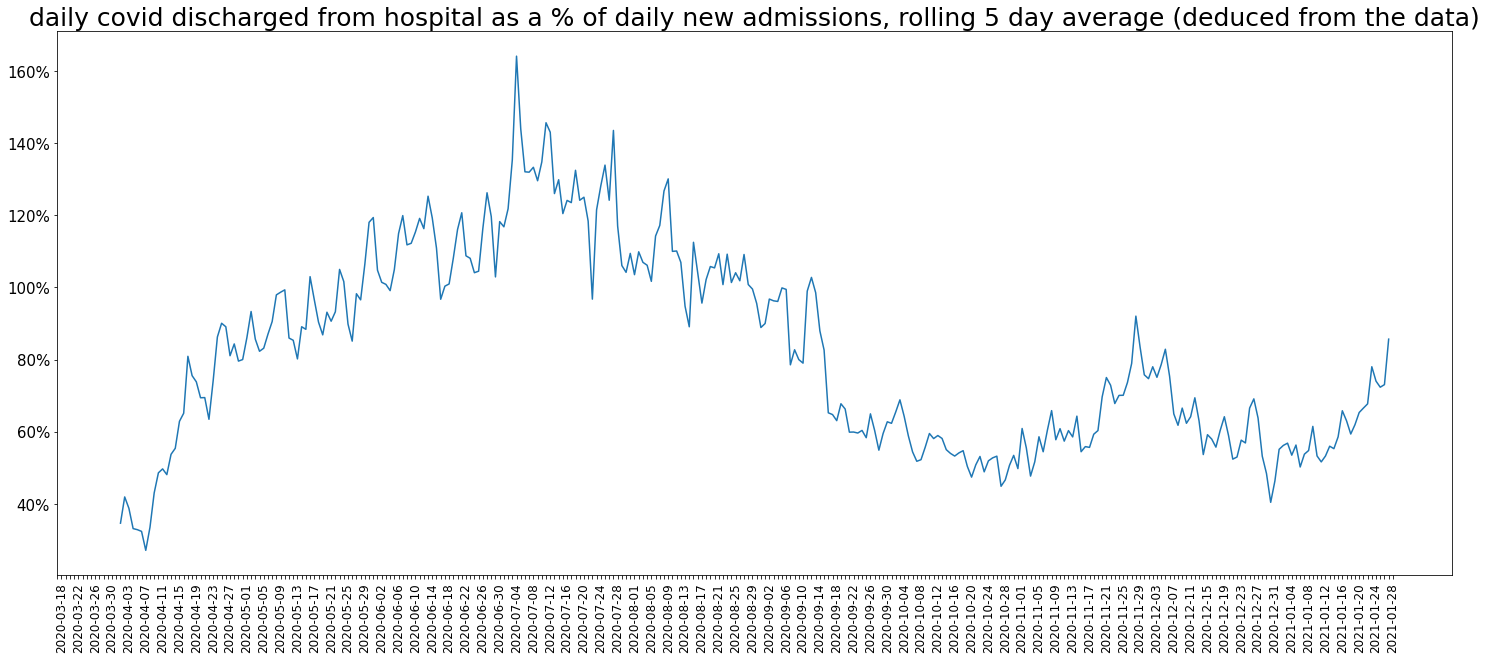

In [76]:

return1, return2, return3 = one_chart('leavers_%_admissions', 
                                      'daily covid discharged from hospital as a % of daily new admissions, rolling 5 day average (deduced from the data)',0,1,0)
# slideTitle.append(return1)
# slideText.append(return2)
# imagePath.append(return3)

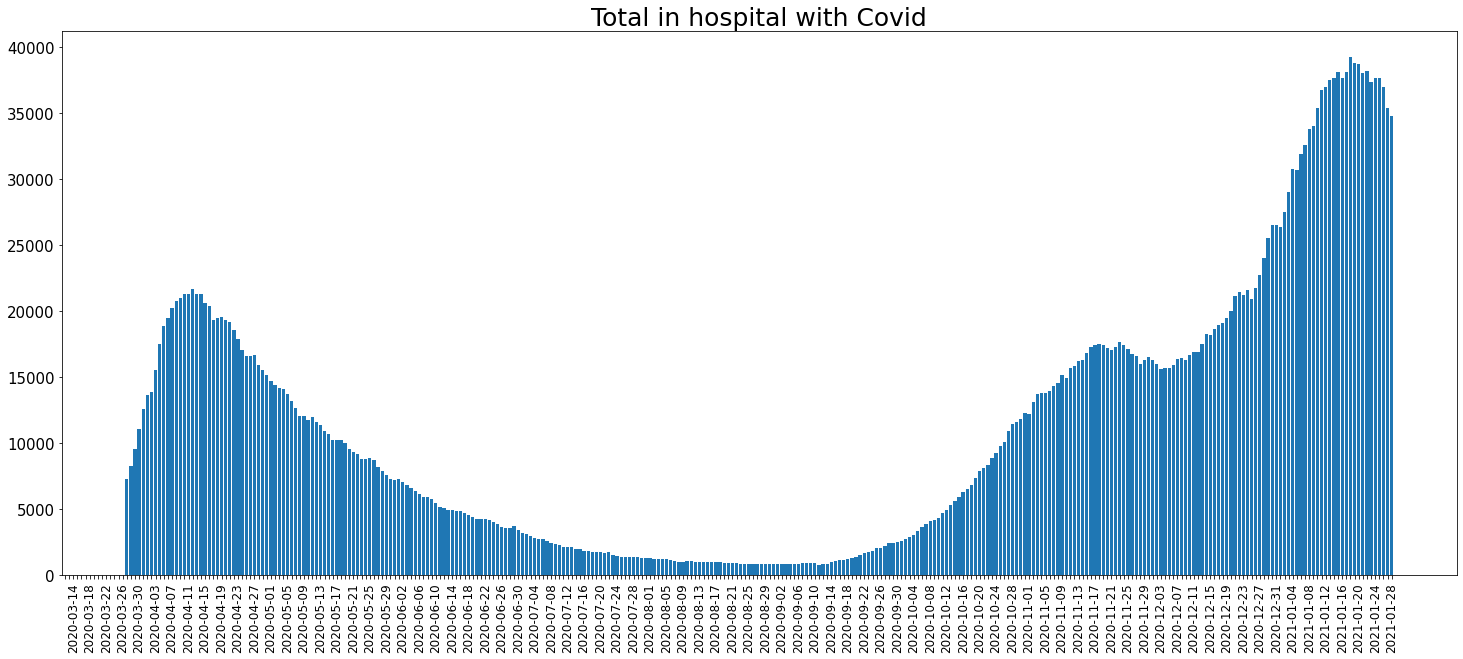

In [77]:
return1, return2, return3 = one_chart('hospitalCases', 'Total in hospital with Covid',1,0,0)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

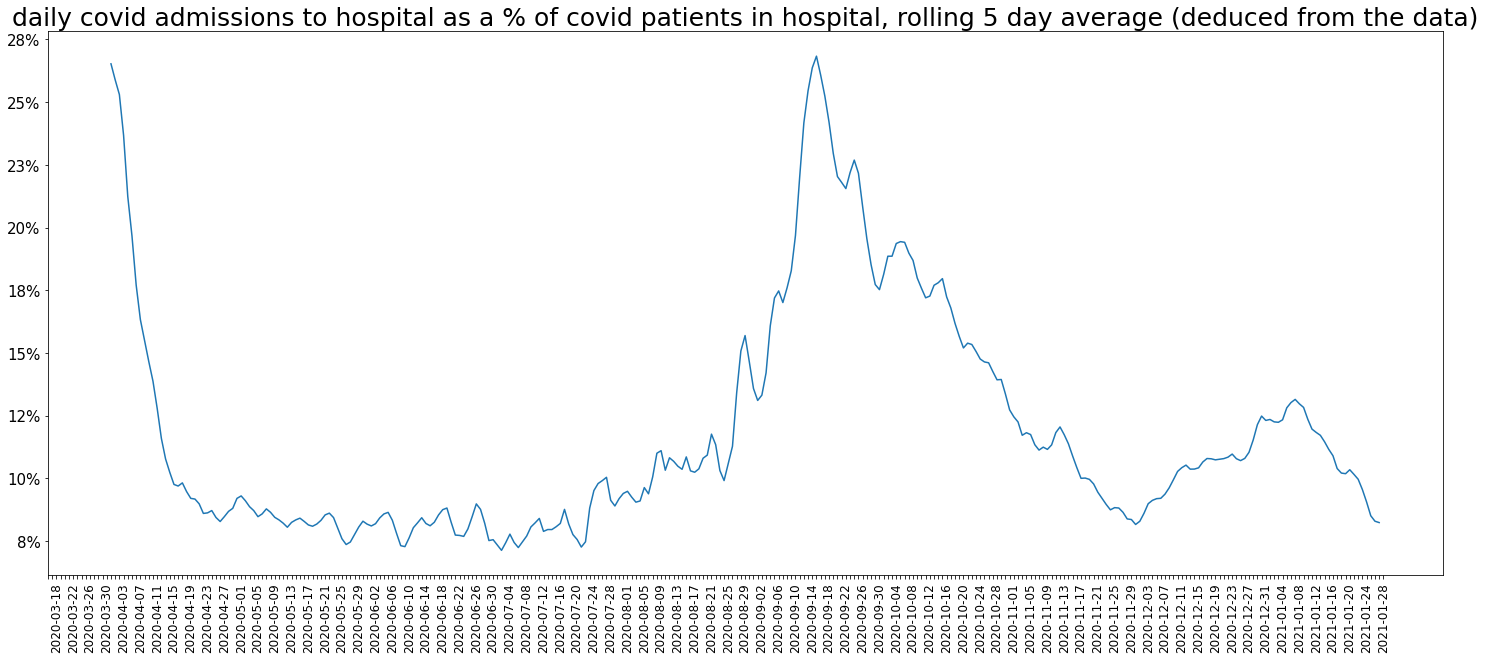

In [78]:
return1, return2, return3 = one_chart('newAdmissions%_inHospital', 
                                      'daily covid admissions to hospital as a % of covid patients in hospital, rolling 5 day average (deduced from the data)',0,1,0)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

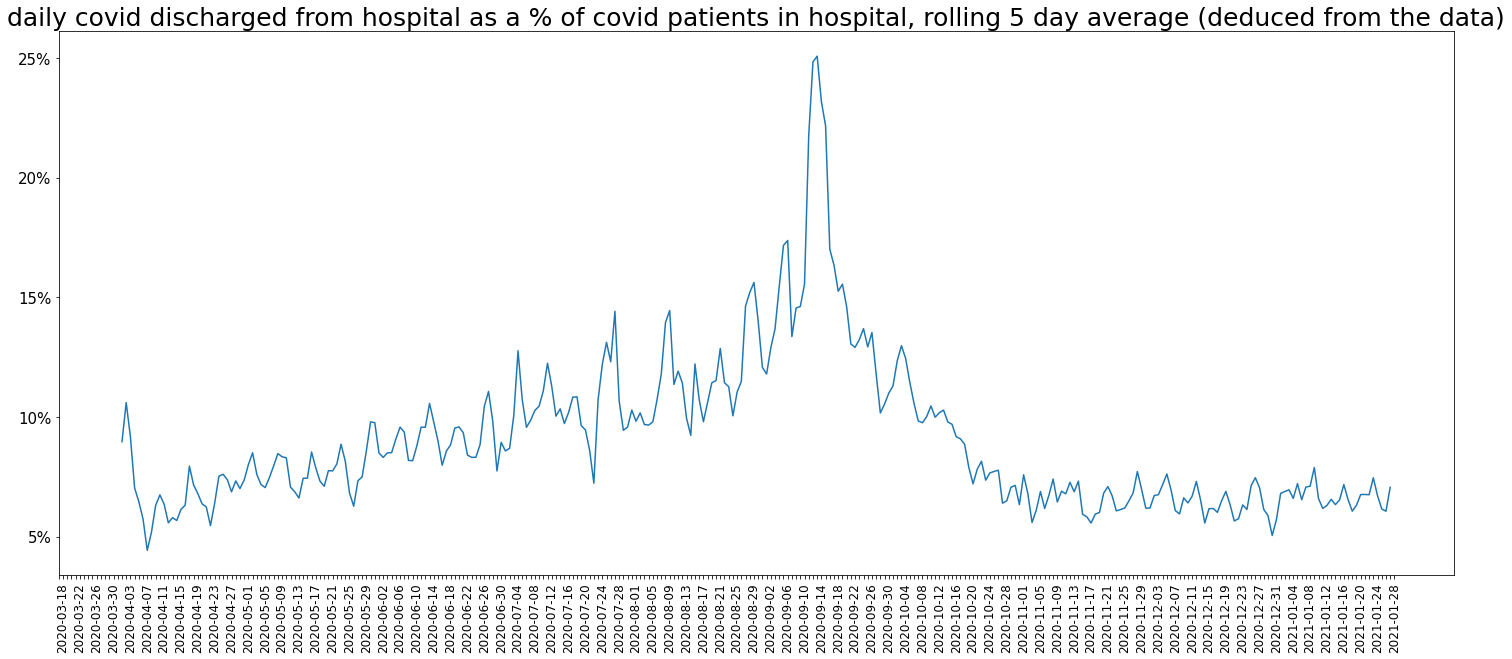

In [79]:
return1, return2, return3 = one_chart('leavers_%_inHospital', 
                                      'daily covid discharged from hospital as a % of covid patients in hospital, rolling 5 day average (deduced from the data)',0,1,0)

# slideTitle.append(return1)
# slideText.append(return2)
# imagePath.append(return3)

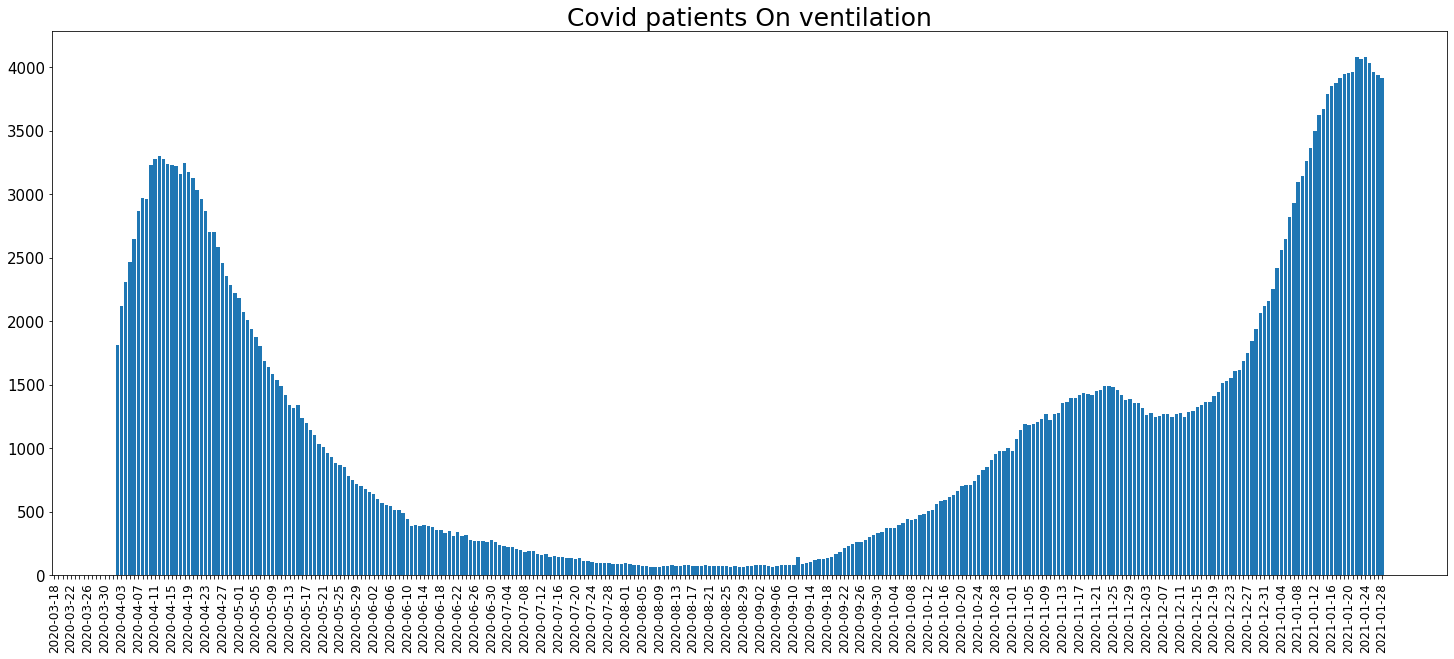

In [80]:
return1, return2, return3 = one_chart('covidOccupiedMVBeds', 'Covid patients On ventilation',1,0,0)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

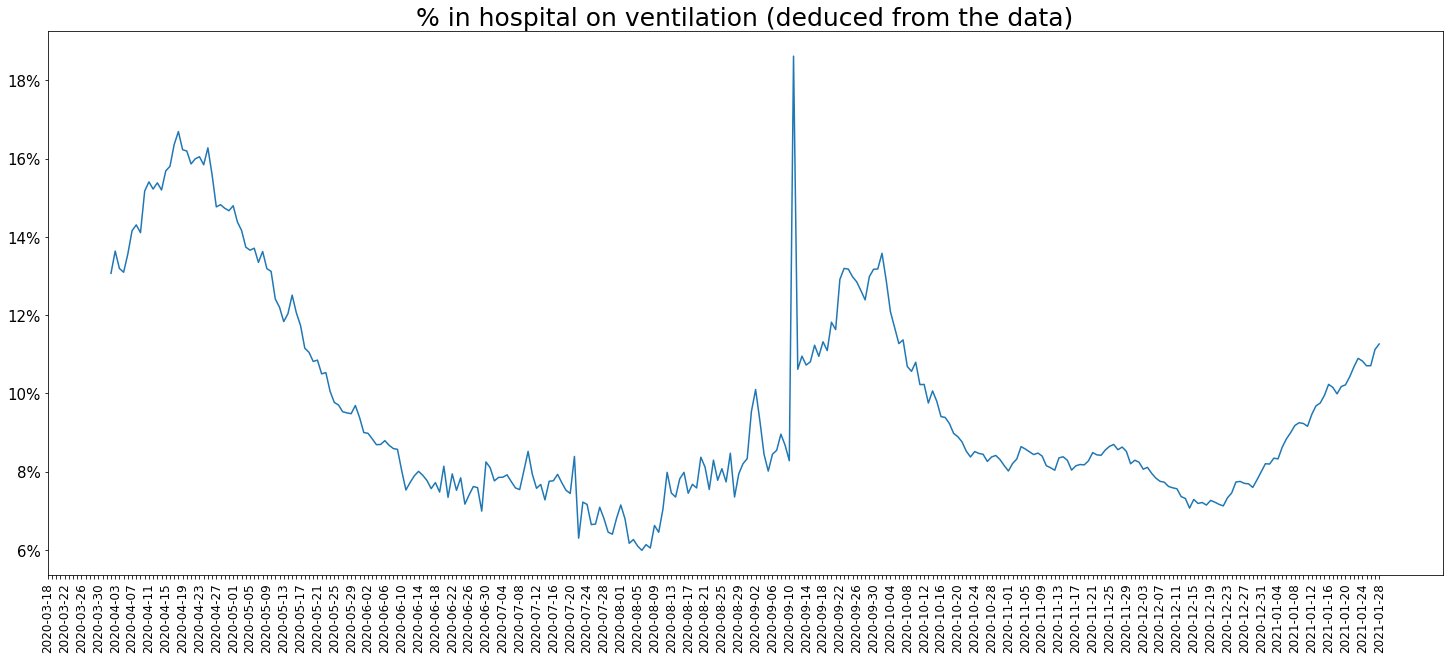

In [81]:
return1, return2, return3 = one_chart('%_on_ventilation', '% in hospital on ventilation (deduced from the data)',0,1,0)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

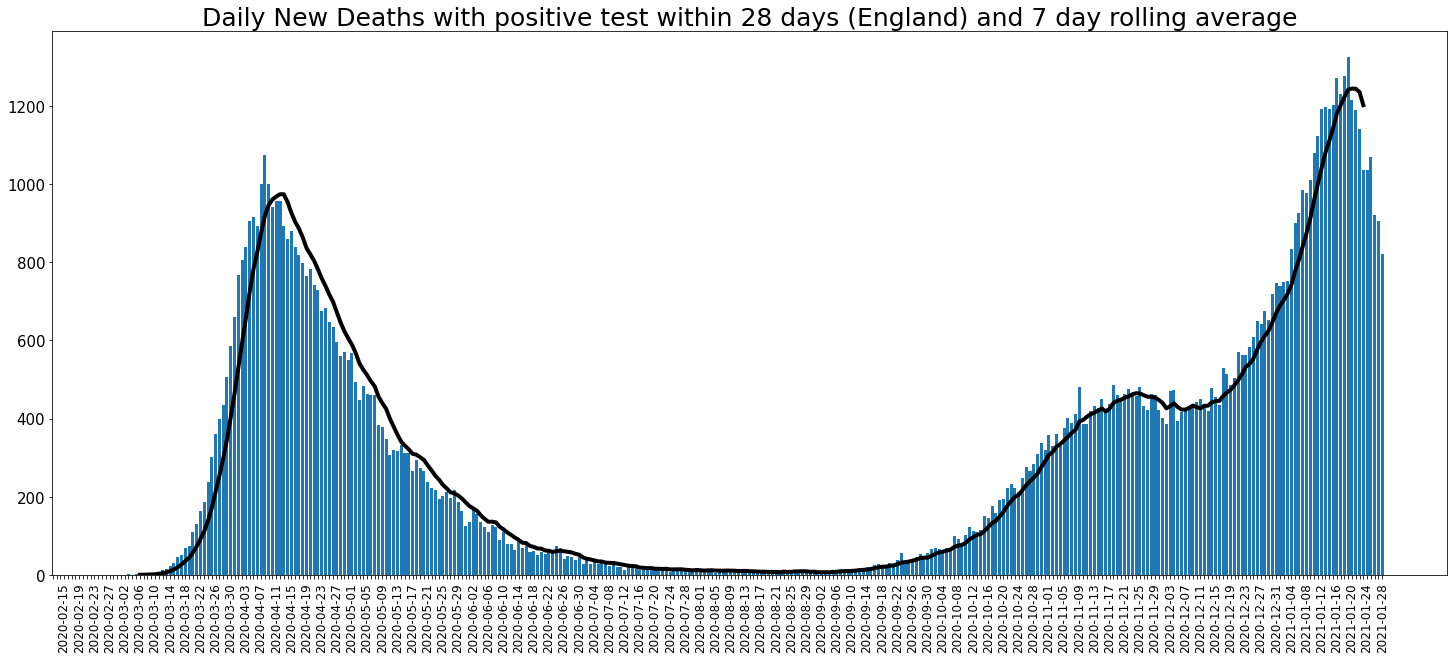

In [82]:
return1, return2, return3 = one_chart('newDeaths28DaysByDeathDate', 'Daily New Deaths with positive test within 28 days (England)',1,0,1)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

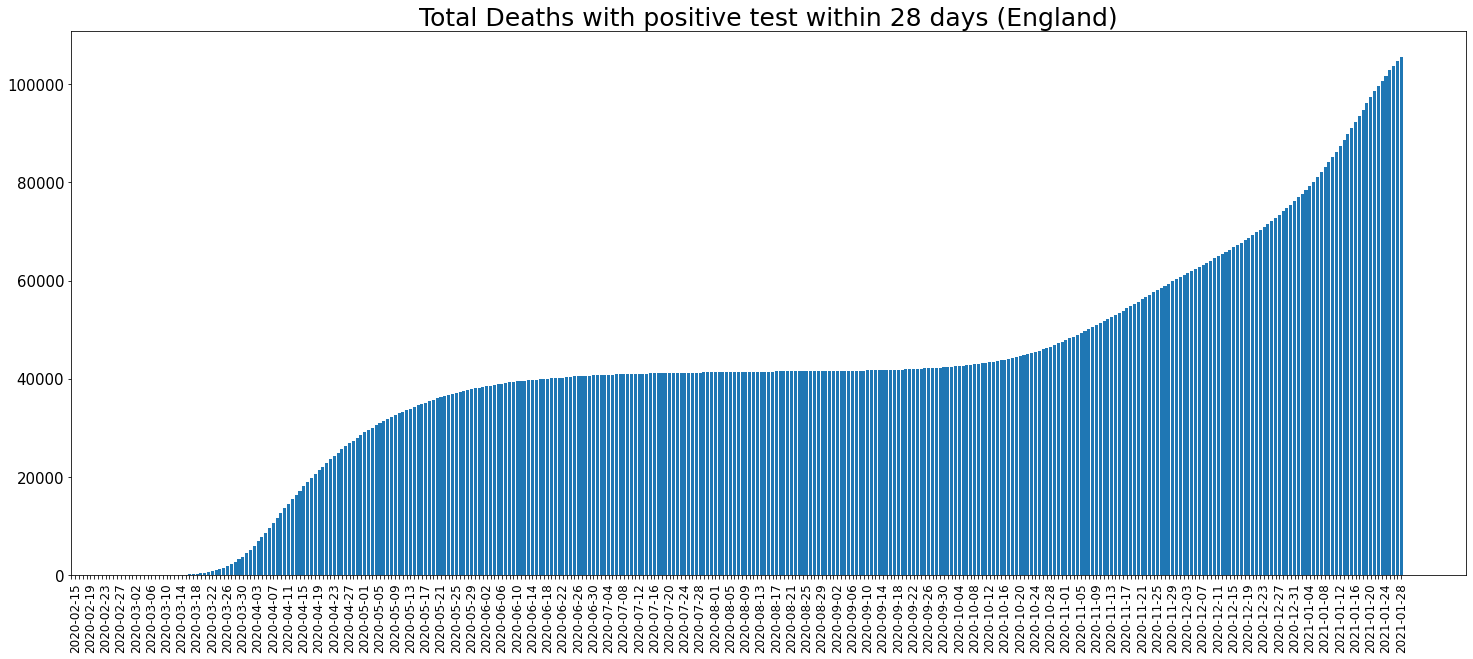

In [83]:
return1, return2, return3 = one_chart('cumDeaths28DaysByDeathDate', 'Total Deaths with positive test within 28 days (England)',1,0,0)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

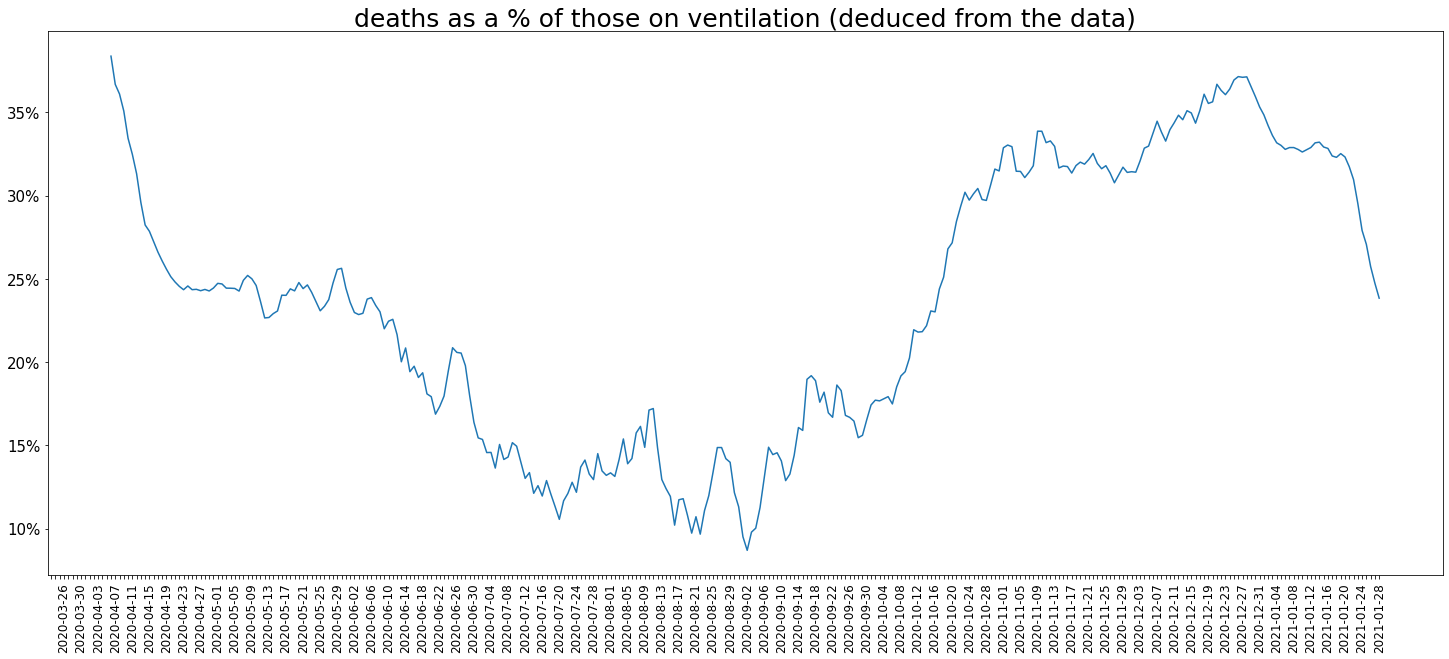

In [84]:
return1, return2, return3 = one_chart('deaths_%_vent', 'deaths as a % of those on ventilation (deduced from the data)',0,1,0)

# slideTitle.append(return1)
# slideText.append(return2)
# imagePath.append(return3)

In [85]:
df_summary.tail()

date  newCasesBySpecimenDate  cumCasesBySpecimenDate  \
360  2021-01-24                   17171                 3691773   
361  2021-01-25                   29805                 3721578   
362  2021-01-26                   26852                 3748430   
363  2021-01-27                   25441                 3773871   
364  2021-01-28                   22860                 3796731   

     newDeaths28DaysByDeathDate  cumDeaths28DaysByDeathDate  newAdmissions  \
360                      1036.0                    101780.0         3096.0   
361                      1069.0                    102849.0         2903.0   
362                       920.0                    103769.0         3120.0   
363                       905.0                    104674.0         3039.0   
364                       820.0                    105494.0            NaN   

     cumAdmissions  hospitalCases  covidOccupiedMVBeds  newVirusTests  \
360       380974.0        37646.0               4077.0       412204.0   
361       383877.0        37659.0               4032.0       542893.0   
362       386997.0        36990.0               3961.0       596845.0   
363       390036.0        35405.0               3937.0       771710.0   
364            NaN        34783.0               3918.0       753031.0   

     cumVirusTests  %_on_ventilation  %_positive_tests  leaving_hospital  \
360     65861305.0          0.108298          0.047823            1728.0   
361     66422967.0          0.107066          0.047583            1821.0   
362     67040373.0          0.107083          0.046978            2869.0   
363     67828936.0          0.111199          0.043127            3719.0   
364     68606924.0          0.112641          0.039695               NaN   

     leavers_%_admissions  newAdmissions%_inHospital  leavers_%_inHospital  \
360              0.740091                   0.090646              0.067086   
361              0.723245                   0.085130              0.061570   
362              0.730389                   0.082954              0.060589   
363              0.856496                   0.082410              0.070584   
364                   NaN                        NaN                   NaN   

     deaths_%_vent  newVirusTests_rolling  newCasesBySpecimenDate_rolling  \
360       0.279058          566882.000000                    31394.428571   
361       0.270694          564911.142857                    29251.428571   
362       0.257372          567432.714286                    27443.857143   
363       0.247347          586126.142857                    26057.285714   
364       0.238394          598654.857143                    24791.142857   

     newAdmissions_rolling  leaving_hospital_rolling  \
360            3629.714286               2523.571429   
361            3464.857143               2541.142857   
362            3318.428571               2489.142857   
363            3175.857143               2601.714286   
364                    NaN                       NaN   

     newDeaths28DaysByDeathDate_rolling  
360                                 NaN  
361                                 NaN  
362                                 NaN  
363                                 NaN  
364                                 NaN

In [86]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    #plt.savefig('Auto Trader - bar chart of Lookers cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('Data for the England by Age (most upto date age related death data i can find): Cases, Hospitalisations and Deaths')
    slideText.append('')
    imagePath.append('')

plt.show()

In [87]:
# England data
# using England data given no other nation data for hospital admissions by age

# create new dataframes for deaths and cases

df_eng_cd.tail()

date areaType   areaCode areaName  \
14932  2021-01-26   nation  E92000001  England   
14933  2021-01-26   nation  E92000001  England   
14934  2021-01-26   nation  E92000001  England   
14935  2021-01-26   nation  E92000001  England   
14936  2021-01-26   nation  E92000001  England   

                                          metric    age    cases  rollingRate  \
14932  newDeaths28DaysByDeathDateAgeDemographics  20_24      NaN          0.0   
14933  newDeaths28DaysByDeathDateAgeDemographics  15_19      NaN          0.0   
14934  newDeaths28DaysByDeathDateAgeDemographics  10_14      NaN          0.0   
14935      newCasesBySpecimenDateAgeDemographics  00_59  19559.0        329.1   
14936      newCasesBySpecimenDateAgeDemographics  00_04    692.0        153.5   

       rollingSum  
14932           1  
14933           0  
14934           0  
14935      140936  
14936        5066

In [88]:
df_eng_newcasesbyage = df_eng_cd[df_eng_cd['metric'] == 'newCasesBySpecimenDateAgeDemographics'].reset_index(drop=True)
df_eng_cumdeathsbyage = df_eng_cd[df_eng_cd['metric'] == 'newDeaths28DaysByDeathDateAgeDemographics'].reset_index(drop=True)

In [89]:
df_eng_newcasesbyage.tail()

date areaType   areaCode areaName  \
7981  2021-01-26   nation  E92000001  England   
7982  2021-01-26   nation  E92000001  England   
7983  2021-01-26   nation  E92000001  England   
7984  2021-01-26   nation  E92000001  England   
7985  2021-01-26   nation  E92000001  England   

                                     metric         age    cases  rollingRate  \
7981  newCasesBySpecimenDateAgeDemographics  unassigned     23.0          NaN   
7982  newCasesBySpecimenDateAgeDemographics       50_54   1900.0        367.5   
7983  newCasesBySpecimenDateAgeDemographics         60+   4753.0        246.9   
7984  newCasesBySpecimenDateAgeDemographics       00_59  19559.0        329.1   
7985  newCasesBySpecimenDateAgeDemographics       00_04    692.0        153.5   

      rollingSum  
7981         201  
7982       14358  
7983       33246  
7984      140936  
7985        5066

In [90]:
df_eng_cumdeathsbyage.tail()

date areaType   areaCode areaName  \
6946  2021-01-26   nation  E92000001  England   
6947  2021-01-26   nation  E92000001  England   
6948  2021-01-26   nation  E92000001  England   
6949  2021-01-26   nation  E92000001  England   
6950  2021-01-26   nation  E92000001  England   

                                         metric    age  cases  rollingRate  \
6946  newDeaths28DaysByDeathDateAgeDemographics  30_34    NaN          0.4   
6947  newDeaths28DaysByDeathDateAgeDemographics  25_29    NaN          0.2   
6948  newDeaths28DaysByDeathDateAgeDemographics  20_24    NaN          0.0   
6949  newDeaths28DaysByDeathDateAgeDemographics  15_19    NaN          0.0   
6950  newDeaths28DaysByDeathDateAgeDemographics  10_14    NaN          0.0   

      rollingSum  
6946          16  
6947           7  
6948           1  
6949           0  
6950           0

In [91]:
# clean the dateframes

# delete duplicate rows
df_eng_newcasesbyage.drop_duplicates(inplace=True)
df_eng_newcasesbyage.reset_index(drop=True)

df_eng_cumdeathsbyage.drop_duplicates(inplace=True)
df_eng_cumdeathsbyage.reset_index(drop=True)

df_eng_cumadmissionsbyage.drop_duplicates(inplace=True)
df_eng_cumadmissionsbyage.reset_index(drop=True)

date areaType   areaCode areaName              metric       age  \
0     2020-03-19   nation  E92000001  England  cumAdmissionsByAge   6_to_17   
1     2020-03-19   nation  E92000001  England  cumAdmissionsByAge  18_to_64   
2     2020-03-19   nation  E92000001  England  cumAdmissionsByAge  65_to_84   
3     2020-03-19   nation  E92000001  England  cumAdmissionsByAge       85+   
4     2020-03-19   nation  E92000001  England  cumAdmissionsByAge    0_to_5   
...          ...      ...        ...      ...                 ...       ...   
1575  2021-01-28   nation  E92000001  England  cumAdmissionsByAge   6_to_17   
1576  2021-01-28   nation  E92000001  England  cumAdmissionsByAge  65_to_84   
1577  2021-01-28   nation  E92000001  England  cumAdmissionsByAge       85+   
1578  2021-01-28   nation  E92000001  England  cumAdmissionsByAge    0_to_5   
1579  2021-01-28   nation  E92000001  England  cumAdmissionsByAge  18_to_64   

        rate   value  
0        0.1       5  
1        0.5     171  
2        2.4     209  
3        7.1      97  
4        0.1       4  
...      ...     ...  
1575    27.5    2174  
1576  1597.8  140834  
1577  5266.2   71883  
1578    55.0    2226  
1579   341.9  115709  

[1580 rows x 8 columns]

In [92]:
# delete unwanted columns

df_eng_newcasesbyage = df_eng_newcasesbyage[['date', 'age', 'cases']]
df_eng_cumdeathsbyage = df_eng_cumdeathsbyage[['date', 'age', 'rollingSum']]
df_eng_cumadmissionsbyage = df_eng_cumadmissionsbyage[['date', 'age', 'value']]

In [93]:
df_eng_newcasesbyage.tail()

date         age    cases
7981  2021-01-26  unassigned     23.0
7982  2021-01-26       50_54   1900.0
7983  2021-01-26         60+   4753.0
7984  2021-01-26       00_59  19559.0
7985  2021-01-26       00_04    692.0

In [94]:
df_eng_cumdeathsbyage.tail()

date    age  rollingSum
6946  2021-01-26  30_34          16
6947  2021-01-26  25_29           7
6948  2021-01-26  20_24           1
6949  2021-01-26  15_19           0
6950  2021-01-26  10_14           0

In [95]:
df_eng_cumadmissionsbyage.tail()

date       age   value
1575  2021-01-28   6_to_17    2174
1576  2021-01-28  65_to_84  140834
1577  2021-01-28       85+   71883
1578  2021-01-28    0_to_5    2226
1579  2021-01-28  18_to_64  115709

In [96]:
# create new dataframes with the age bands as the headers
# new cases

dates = df_eng_newcasesbyage['date'].tolist()
dates = list(set(dates))

df_eng_newcasesbyage_Summary = pd.DataFrame(dates, columns = ['date'])
df_eng_newcasesbyage_Summary.sort_values('date', inplace = True)
df_eng_newcasesbyage_Summary.reset_index(drop=True, inplace=True)

headers = df_eng_newcasesbyage['age'].unique().tolist()

for i in range(len(headers)):
    listOfValues = df_eng_newcasesbyage[df_eng_newcasesbyage['age'] == headers[i]]['cases'].tolist()
    df_eng_newcasesbyage_Summary[headers[i]] = listOfValues

#df_eng_newcasesbyage_Summary['date'] = df_eng_newcasesbyage_Summary['datetime'].dt.strftime('%d-%m-%Y')

df_eng_newcasesbyage_Summary.tail()

date    00_59  00_04  05_09  10_14   15_19   20_24   25_29   30_34  \
358  2021-01-22  21810.0  787.0  708.0  779.0  1232.0  2253.0  2478.0  2674.0   
359  2021-01-23  16281.0  622.0  520.0  578.0   887.0  1581.0  1827.0  1994.0   
360  2021-01-24  12645.0  531.0  397.0  399.0   684.0  1257.0  1398.0  1597.0   
361  2021-01-25  21720.0  801.0  677.0  767.0  1151.0  2168.0  2521.0  2637.0   
362  2021-01-26  19559.0  692.0  612.0  720.0  1042.0  2053.0  2285.0  2376.0   

      35_39   40_44   45_49     60+   55_59  unassigned    90+  85_89  80_84  \
358  2435.0  2191.0  2056.0  5122.0  1961.0        29.0  478.0  512.0  545.0   
359  1889.0  1683.0  1537.0  3605.0  1521.0        12.0  313.0  354.0  363.0   
360  1467.0  1268.0  1252.0  2826.0  1130.0        12.0  238.0  286.0  288.0   
361  2403.0  2201.0  2095.0  5280.0  2020.0        31.0  585.0  565.0  551.0   
362  2192.0  1963.0  1892.0  4753.0  1809.0        23.0  538.0  497.0  535.0   

      50_54  70_74  65_69   60_64  75_79  
358  2227.0  666.0  908.0  1454.0  559.0  
359  1630.0  494.0  619.0  1058.0  404.0  
360  1253.0  393.0  494.0   813.0  314.0  
361  2248.0  689.0  899.0  1442.0  549.0  
362  1900.0  614.0  735.0  1299.0  535.0

In [97]:
# create new dataframes with the age bands as the headers
# cum deaths

dates = df_eng_cumdeathsbyage['date'].tolist()
dates = list(set(dates))

df_eng_cumdeathsbyage_Summary = pd.DataFrame(dates, columns = ['date'])
df_eng_cumdeathsbyage_Summary.sort_values('date', inplace = True)
df_eng_cumdeathsbyage_Summary.reset_index(drop=True, inplace=True)

headers = df_eng_cumdeathsbyage['age'].unique().tolist()

for i in range(len(headers)):
    listOfValues = df_eng_cumdeathsbyage[df_eng_cumdeathsbyage['age'] == headers[i]]['rollingSum'].tolist()
    df_eng_cumdeathsbyage_Summary[headers[i]] = listOfValues

#df_eng_cumdeathsbyage_Summary['date'] = df_eng_cumdeathsbyage_Summary['datetime'].dt.strftime('%d-%m-%Y')

df_eng_cumdeathsbyage_Summary.tail()

date   90+  00_04  00_59   60+  85_89  80_84  75_79  70_74  65_69  \
326  2021-01-22  1790     41    568  7327   1535   1384   1055    751    544   
327  2021-01-23  1745     37    552  7139   1484   1347   1039    728    525   
328  2021-01-24  1694     40    545  6944   1440   1333    989    701    525   
329  2021-01-25  1664     31    511  6798   1417   1281    956    714    509   
330  2021-01-26  1580     29    494  6447   1335   1196    902    689    491   

     60_64  05_09  50_54  45_49  40_44  35_39  30_34  25_29  20_24  15_19  \
326    268      1    134     76     40     28     12     10      1      1   
327    271      1    144     71     36     28     14      9      1      0   
328    262      1    145     56     39     26     17      8      2      0   
329    257      1    134     56     30     28     17      6      2      0   
330    254      0    129     58     29     23     16      7      1      0   

     10_14  55_59  
326      0    224  
327      0    211  
328      0    211  
329      0    206  
330      0    202

In [98]:
# convert the rolling deaths into daily deaths

def rolling_to_new(column_name):

    newdeaths = [0]*6   
    for i in range(6,len(df_eng_cumdeathsbyage_Summary)):
        newdaydeaths = df_eng_cumdeathsbyage_Summary[column_name].iloc[i] - df_eng_cumdeathsbyage_Summary[column_name].iloc[i-1] + newdeaths[i-7]
        newdeaths.append(newdaydeaths)

    df_eng_cumdeathsbyage_Summary[column_name + '_new'] = newdeaths

In [99]:
col_names = df_eng_cumdeathsbyage_Summary.columns[1:].tolist()

for i in range(len(col_names)):
    rolling_to_new(col_names[i])

In [100]:
df_eng_cumdeathsbyage_Summary.tail()

date   90+  00_04  00_59   60+  85_89  80_84  75_79  70_74  65_69  \
326  2021-01-22  1790     41    568  7327   1535   1384   1055    751    544   
327  2021-01-23  1745     37    552  7139   1484   1347   1039    728    525   
328  2021-01-24  1694     40    545  6944   1440   1333    989    701    525   
329  2021-01-25  1664     31    511  6798   1417   1281    956    714    509   
330  2021-01-26  1580     29    494  6447   1335   1196    902    689    491   

     60_64  05_09  50_54  45_49  40_44  35_39  30_34  25_29  20_24  15_19  \
326    268      1    134     76     40     28     12     10      1      1   
327    271      1    144     71     36     28     14      9      1      0   
328    262      1    145     56     39     26     17      8      2      0   
329    257      1    134     56     30     28     17      6      2      0   
330    254      0    129     58     29     23     16      7      1      0   

     10_14  55_59  90+_new  00_04_new  00_59_new  60+_new  85_89_new  \
326      0    224      245          4         80      956        202   
327      0    211      209          2         59      878        158   
328      0    211      208          7         74      869        196   
329      0    206      231          2         74      907        201   
330      0    202      189          4         59      786        161   

     80_84_new  75_79_new  70_74_new  65_69_new  60_64_new  05_09_new  \
326        165        131        101         77         35          0   
327        162        138        109         62         40          0   
328        172        113         80         74         26          0   
329        151        123         95         71         35          0   
330        144        113         93         57         29          0   

     50_54_new  45_49_new  40_44_new  35_39_new  30_34_new  25_29_new  \
326         26         10          4          3          3          2   
327         21          7          2          4          2          0   
328         18          3          7          3          4          0   
329         19         11          2          6          3          1   
330         14         10          4          0          1          1   

     20_24_new  15_19_new  10_14_new  55_59_new  
326          0          0          0         28  
327          0          0          0         21  
328          1          0          0         31  
329          0          0          0         30  
330          0          0          0         25

In [101]:
# create new dataframes with the age bands as the headers
# cum admissions

dates = df_eng_cumadmissionsbyage['date'].tolist()
dates = list(set(dates))

df_eng_cumadmissionsbyage_Summary = pd.DataFrame(dates, columns = ['date'])
df_eng_cumadmissionsbyage_Summary.sort_values('date', inplace = True)
df_eng_cumadmissionsbyage_Summary.reset_index(drop=True, inplace=True)

headers = df_eng_cumadmissionsbyage['age'].unique().tolist()

for i in range(len(headers)):
    listOfValues = df_eng_cumadmissionsbyage[df_eng_cumadmissionsbyage['age'] == headers[i]]['value'].tolist()
    df_eng_cumadmissionsbyage_Summary[headers[i]] = listOfValues

#df_eng_cumadmissionsbyage_Summary['date'] = df_eng_cumadmissionsbyage_Summary['datetime'].dt.strftime('%d-%m-%Y')

df_eng_cumadmissionsbyage_Summary.tail()

date  6_to_17  18_to_64  65_to_84    85+  0_to_5
311  2021-01-24     2093    111456    136488  69720    2160
312  2021-01-25     2116    112512    137556  70203    2179
313  2021-01-26     2139    113580    138672  70775    2199
314  2021-01-27     2157    114655    139743  71342    2210
315  2021-01-28     2174    115709    140834  71883    2226

In [102]:
# convert the cum admissions into daily admissions

def cum_to_new(column_name):

    newadmissions = []
    newadmissions.append(df_eng_cumadmissionsbyage_Summary[column_name][0])
    for i in range(1,len(df_eng_cumadmissionsbyage_Summary)):
        newdayadmissions = df_eng_cumadmissionsbyage_Summary[column_name].iloc[i] - df_eng_cumadmissionsbyage_Summary[column_name].iloc[i-1]
        newadmissions.append(newdayadmissions)

    df_eng_cumadmissionsbyage_Summary[column_name + '_new'] = newadmissions

In [103]:
col_names = df_eng_cumadmissionsbyage_Summary.columns[1:].tolist()

for i in range(len(col_names)):
    cum_to_new(col_names[i])

In [104]:
df_eng_cumadmissionsbyage_Summary.head()

date  6_to_17  18_to_64  65_to_84  85+  0_to_5  6_to_17_new  \
0  2020-03-19        5       171       209   97       4            5   
1  2020-03-20       13       384       445  213       4            8   
2  2020-03-21       16       618       695  340       5            3   
3  2020-03-22       17       856      1024  469      10            1   
4  2020-03-23       23      1200      1471  650      16            6   

   18_to_64_new  65_to_84_new  85+_new  0_to_5_new  
0           171           209       97           4  
1           213           236      116           0  
2           234           250      127           1  
3           238           329      129           5  
4           344           447      181           6

In [105]:
# create new columns in the other two dataframes to match the admissions ages

In [106]:
def create_new_columns(df, newcol,name):

    df[name] = 0

    for i in range(len(newcol)):
        df[name] = df[name] + df[newcol[i]]


In [107]:
nursery = ['00_04']
school = ['15_19','10_14','05_09']
working = ['60_64', '55_59', '50_54','45_49','40_44','35_39','30_34','25_29','20_24']
old = ['80_84','75_79','70_74','65_69']
older = ['90+','85_89']

In [108]:
create_new_columns(df_eng_newcasesbyage_Summary,nursery,'00_04_')
create_new_columns(df_eng_newcasesbyage_Summary,school,'05_19_')
create_new_columns(df_eng_newcasesbyage_Summary,working,'20_64_')
create_new_columns(df_eng_newcasesbyage_Summary,old,'65_84_')
create_new_columns(df_eng_newcasesbyage_Summary,older,'85+_')

In [109]:
nursery = ['00_04_new']
school = ['15_19_new','10_14_new','05_09_new']
working = ['60_64_new', '55_59_new', '50_54_new','45_49_new','40_44_new','35_39_new','30_34_new','25_29_new','20_24_new']
old = ['80_84_new','75_79_new','70_74_new','65_69_new']
older = ['90+_new','85_89_new']

In [110]:
create_new_columns(df_eng_cumdeathsbyage_Summary,nursery,'00_04_')
create_new_columns(df_eng_cumdeathsbyage_Summary,school,'05_19_')
create_new_columns(df_eng_cumdeathsbyage_Summary,working,'20_64_')
create_new_columns(df_eng_cumdeathsbyage_Summary,old,'65_84_')
create_new_columns(df_eng_cumdeathsbyage_Summary,older,'85+_')

In [111]:
# add rolling mean 7 day columns

columns1 = ['00_04_','05_19_','20_64_','65_84_','85+_']
columns2 = ['0_to_5_new','6_to_17_new','18_to_64_new',
            '65_to_84_new','85+_new']

for i in range(len(columns1)):
    df_eng_newcasesbyage_Summary[columns1[i] + 'rolling7'] = df_eng_newcasesbyage_Summary[columns1[i]].rolling(7).mean()
    df_eng_cumdeathsbyage_Summary[columns1[i] + 'rolling7'] = df_eng_cumdeathsbyage_Summary[columns1[i]].rolling(7).mean()

for i in range(len(columns2)):
    df_eng_cumadmissionsbyage_Summary[columns2[i] + 'rolling7'] = df_eng_cumadmissionsbyage_Summary[columns2[i]].rolling(7).mean()


In [112]:
# add cumulative columns

columns1 = ['00_04_','05_19_','20_64_','65_84_','85+_']
columns2 = ['0_to_5_new','6_to_17_new','18_to_64_new',
            '65_to_84_new','85+_new']

for i in range(len(columns1)):
    df_eng_newcasesbyage_Summary[columns1[i] + 'cumsum'] = df_eng_newcasesbyage_Summary[columns1[i]].cumsum()
    df_eng_cumdeathsbyage_Summary[columns1[i] + 'cumsum'] = df_eng_cumdeathsbyage_Summary[columns1[i]].cumsum()

for i in range(len(columns2)):
    df_eng_cumadmissionsbyage_Summary[columns2[i] + 'cumsum'] = df_eng_cumadmissionsbyage_Summary[columns2[i]].cumsum()


In [113]:
df_eng_newcasesbyage_Summary.head()

date  00_59  00_04  05_09  10_14  15_19  20_24  25_29  30_34  35_39  \
0  2020-01-30    2.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
1  2020-01-31    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2  2020-02-01    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3  2020-02-02    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4  2020-02-03    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   40_44  45_49  60+  55_59  unassigned  90+  85_89  80_84  50_54  70_74  \
0    0.0    0.0  0.0    0.0         0.0  0.0    0.0    0.0    1.0    0.0   
1    0.0    0.0  1.0    0.0         0.0  0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0  1.0    0.0         0.0  0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0  0.0    0.0         0.0  0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0  0.0    0.0         0.0  0.0    0.0    0.0    0.0    0.0   

   65_69  60_64  75_79  00_04_  05_19_  20_64_  65_84_  85+_  00_04_rolling7  \
0    0.0    0.0    0.0     0.0     0.0     2.0     0.0   0.0             NaN   
1    0.0    1.0    0.0     0.0     0.0     1.0     0.0   0.0             NaN   
2    1.0    0.0    0.0     0.0     0.0     0.0     1.0   0.0             NaN   
3    0.0    0.0    0.0     0.0     0.0     0.0     0.0   0.0             NaN   
4    0.0    0.0    0.0     0.0     0.0     0.0     0.0   0.0             NaN   

   05_19_rolling7  20_64_rolling7  65_84_rolling7  85+_rolling7  00_04_cumsum  \
0             NaN             NaN             NaN           NaN           0.0   
1             NaN             NaN             NaN           NaN           0.0   
2             NaN             NaN             NaN           NaN           0.0   
3             NaN             NaN             NaN           NaN           0.0   
4             NaN             NaN             NaN           NaN           0.0   

   05_19_cumsum  20_64_cumsum  65_84_cumsum  85+_cumsum  
0           0.0           2.0           0.0         0.0  
1           0.0           3.0           0.0         0.0  
2           0.0           3.0           1.0         0.0  
3           0.0           3.0           1.0         0.0  
4           0.0           3.0           1.0         0.0

In [114]:
df_eng_cumadmissionsbyage_Summary.head()

date  6_to_17  18_to_64  65_to_84  85+  0_to_5  6_to_17_new  \
0  2020-03-19        5       171       209   97       4            5   
1  2020-03-20       13       384       445  213       4            8   
2  2020-03-21       16       618       695  340       5            3   
3  2020-03-22       17       856      1024  469      10            1   
4  2020-03-23       23      1200      1471  650      16            6   

   18_to_64_new  65_to_84_new  85+_new  0_to_5_new  0_to_5_newrolling7  \
0           171           209       97           4                 NaN   
1           213           236      116           0                 NaN   
2           234           250      127           1                 NaN   
3           238           329      129           5                 NaN   
4           344           447      181           6                 NaN   

   6_to_17_newrolling7  18_to_64_newrolling7  65_to_84_newrolling7  \
0                  NaN                   NaN                   NaN   
1                  NaN                   NaN                   NaN   
2                  NaN                   NaN                   NaN   
3                  NaN                   NaN                   NaN   
4                  NaN                   NaN                   NaN   

   85+_newrolling7  0_to_5_newcumsum  6_to_17_newcumsum  18_to_64_newcumsum  \
0              NaN                 4                  5                 171   
1              NaN                 4                 13                 384   
2              NaN                 5                 16                 618   
3              NaN                10                 17                 856   
4              NaN                16                 23                1200   

   65_to_84_newcumsum  85+_newcumsum  
0                 209             97  
1                 445            213  
2                 695            340  
3                1024            469  
4                1471            650

In [115]:
df_eng_cumdeathsbyage_Summary.head()

date  90+  00_04  00_59  60+  85_89  80_84  75_79  70_74  65_69  \
0  2020-03-02    0      0      0    0      0      0      0      0      0   
1  2020-03-03    0      0      0    0      0      0      0      0      0   
2  2020-03-04    0      0      0    0      0      0      0      0      0   
3  2020-03-05    0      0      0    0      0      0      0      0      0   
4  2020-03-06    0      0      0    0      0      0      0      0      0   

   60_64  05_09  50_54  45_49  40_44  35_39  30_34  25_29  20_24  15_19  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

   10_14  55_59  90+_new  00_04_new  00_59_new  60+_new  85_89_new  80_84_new  \
0      0      0        0          0          0        0          0          0   
1      0      0        0          0          0        0          0          0   
2      0      0        0          0          0        0          0          0   
3      0      0        0          0          0        0          0          0   
4      0      0        0          0          0        0          0          0   

   75_79_new  70_74_new  65_69_new  60_64_new  05_09_new  50_54_new  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   45_49_new  40_44_new  35_39_new  30_34_new  25_29_new  20_24_new  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   15_19_new  10_14_new  55_59_new  00_04_  05_19_  20_64_  65_84_  85+_  \
0          0          0          0       0       0       0       0     0   
1          0          0          0       0       0       0       0     0   
2          0          0          0       0       0       0       0     0   
3          0          0          0       0       0       0       0     0   
4          0          0          0       0       0       0       0     0   

   00_04_rolling7  05_19_rolling7  20_64_rolling7  65_84_rolling7  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   
2             NaN             NaN             NaN             NaN   
3             NaN             NaN             NaN             NaN   
4             NaN             NaN             NaN             NaN   

   85+_rolling7  00_04_cumsum  05_19_cumsum  20_64_cumsum  65_84_cumsum  \
0           NaN             0             0             0             0   
1           NaN             0             0             0             0   
2           NaN             0             0             0             0   
3           NaN             0             0             0             0   
4           NaN             0             0             0             0   

   85+_cumsum  
0           0  
1           0  
2           0  
3           0  
4           0

In [116]:
test1='abc_'
if '%' in test1:
    print('yes')
else:
    print('no')

no


In [117]:
def multiple_line_charts(df, columns, legend_labels, chart_title):

    # plot 1 chart showing the % value  of STCs/STCM to total resi units on the site

    fig, ax = plt.subplots(figsize=(25,10))

    plt.subplots_adjust(hspace=0.6, wspace=0.2)

    x = df.index.values

    labels = list(df['date'])

    # prevent x-axis labels from overlapping by printing every nth label
    for i in range(4,len(labels),4):
        labels[i-1], labels[i-2], labels[i-3]='','',''

    labels[len(labels)-1]=list(df['date'])[-1]
    labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

    ax.set_title(chart_title, fontsize=25)
    ax.set_xticklabels(labels, rotation=90, fontsize=12)
    ax.set_xticks(x)
    
    if '%' in chart_title:
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    
    ax.yaxis.set_tick_params(labelsize=15)
    
    for i in range(len(columns)):
        y1 = df[columns[i]]
        ax.plot(x, y1, label = legend_labels[i])
    
    ax.legend(fontsize=20)

    # if savePNG == 1 or PwrptPrep == 1:
    #     savefig = 'Rightmove LD - STCs and STCMs as a % of all resi sale units.png'
    #     plt.savefig(savefig, bbox_inches = 'tight')    
    #     slideTitle.append('Weekly offers on the site as a % of all units')
    #     slideText.append(str(first_data) + ' to '+ str(monthNow))
    #     imagePath.append(savefig)

    start_date = df['date'].iloc[0]
    end_date = df['date'].iloc[-1]
    
    fileName = 'Coviduk - multiple_line_charts ' + str(chart_title) + '.png'  
    
    
    # need to remove any dates filename when saved as .png given they change
    plt.savefig(fileName.split('202')[0] + '.png', bbox_inches = 'tight')
    
    slideTitle_ = chart_title
    slideText_ = (str(start_date) + ' to ' + str(end_date))
    imagePath_ = (fileName.split('202')[0] + '.png')  
    
    plt.show()
    
    return slideTitle_, slideText_, imagePath_    


In [118]:
columns = ['00_04_rolling7','05_19_rolling7','20_64_rolling7',
           '65_84_rolling7','85+_rolling7']
chart_titles = ['00_04','05_19','20_64','65_84','85+']
first_date = df_eng_newcasesbyage_Summary['date'].iloc[0]
last_date = df_eng_newcasesbyage_Summary['date'].iloc[-1]

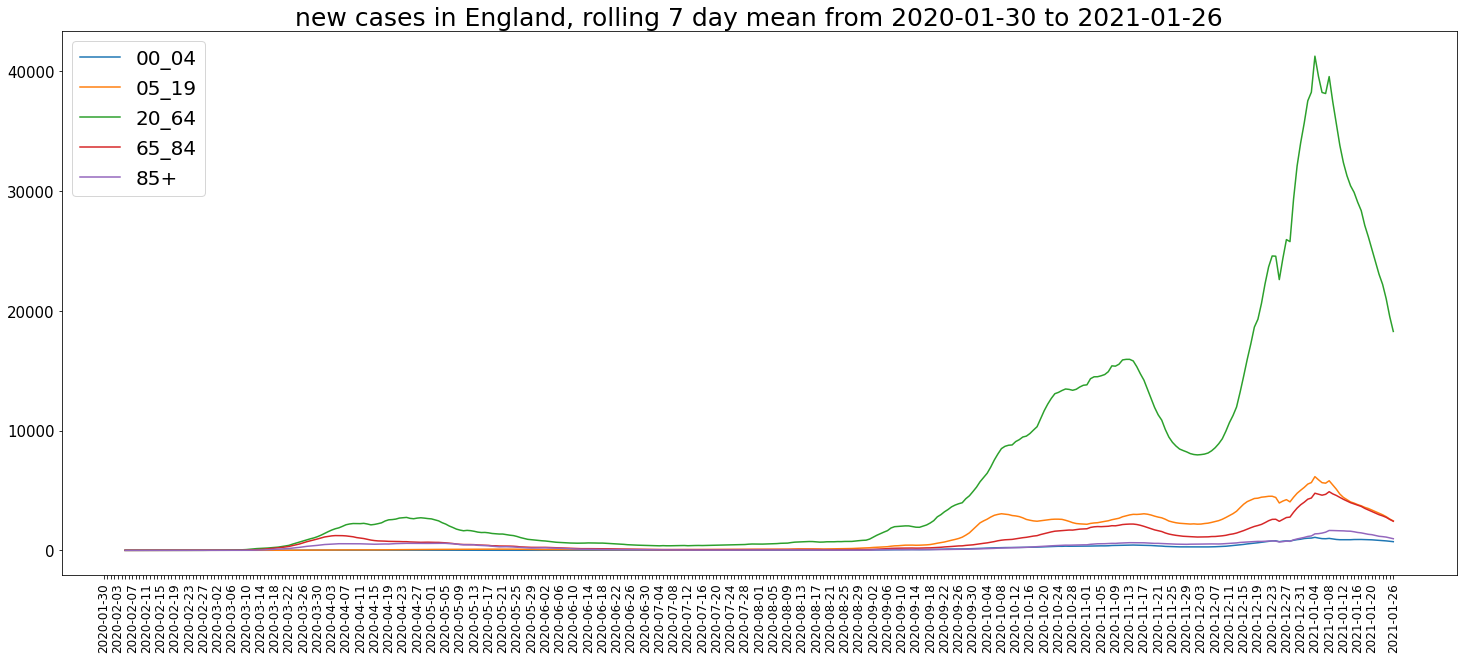

In [119]:
return1, return2, return3 = multiple_line_charts(df_eng_newcasesbyage_Summary, columns, chart_titles, 
                                                 'new cases in England, rolling 7 day mean from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [120]:
columns = ['00_04_rolling7','05_19_rolling7',
           '65_84_rolling7','85+_rolling7']
chart_titles = ['00_04','05_19','65_84','85+']
first_date = df_eng_newcasesbyage_Summary['date'].iloc[0]
last_date = df_eng_newcasesbyage_Summary['date'].iloc[-1]

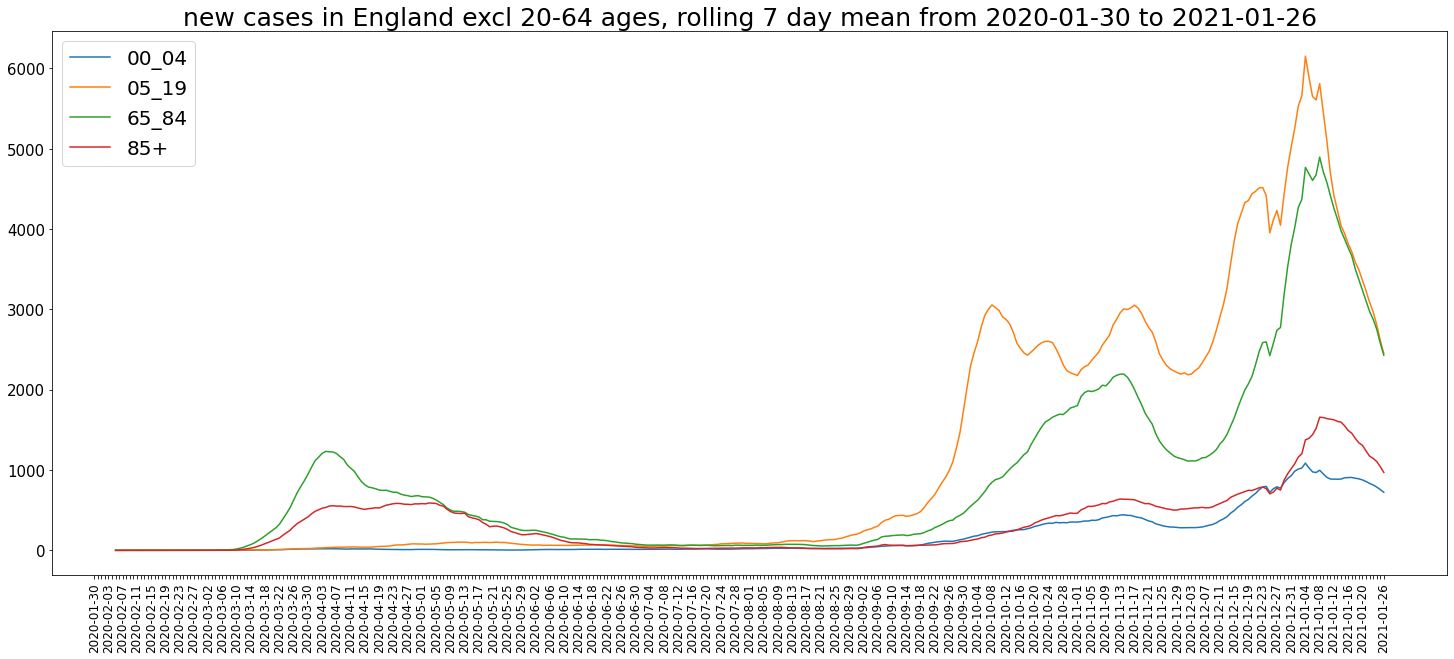

In [121]:
return1, return2, return3 = multiple_line_charts(df_eng_newcasesbyage_Summary, columns, chart_titles, 
                                                 'new cases in England excl 20-64 ages, rolling 7 day mean from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [122]:
columns = ['0_to_5_newrolling7','6_to_17_newrolling7','18_to_64_newrolling7',
            '65_to_84_newrolling7','85+_newrolling7']
chart_titles = ['00_04','05_19','20_64','65_84','85+']
first_date = df_eng_cumadmissionsbyage_Summary['date'].iloc[0]
last_date = df_eng_cumadmissionsbyage_Summary['date'].iloc[-1]

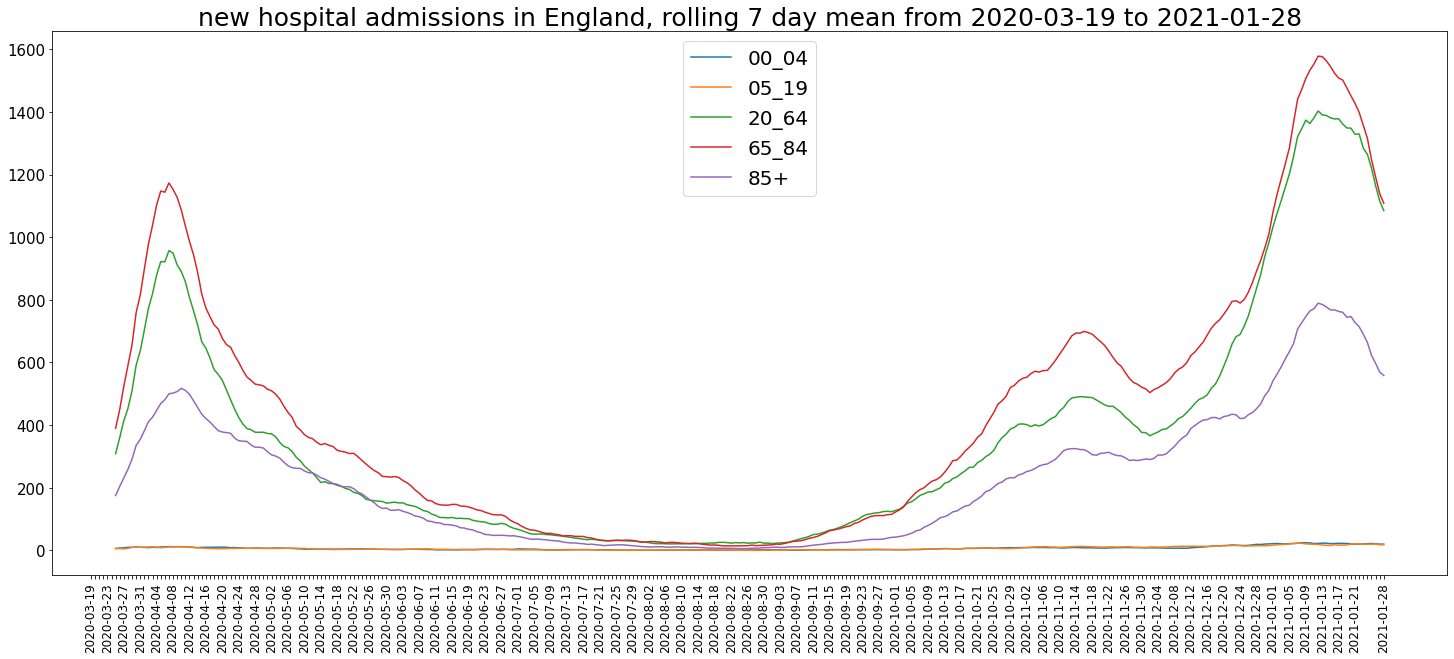

In [123]:
return1, return2, return3 = multiple_line_charts(df_eng_cumadmissionsbyage_Summary, columns, chart_titles, 
                                                 'new hospital admissions in England, rolling 7 day mean from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [124]:
columns = ['00_04_rolling7','05_19_rolling7','20_64_rolling7',
           '65_84_rolling7','85+_rolling7']
chart_titles = ['00_04','05_19','20_64','65_84','85+']
first_date = df_eng_cumdeathsbyage_Summary['date'].iloc[0]
last_date = df_eng_cumdeathsbyage_Summary['date'].iloc[-1]

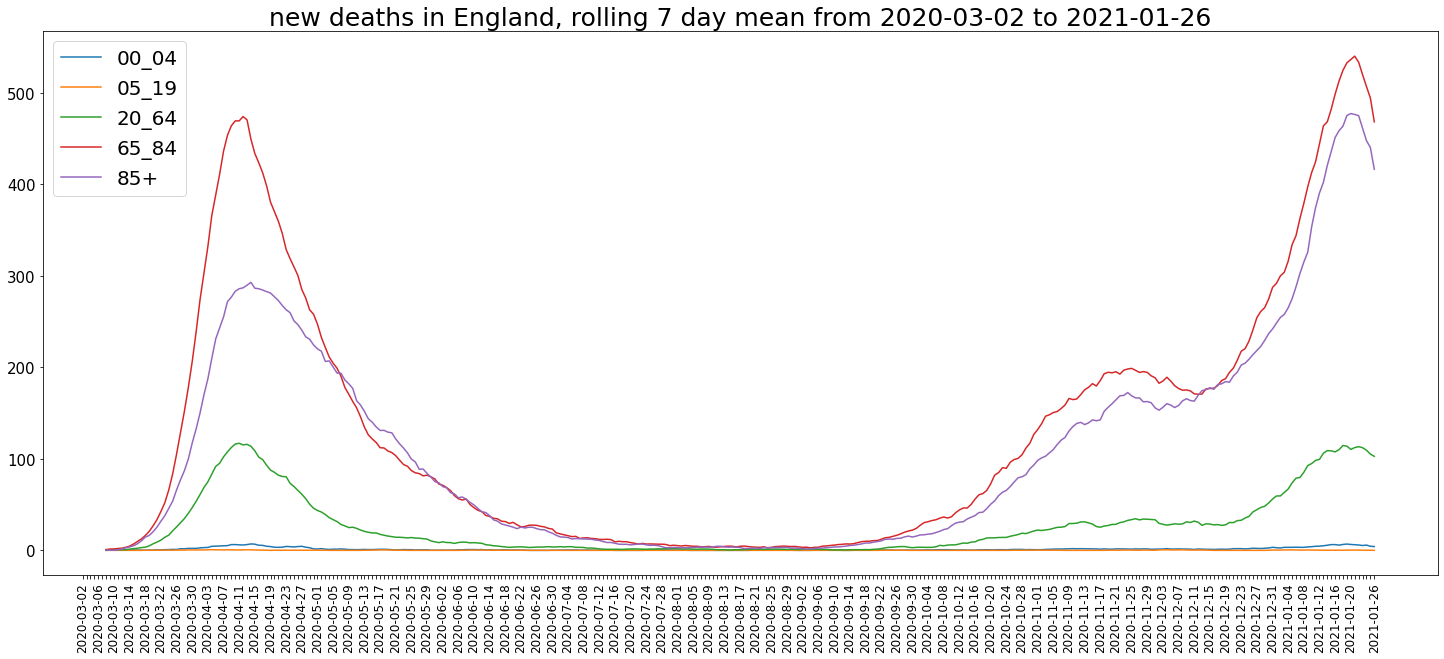

In [125]:
return1, return2, return3 = multiple_line_charts(df_eng_cumdeathsbyage_Summary, columns, chart_titles, 
                                                 'new deaths in England, rolling 7 day mean from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [126]:
columns = ['00_04_rolling7','05_19_rolling7','20_64_rolling7']
chart_titles = ['00_04','05_19','20_64']
first_date = df_eng_cumdeathsbyage_Summary['date'].iloc[0]
last_date = df_eng_cumdeathsbyage_Summary['date'].iloc[-1]

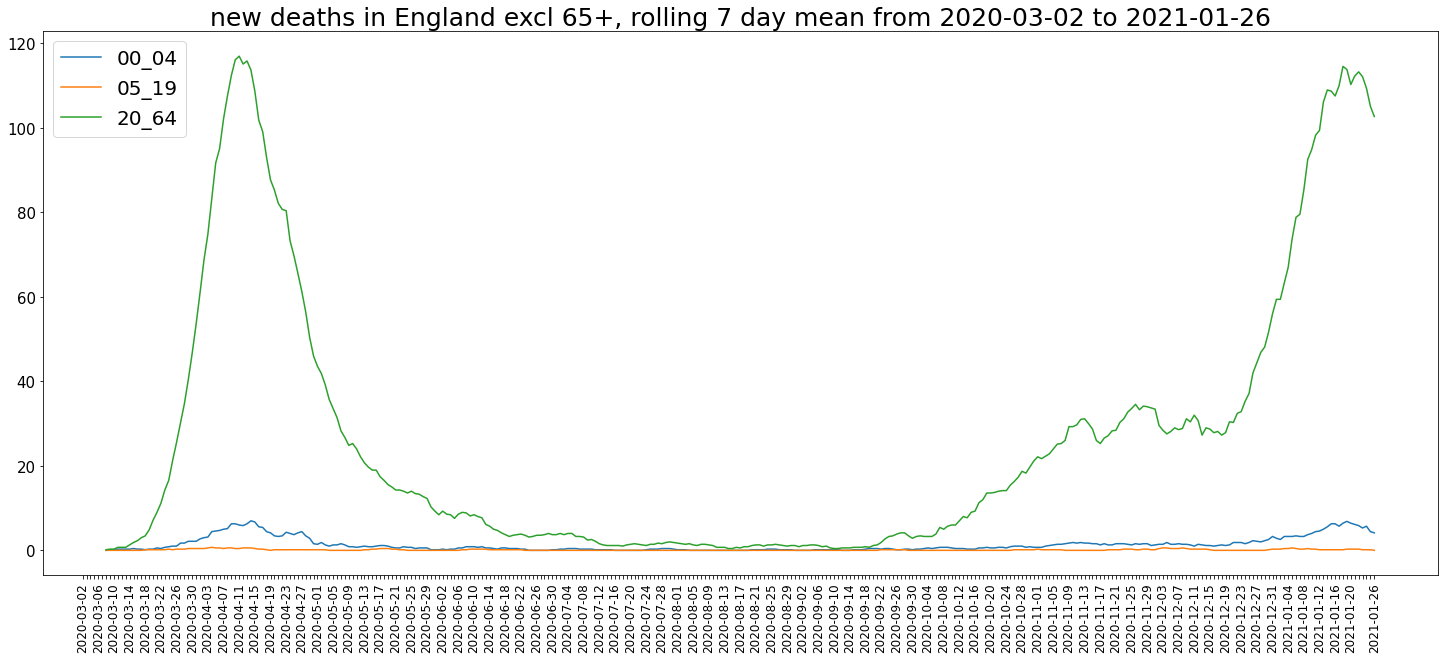

In [127]:
return1, return2, return3 = multiple_line_charts(df_eng_cumdeathsbyage_Summary, columns, chart_titles, 
                                                 'new deaths in England excl 65+, rolling 7 day mean from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [128]:
columns = ['00_04_cumsum','05_19_cumsum','20_64_cumsum',
           '65_84_cumsum','85+_cumsum']
chart_titles = ['00_04','05_19','20_64','65_84','85+']
first_date = df_eng_newcasesbyage_Summary['date'].iloc[0]
last_date = df_eng_newcasesbyage_Summary['date'].iloc[-1]

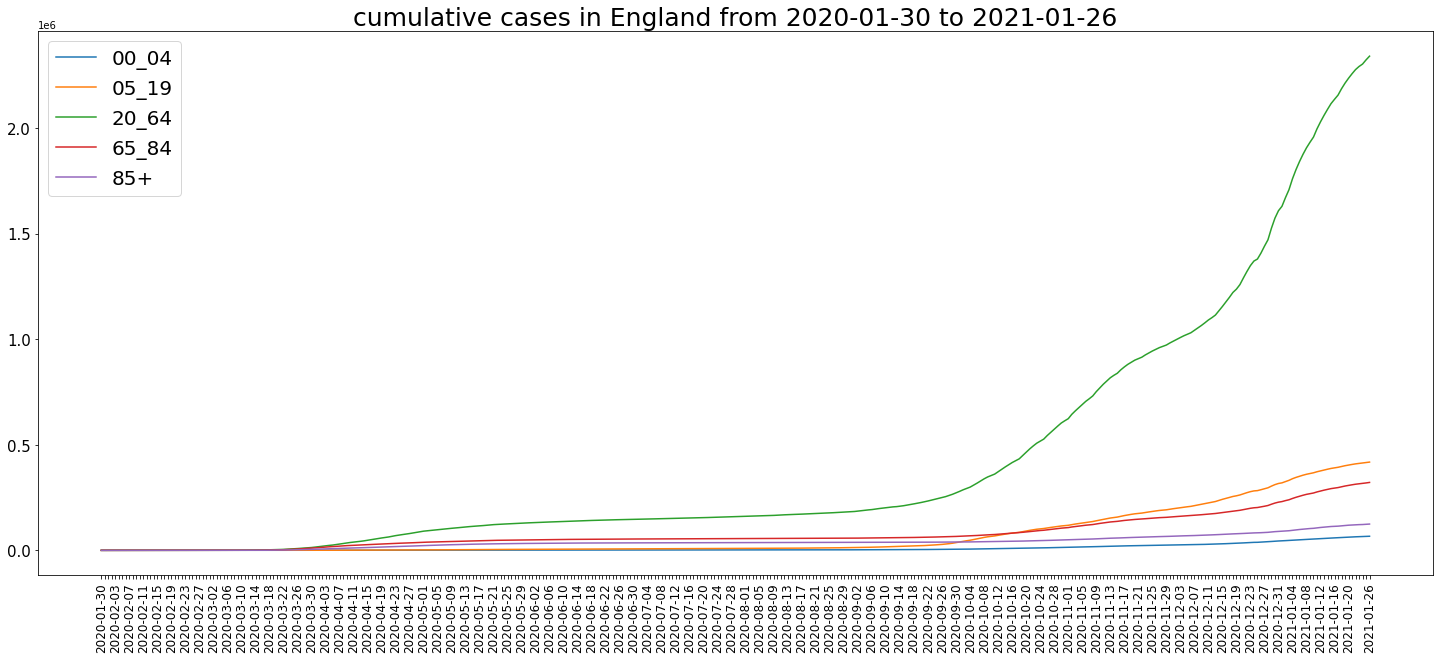

In [129]:
return1, return2, return3 = multiple_line_charts(df_eng_newcasesbyage_Summary, columns, chart_titles, 
                                                 'cumulative cases in England from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [130]:
columns = ['00_04_cumsum','05_19_cumsum',
           '65_84_cumsum','85+_cumsum']
chart_titles = ['00_04','05_19','65_84','85+']
first_date = df_eng_newcasesbyage_Summary['date'].iloc[0]
last_date = df_eng_newcasesbyage_Summary['date'].iloc[-1]

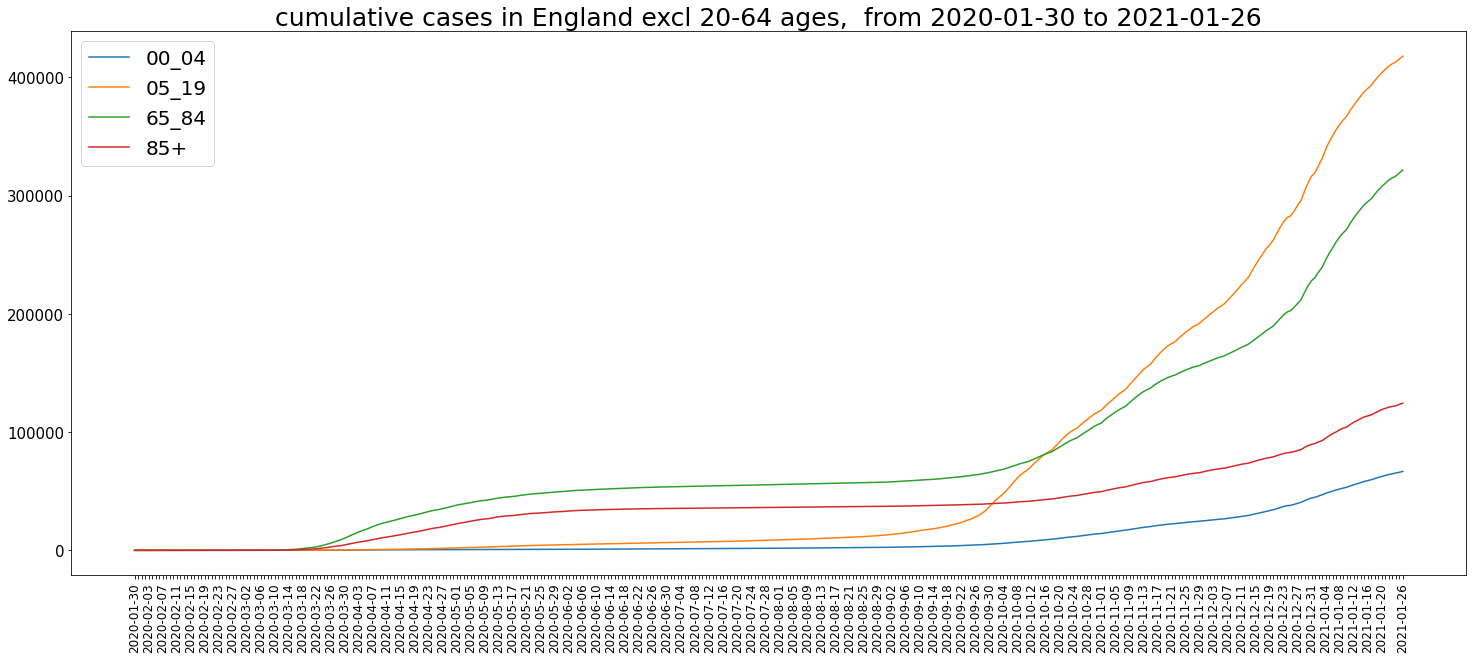

In [131]:
return1, return2, return3 = multiple_line_charts(df_eng_newcasesbyage_Summary, columns, chart_titles, 
                                                 'cumulative cases in England excl 20-64 ages,  from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [132]:
columns = ['0_to_5_newcumsum','6_to_17_newcumsum','18_to_64_newcumsum',
            '65_to_84_newcumsum','85+_newcumsum']
chart_titles = ['00_04','05_19','20_64','65_84','85+']
first_date = df_eng_cumadmissionsbyage_Summary['date'].iloc[0]
last_date = df_eng_cumadmissionsbyage_Summary['date'].iloc[-1]

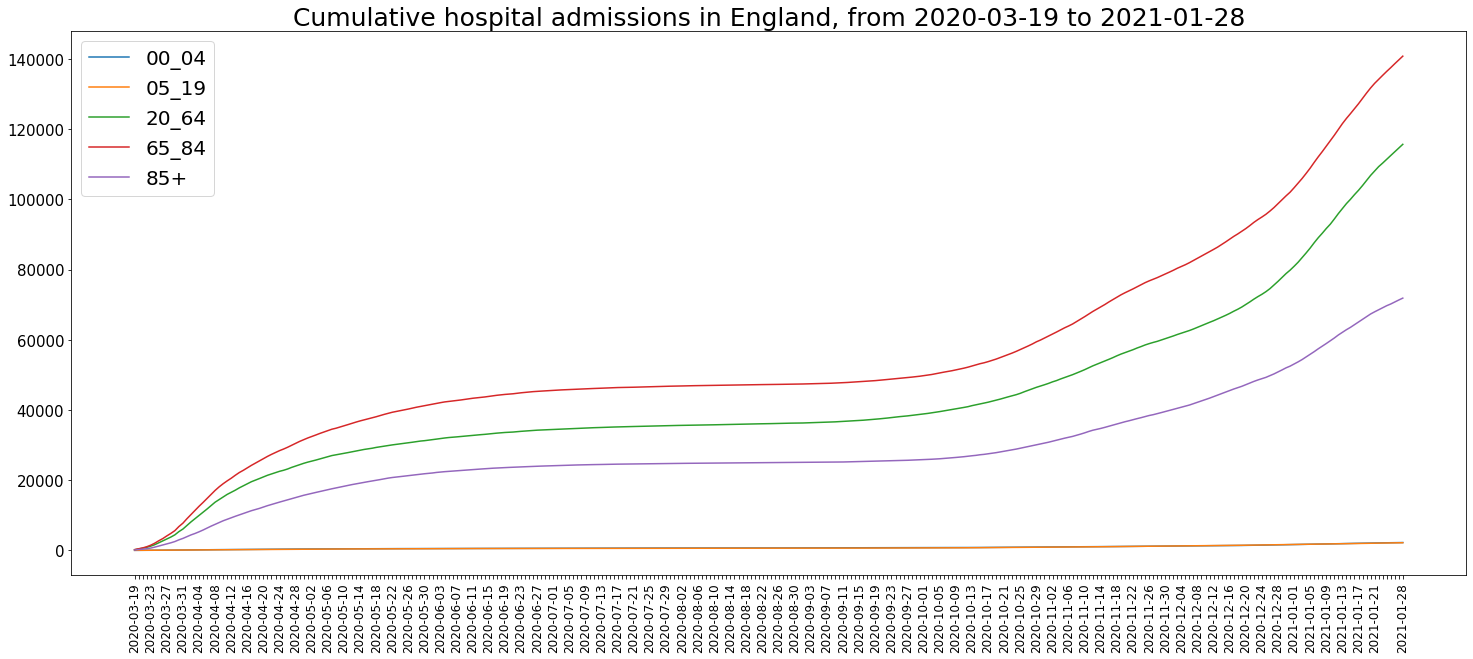

In [133]:
return1, return2, return3 = multiple_line_charts(df_eng_cumadmissionsbyage_Summary, columns, chart_titles, 
                                                 'Cumulative hospital admissions in England, from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [134]:
columns = ['00_04_cumsum','05_19_cumsum','20_64_cumsum',
           '65_84_cumsum','85+_cumsum']
chart_titles = ['00_04','05_19','20_64','65_84','85+']
first_date = df_eng_cumdeathsbyage_Summary['date'].iloc[0]
last_date = df_eng_cumdeathsbyage_Summary['date'].iloc[-1]

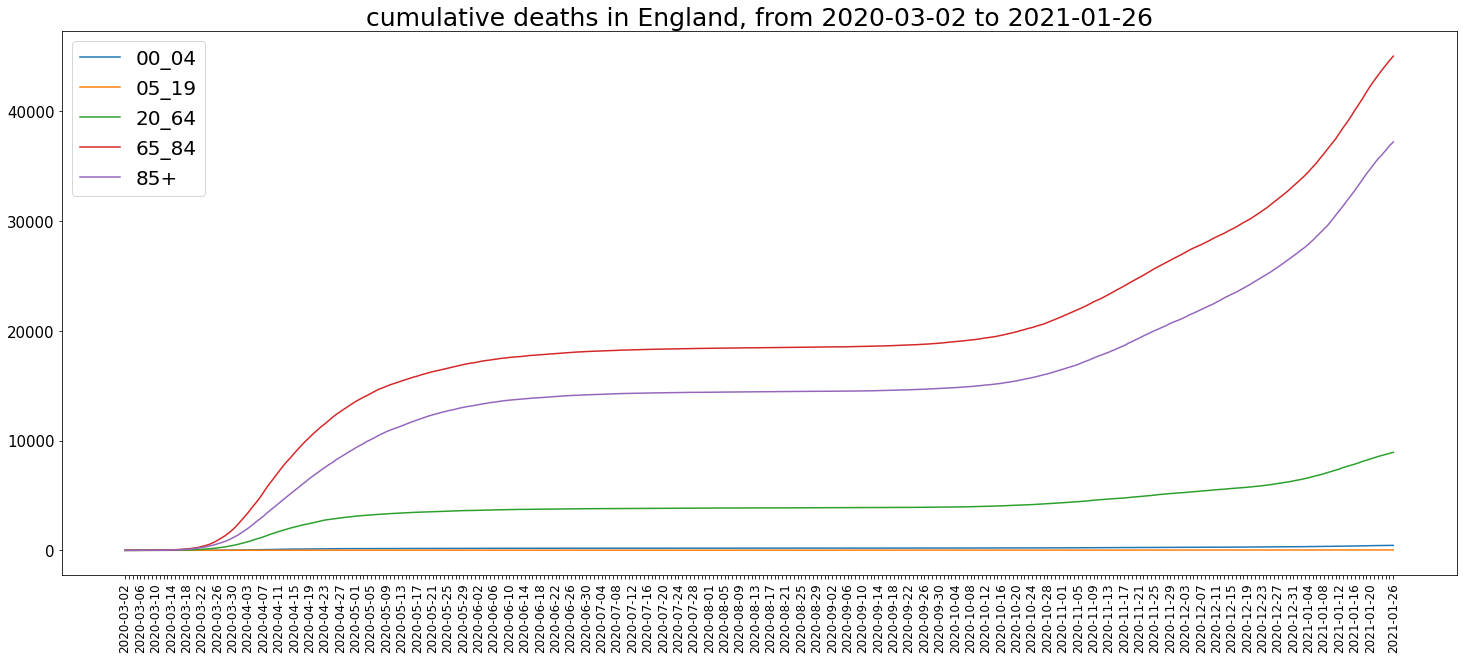

In [135]:
return1, return2, return3 = multiple_line_charts(df_eng_cumdeathsbyage_Summary, columns, chart_titles, 
                                                 'cumulative deaths in England, from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [136]:
columns = ['00_04_cumsum','05_19_cumsum','20_64_cumsum']
chart_titles = ['00_04','05_19','20_64']
first_date = df_eng_cumdeathsbyage_Summary['date'].iloc[0]
last_date = df_eng_cumdeathsbyage_Summary['date'].iloc[-1]

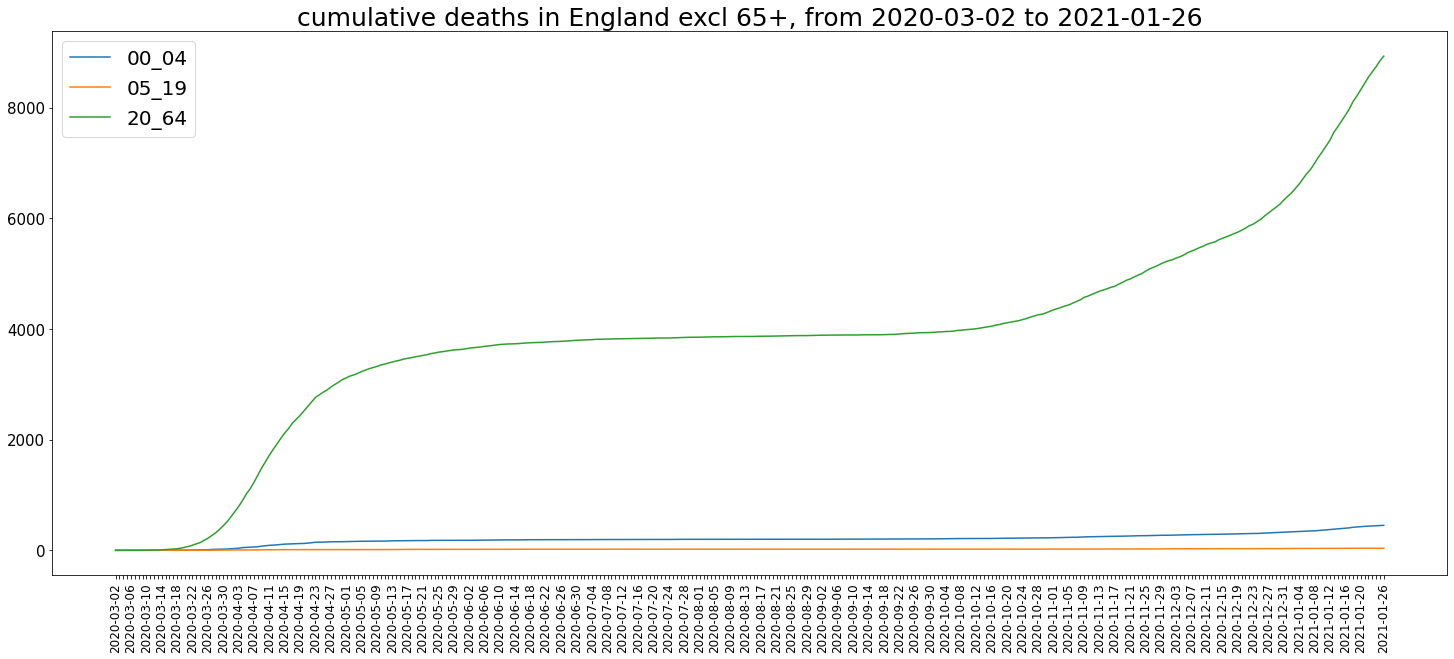

In [137]:
return1, return2, return3 = multiple_line_charts(df_eng_cumdeathsbyage_Summary, columns, chart_titles, 
                                                 'cumulative deaths in England excl 65+, from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [138]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    #plt.savefig('Auto Trader - bar chart of Lookers cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('Regional Data')
    slideText.append('')
    imagePath.append('')

plt.show()

In [139]:
df_EM.tail()

date areaType   areaCode       areaName  newCasesBySpecimenDate  \
340  2021-01-26   region  E12000004  East Midlands                    2302   
341  2021-01-27   region  E12000004  East Midlands                    2223   
342  2021-01-28   region  E12000004  East Midlands                    2124   
343  2021-01-29   region  E12000004  East Midlands                    1651   
344  2021-01-30   region  E12000004  East Midlands                     173   

     newDeaths28DaysByDeathDate  
340                        76.0  
341                        84.0  
342                        53.0  
343                        57.0  
344                         8.0

In [140]:
# add a new column to each dataframe for the rolling 7 day mean

In [141]:
def rolling_seven(df, col_names):
    
    col_names = col_names
    
    for i in range(len(col_names)):
        df[str(col_names[i]) + '_rolling'] = df[str(col_names[i])].rolling(7).mean()

In [142]:
df_list = [df_EM, df_EE, df_LO, df_NE, df_NW, df_SE, df_SW, df_WM, df_YH]

col_names = ['newCasesBySpecimenDate', 'newDeaths28DaysByDeathDate']

In [143]:
for i in range(len(df_list)):
    rolling_seven(df_list[i], col_names)

In [144]:
def regional_charts(df, col_names, chart_titles, region):

    # bar charts showing number of new cases and deaths each day per region

    col_names = col_names

    #fig, ax = plt.subplots(nrows=int(len(col_names)/3)+1, ncols=3, figsize=(25,25))
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(25,25))

    last_date = df['date'].iloc[-1]

    plt.subplots_adjust(hspace=0.4, wspace=0.6)
    plt.suptitle('Bar charts showing daily new cases and new deaths in ' + str(region) + ' to ' + last_date, fontsize = 20)
    #plt.suptitle("anything over 'Less than a year' indicates that returning members keep their history", fontsize = 20)

    x = df.index.values
    x1 = df.index.values[:-5] # for rolling deaths, dont plot the last 5 data points, incomplete

    labels = list(df['date'])

    # for i in range(1,len(labels),2):
    #     labels[i-1]=''
    # if len(labels) % 2 != 0:
    #     labels[-1]=''


    # prevent x-axis labels from overlapping by printing every nth label
    for i in range(4,len(labels),4):
        labels[i-1], labels[i-2], labels[i-3]='','',''

    labels[len(labels)-1]=list(df['date'])[-1]
    labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''


    for ii in range(len(col_names)):
        #for i in range(len(df)):
        y1 = df[col_names[ii]]
        if ii == 1:
            y2 = df[str(col_names[ii]) + '_rolling'][:-5]
        else:
            y2 = df[str(col_names[ii]) + '_rolling']
        ax[ii].set_title(chart_titles[ii], fontsize=20)
        ax[ii].set_xticks(x)
        ax[ii].set_xticklabels(labels, rotation = 90, fontsize=12)
        ax[ii].yaxis.set_tick_params(labelsize=15)
        ax[ii].yaxis.set_major_locator(MaxNLocator(integer=True))
        ax[ii].bar(x,y1, color='#1f77b4')
        #ax[ii].plot(x,y2, color='#bcbd22', lw=4)
        if ii ==1:
            ax[ii].plot(x1,y2, color='black', lw=4)
        else:
            ax[ii].plot(x,y2, color='black', lw=4) 
        #ax[int(ii/3),ii - 3*int(ii/3)].bar(df_deaths_comp['date'][i],y1[i], color='#1f77b4')

    start_date = df['date'].iloc[0]
    end_date = df['date'].iloc[-1]

    #fileName = 'Coviduk - Bar charts cumulative deaths each week by age group.png'

    #slideTitle.append('Bar charts cumulative deaths each week by age group to ' + last_date)
    #slideText.append(str(start_date) + ' to ' + str(end_date))
    #imagePath.append(fileName)

    # need to remove any dates filename when saved as .png given they change
    #plt.savefig(fileName, bbox_inches = 'tight')

    #     slideTitle_ = 'Bar charts cumulative deaths each week by age group to ' + last_date
    #     slideText_ = (str(start_date) + ' to ' + str(end_date))
    #     imagePath_ = (fileName)  

    #plt.show()

    fileName = 'Coviduk - regional charts for ' + str(region) + '.png'  
    
    
    # need to remove any dates filename when saved as .png given they change
    plt.savefig(fileName, bbox_inches = 'tight')
    
    slideTitle_ = str(region) + ': daily cases and daily deaths'
    slideText_ = (str(start_date) + ' to ' + str(end_date))
    imagePath_ = (fileName)  
    
    plt.show()
    
    return slideTitle_, slideText_, imagePath_ 

In [145]:
col_names = ['newCasesBySpecimenDate', 'newDeaths28DaysByDeathDate']

chart_titles = ['daily new cases and 7 day rolling mean',
                'daily new deaths by date of death and 7 day rolling mean']

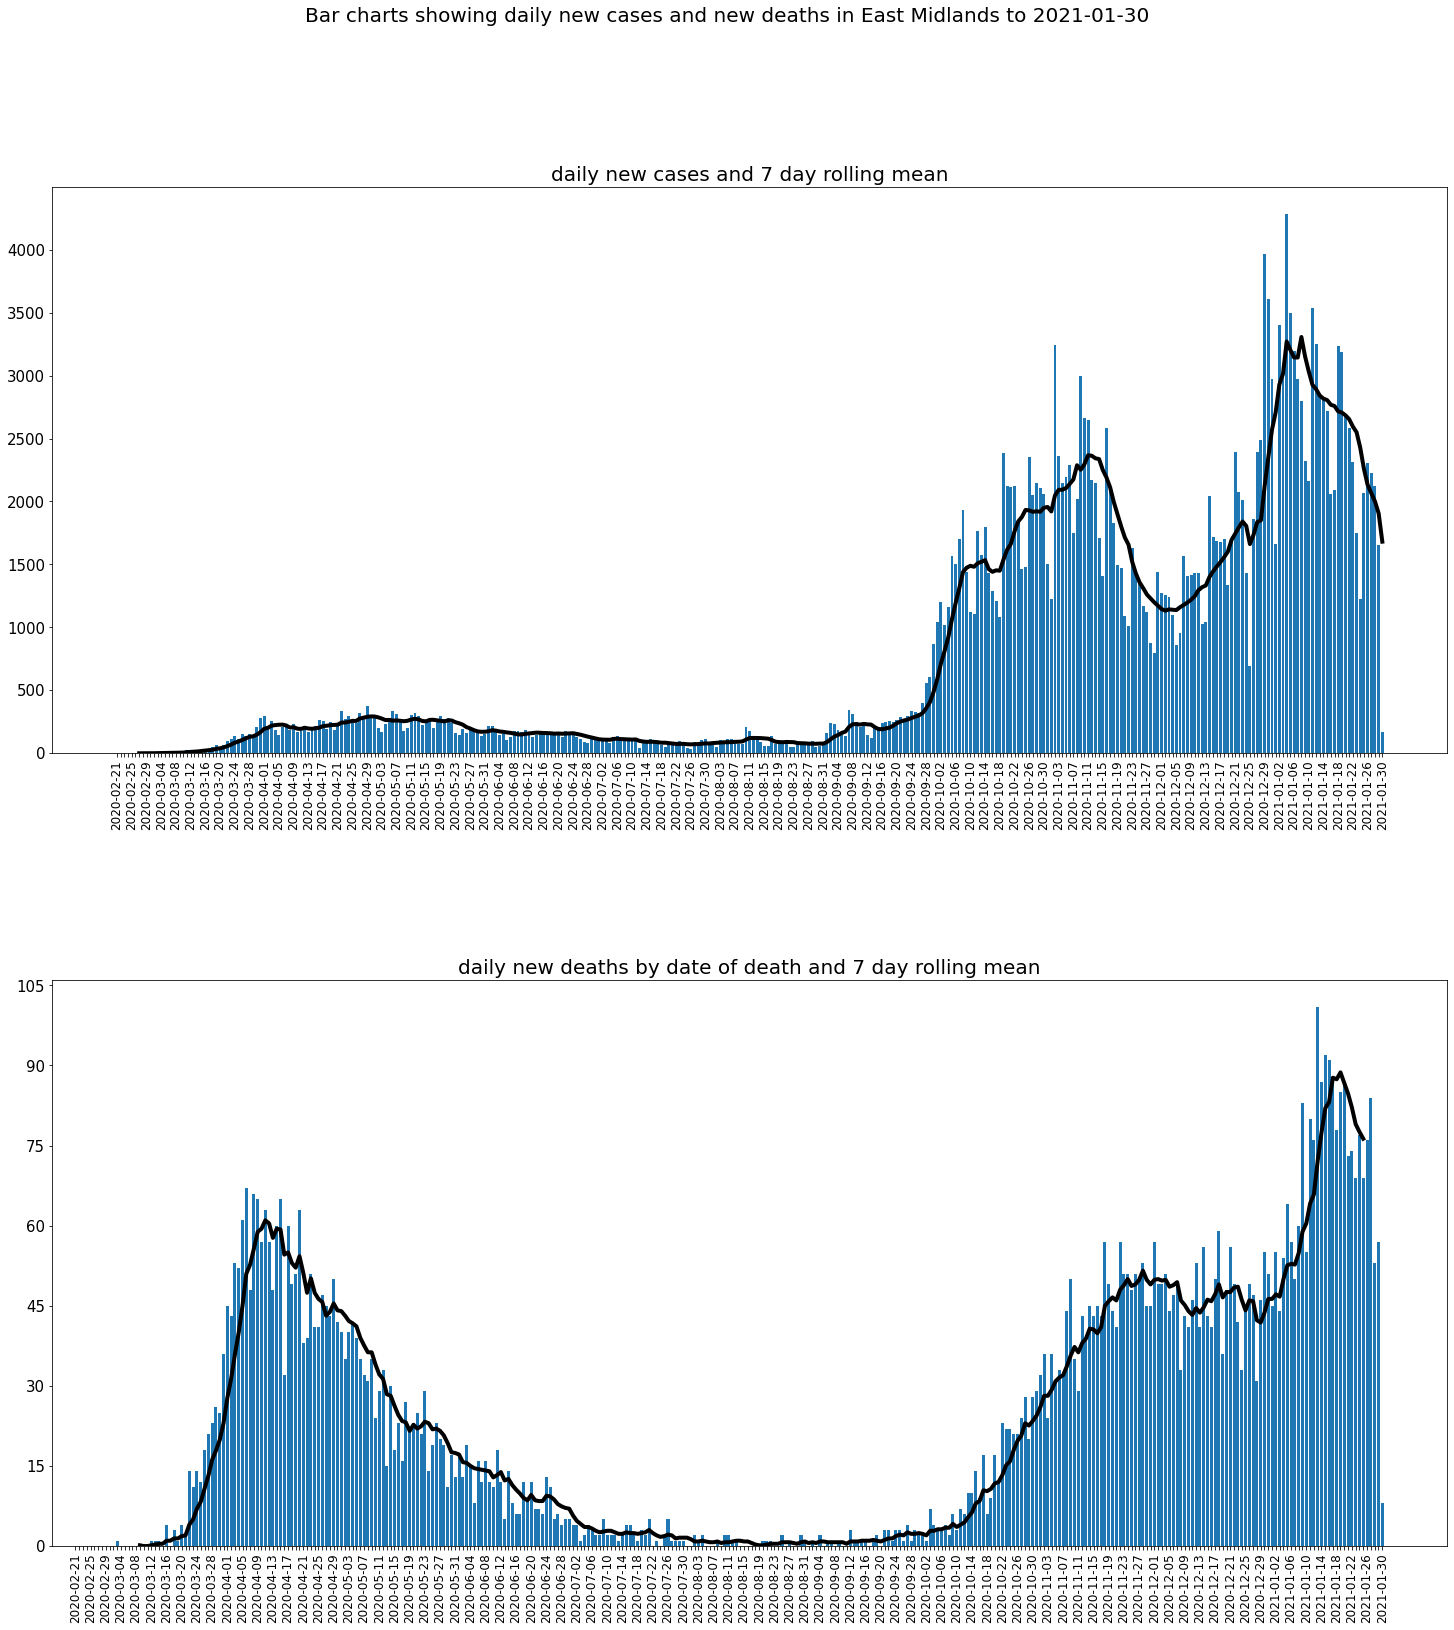

In [146]:
return1, return2, return3 = regional_charts(df_EM, col_names, chart_titles, 'East Midlands')

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

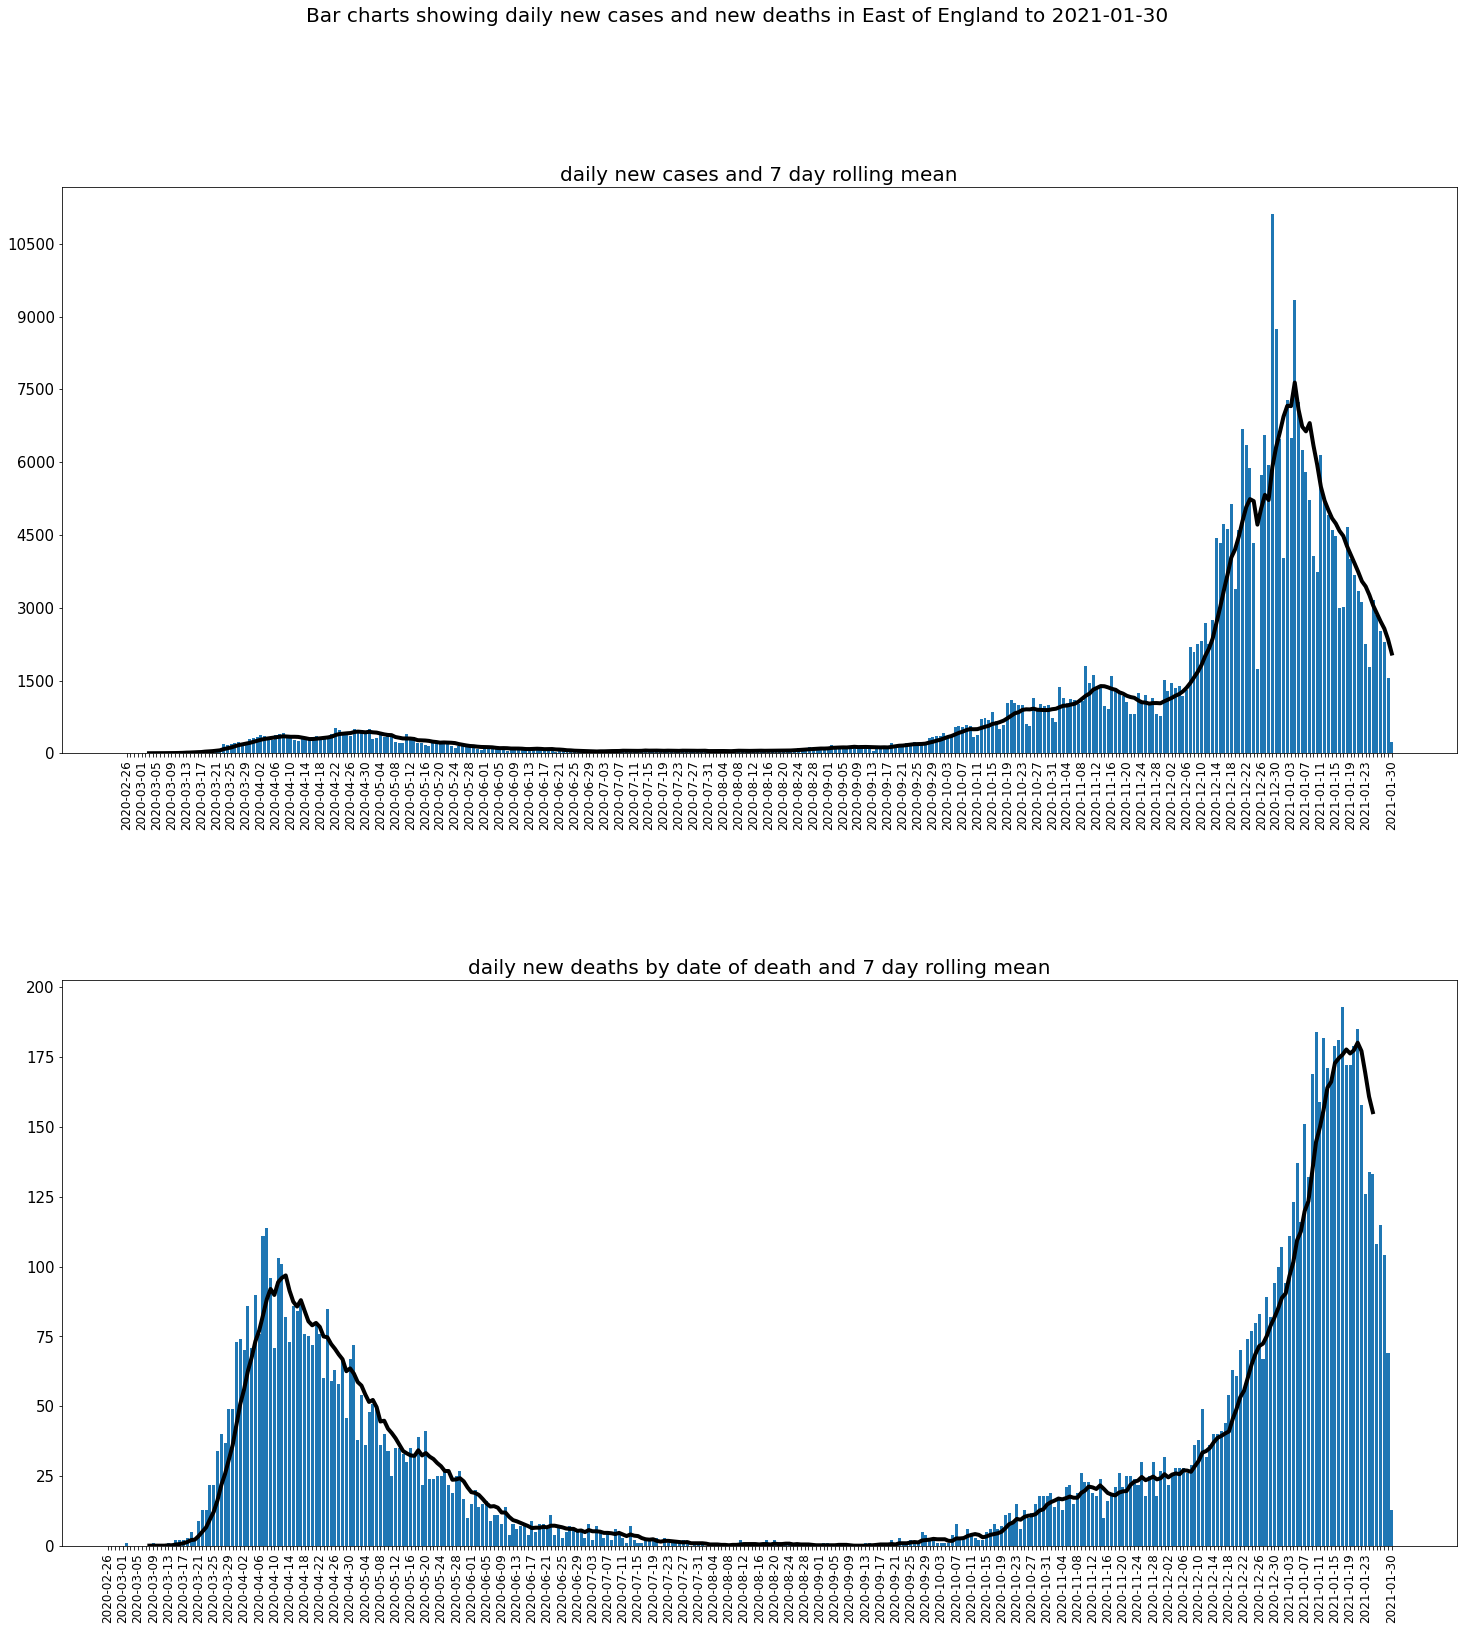

In [147]:
return1, return2, return3 = regional_charts(df_EE, col_names, chart_titles, 'East of England')

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

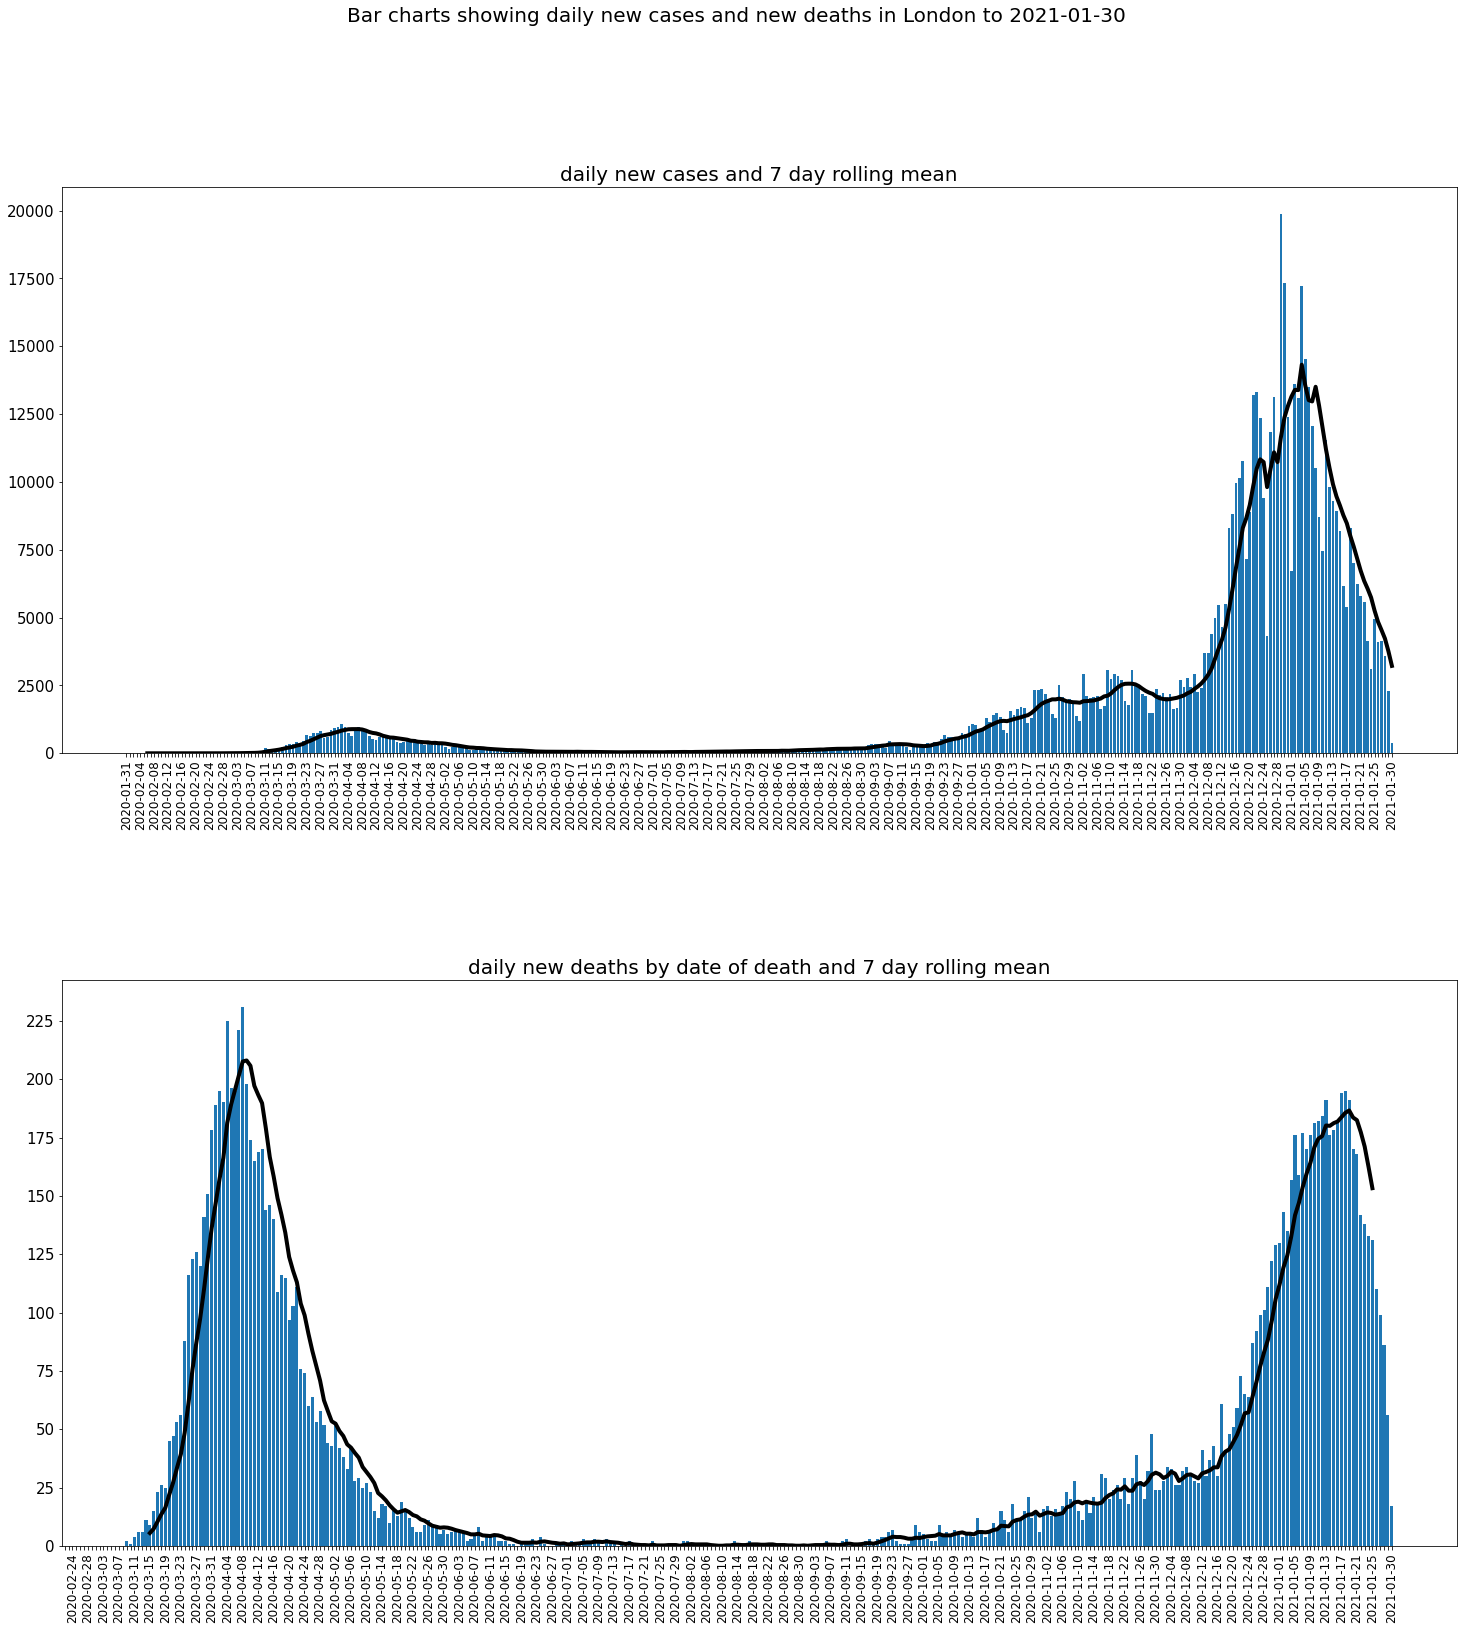

In [148]:
return1, return2, return3 = regional_charts(df_LO, col_names, chart_titles, 'London')

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

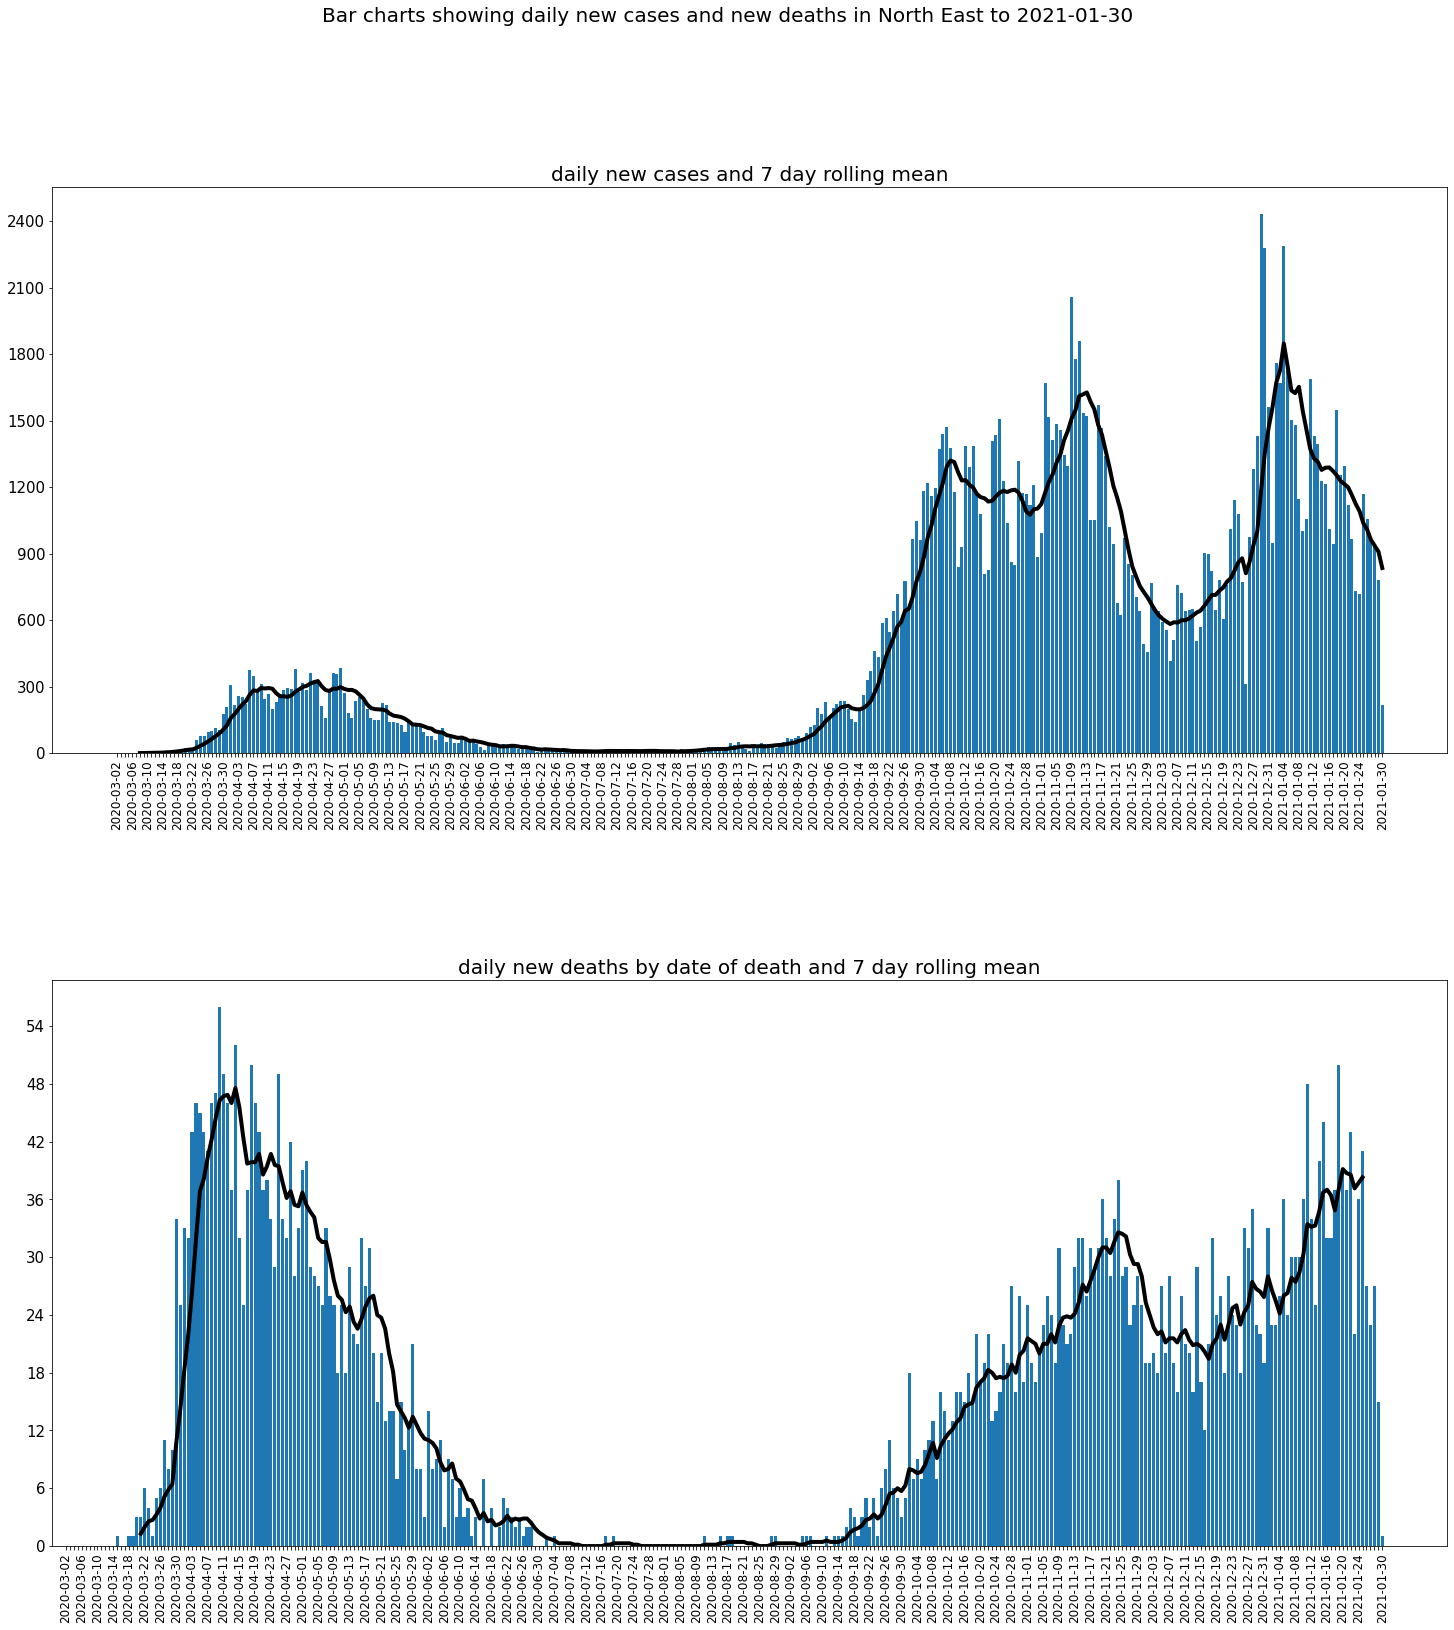

In [149]:
return1, return2, return3 = regional_charts(df_NE, col_names, chart_titles, 'North East')

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

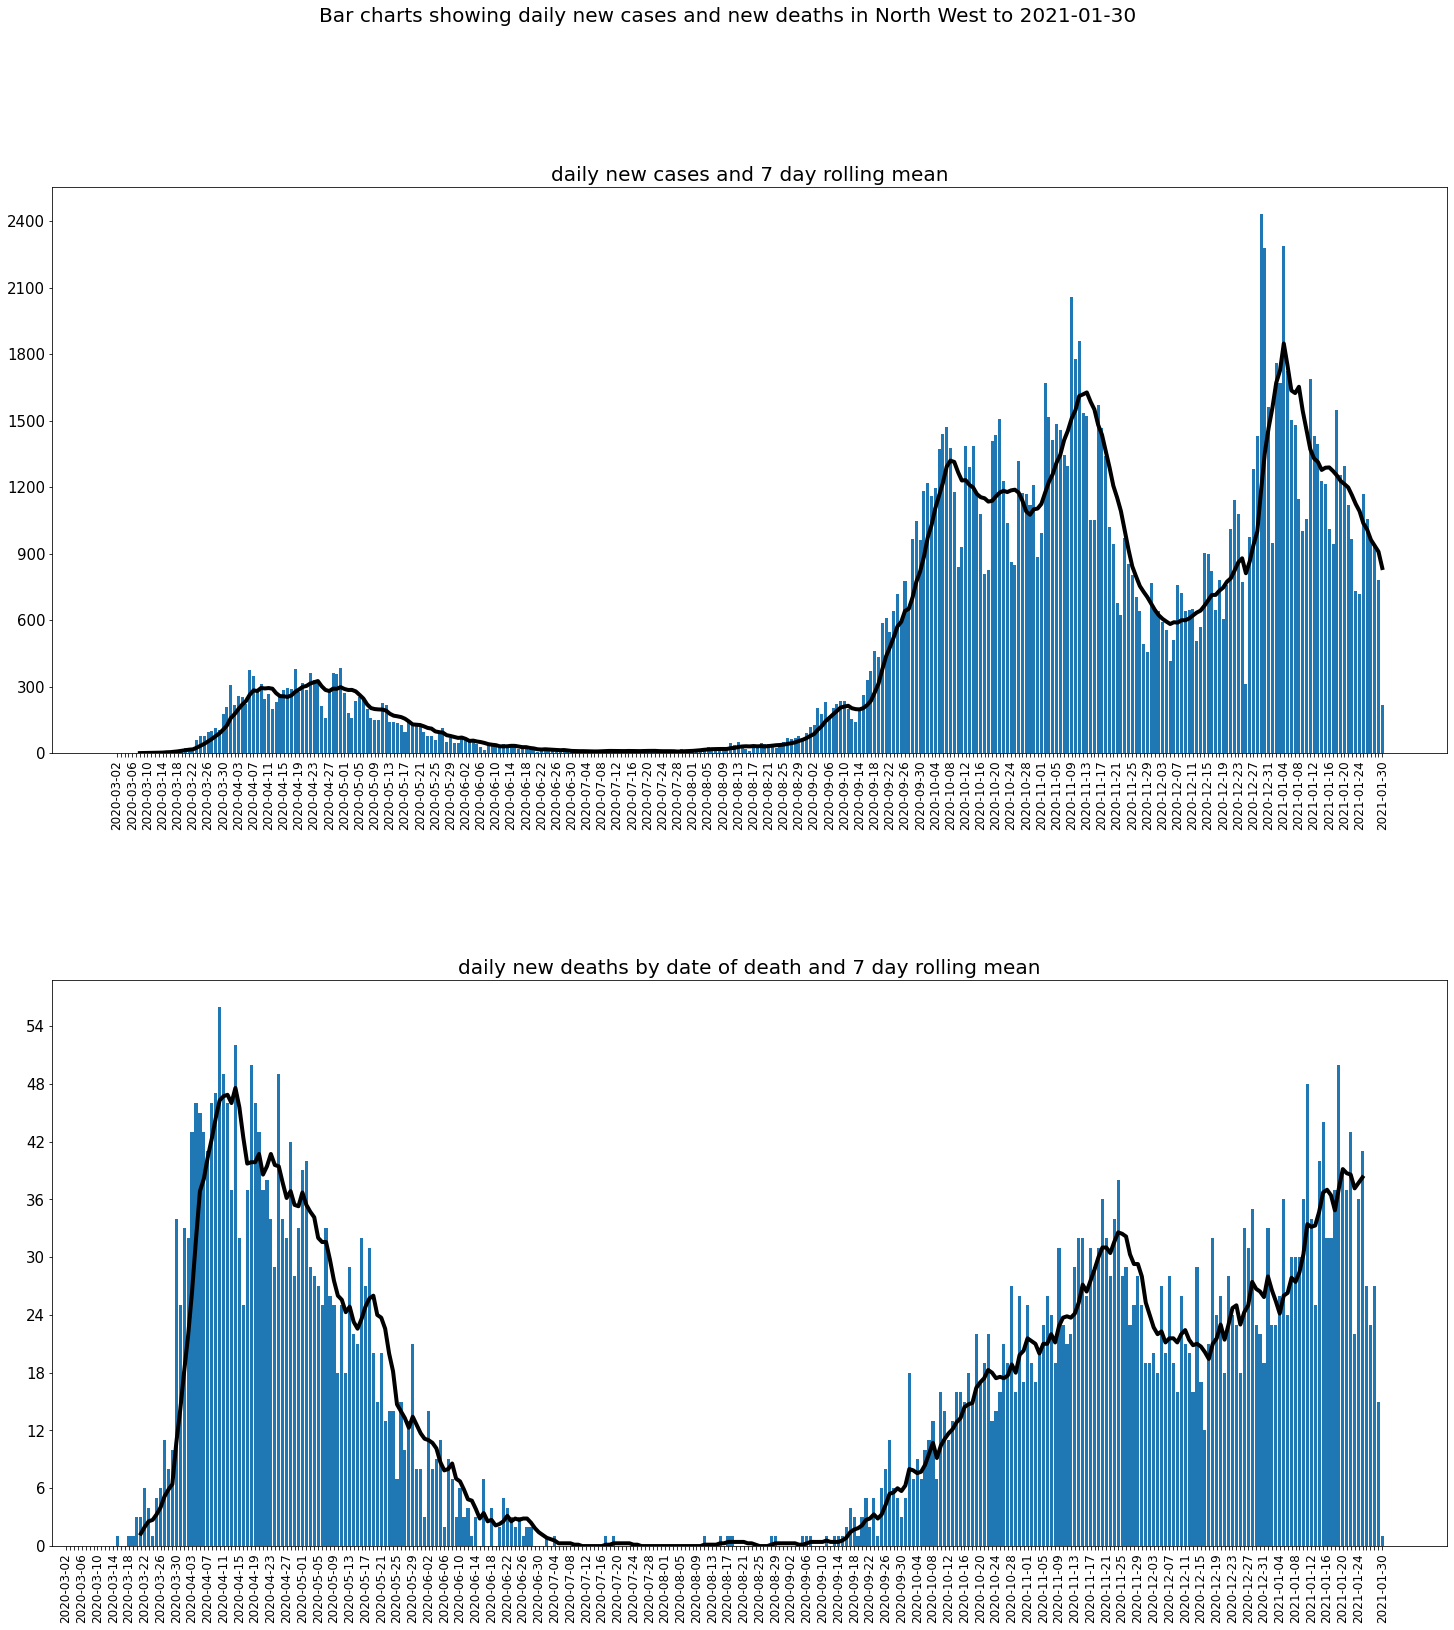

In [150]:
return1, return2, return3 = regional_charts(df_NW, col_names, chart_titles, 'North West')

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

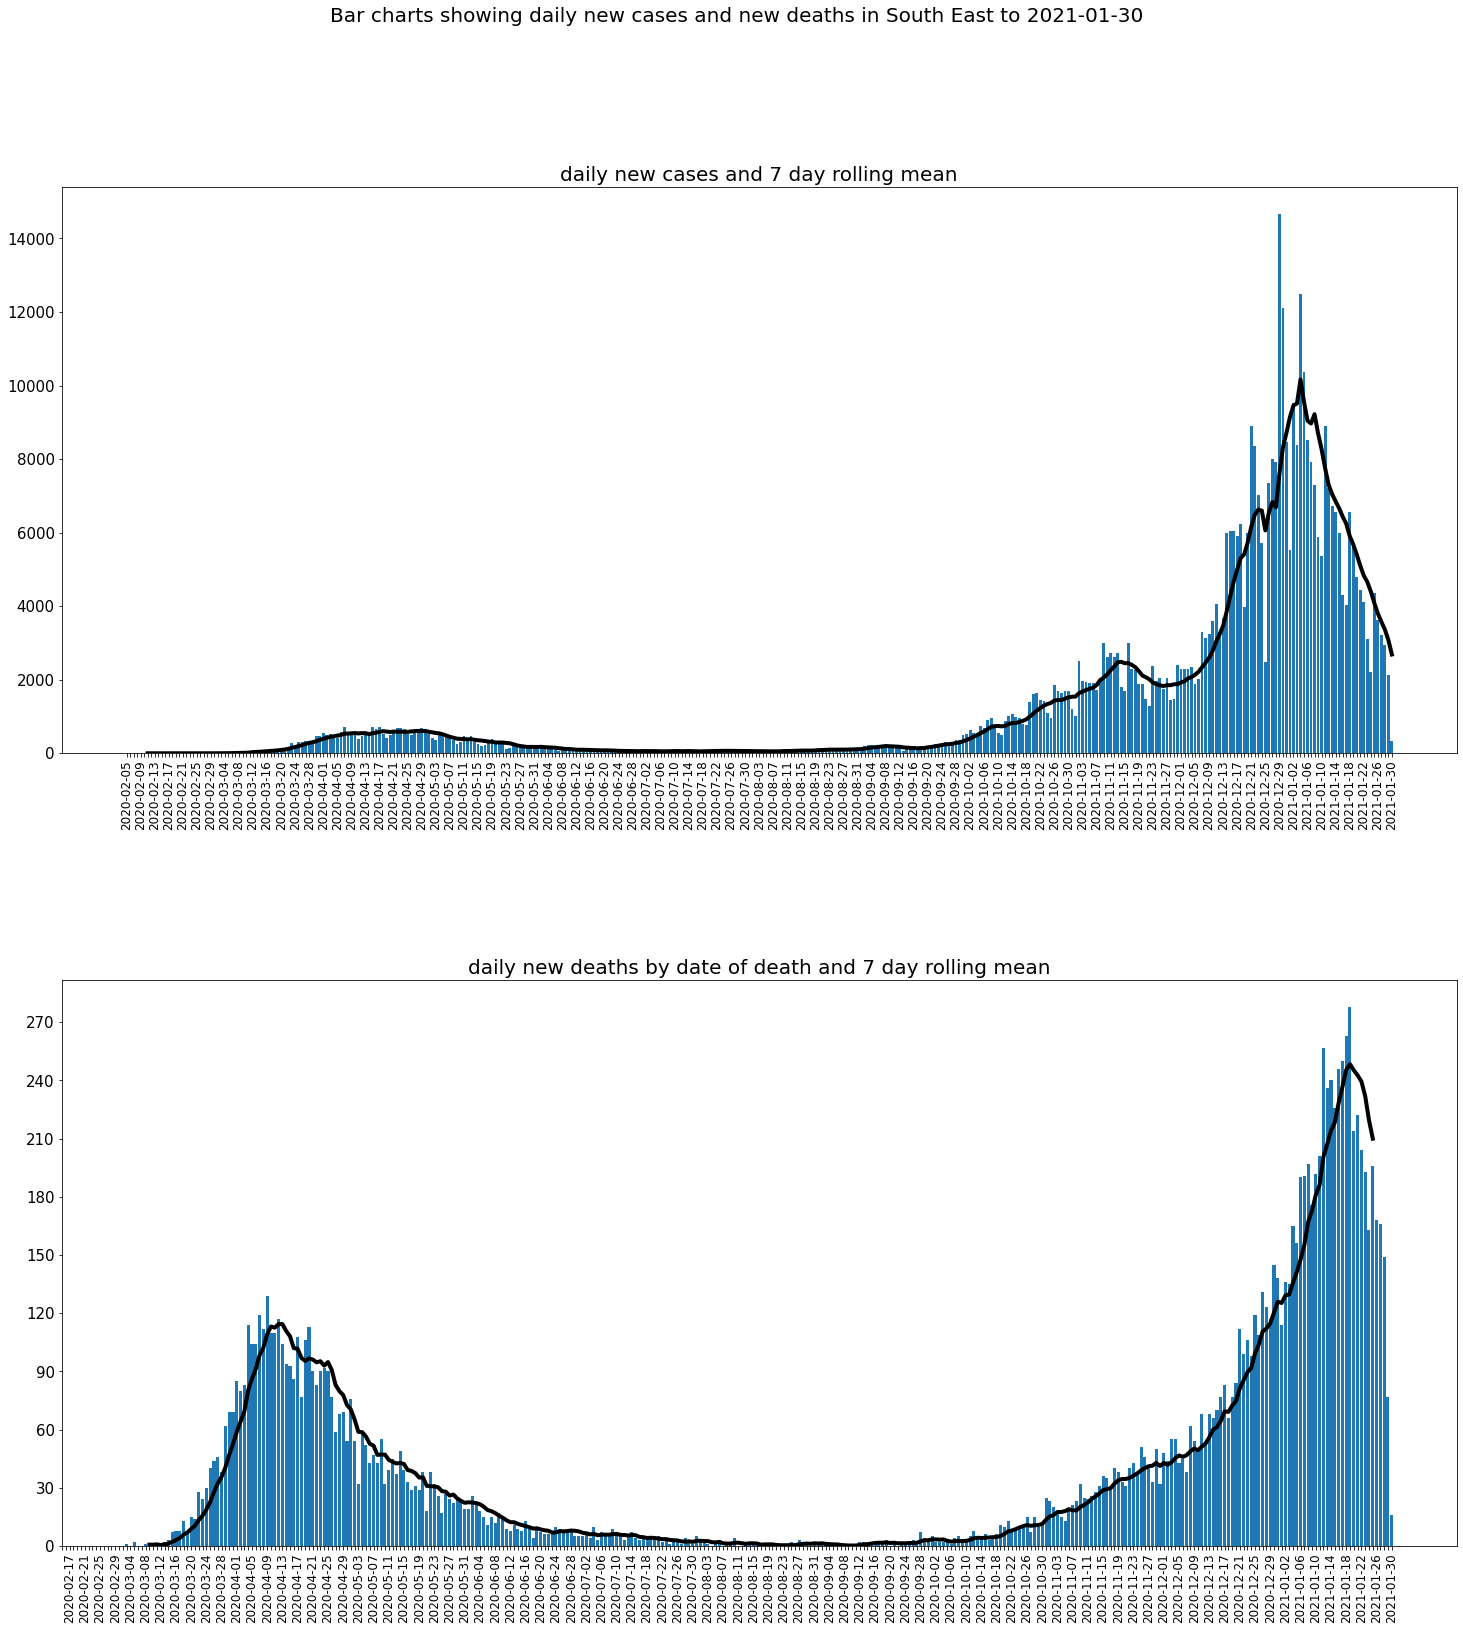

In [151]:
return1, return2, return3 = regional_charts(df_SE, col_names, chart_titles, 'South East')

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

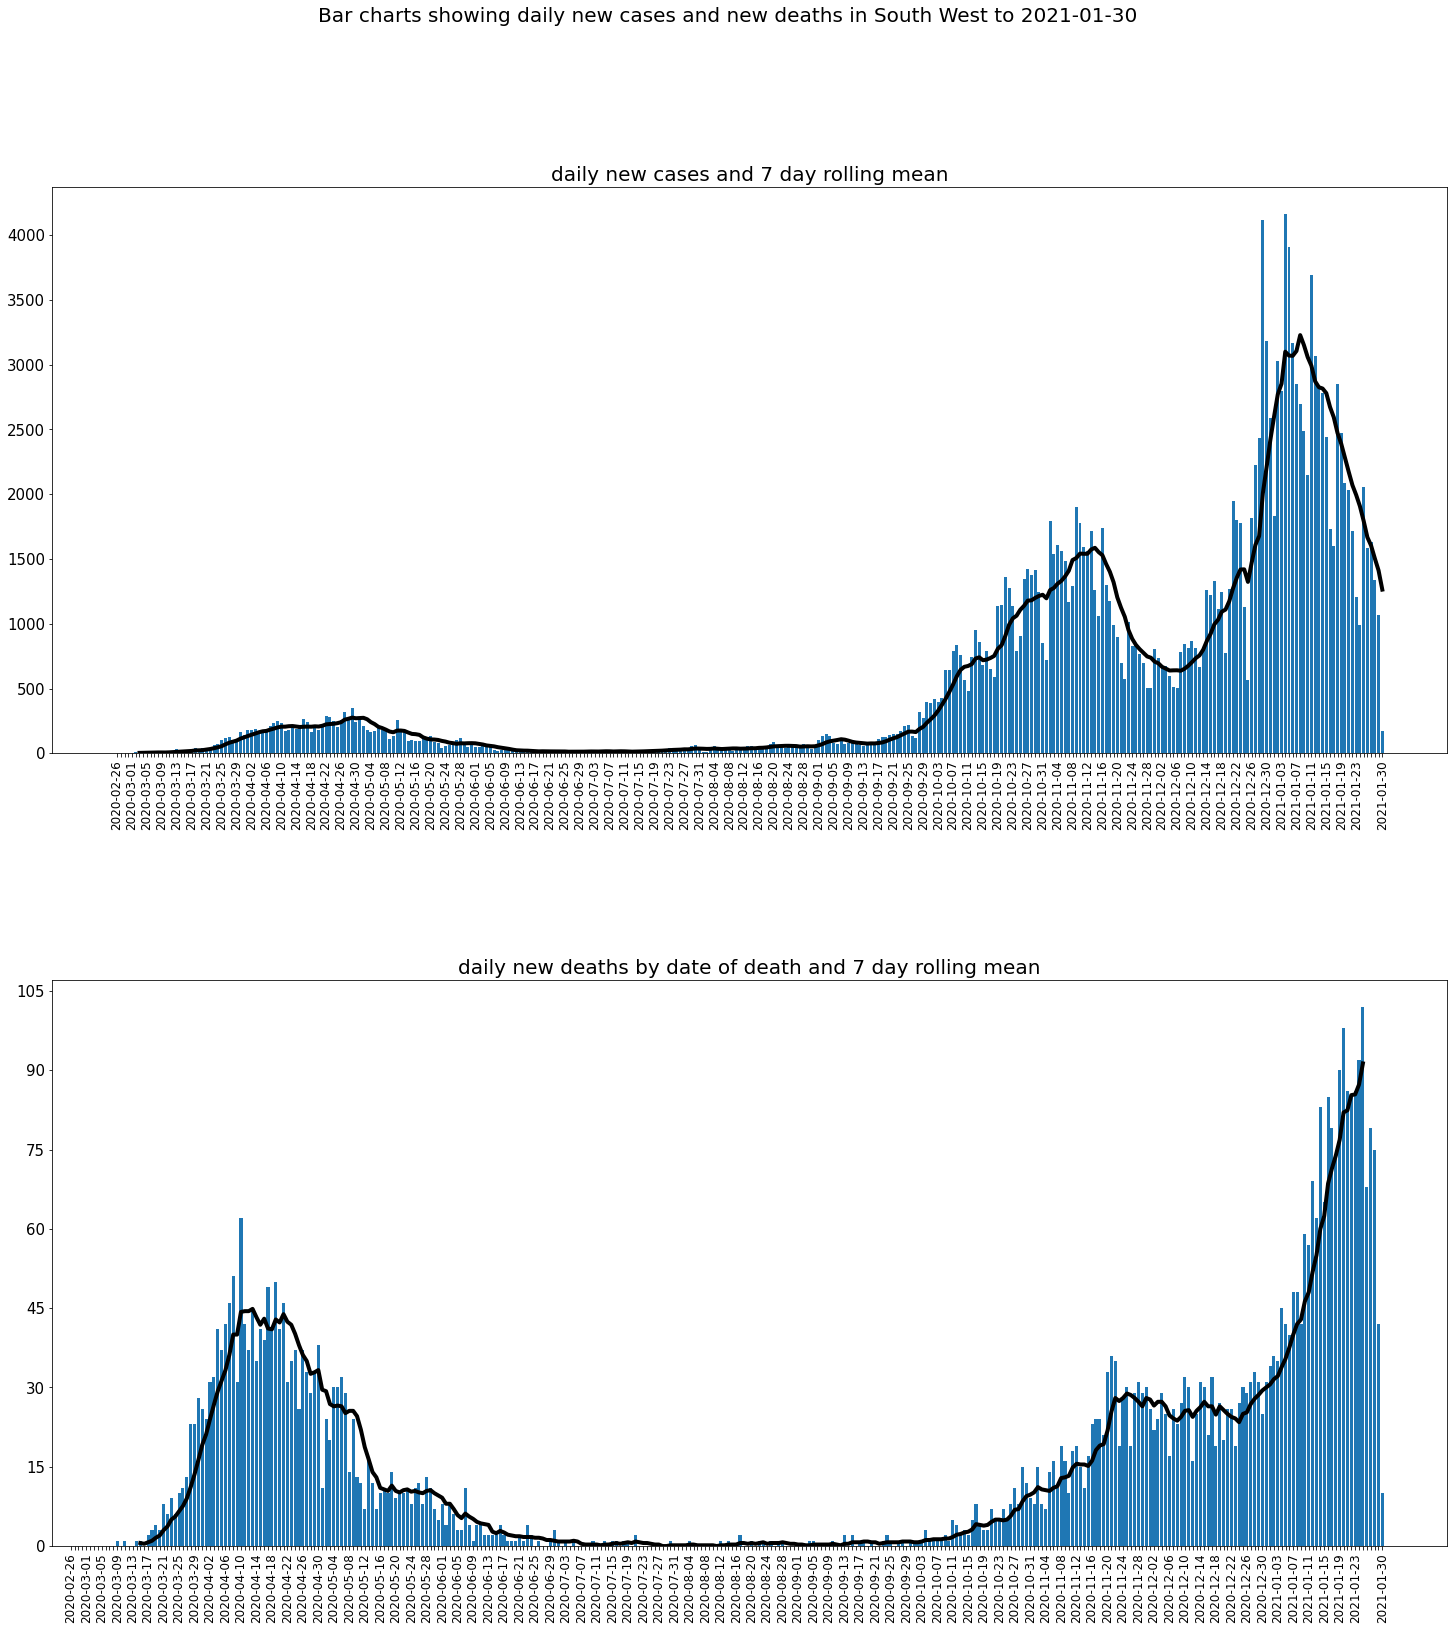

In [152]:
return1, return2, return3 = regional_charts(df_SW, col_names, chart_titles, 'South West')

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

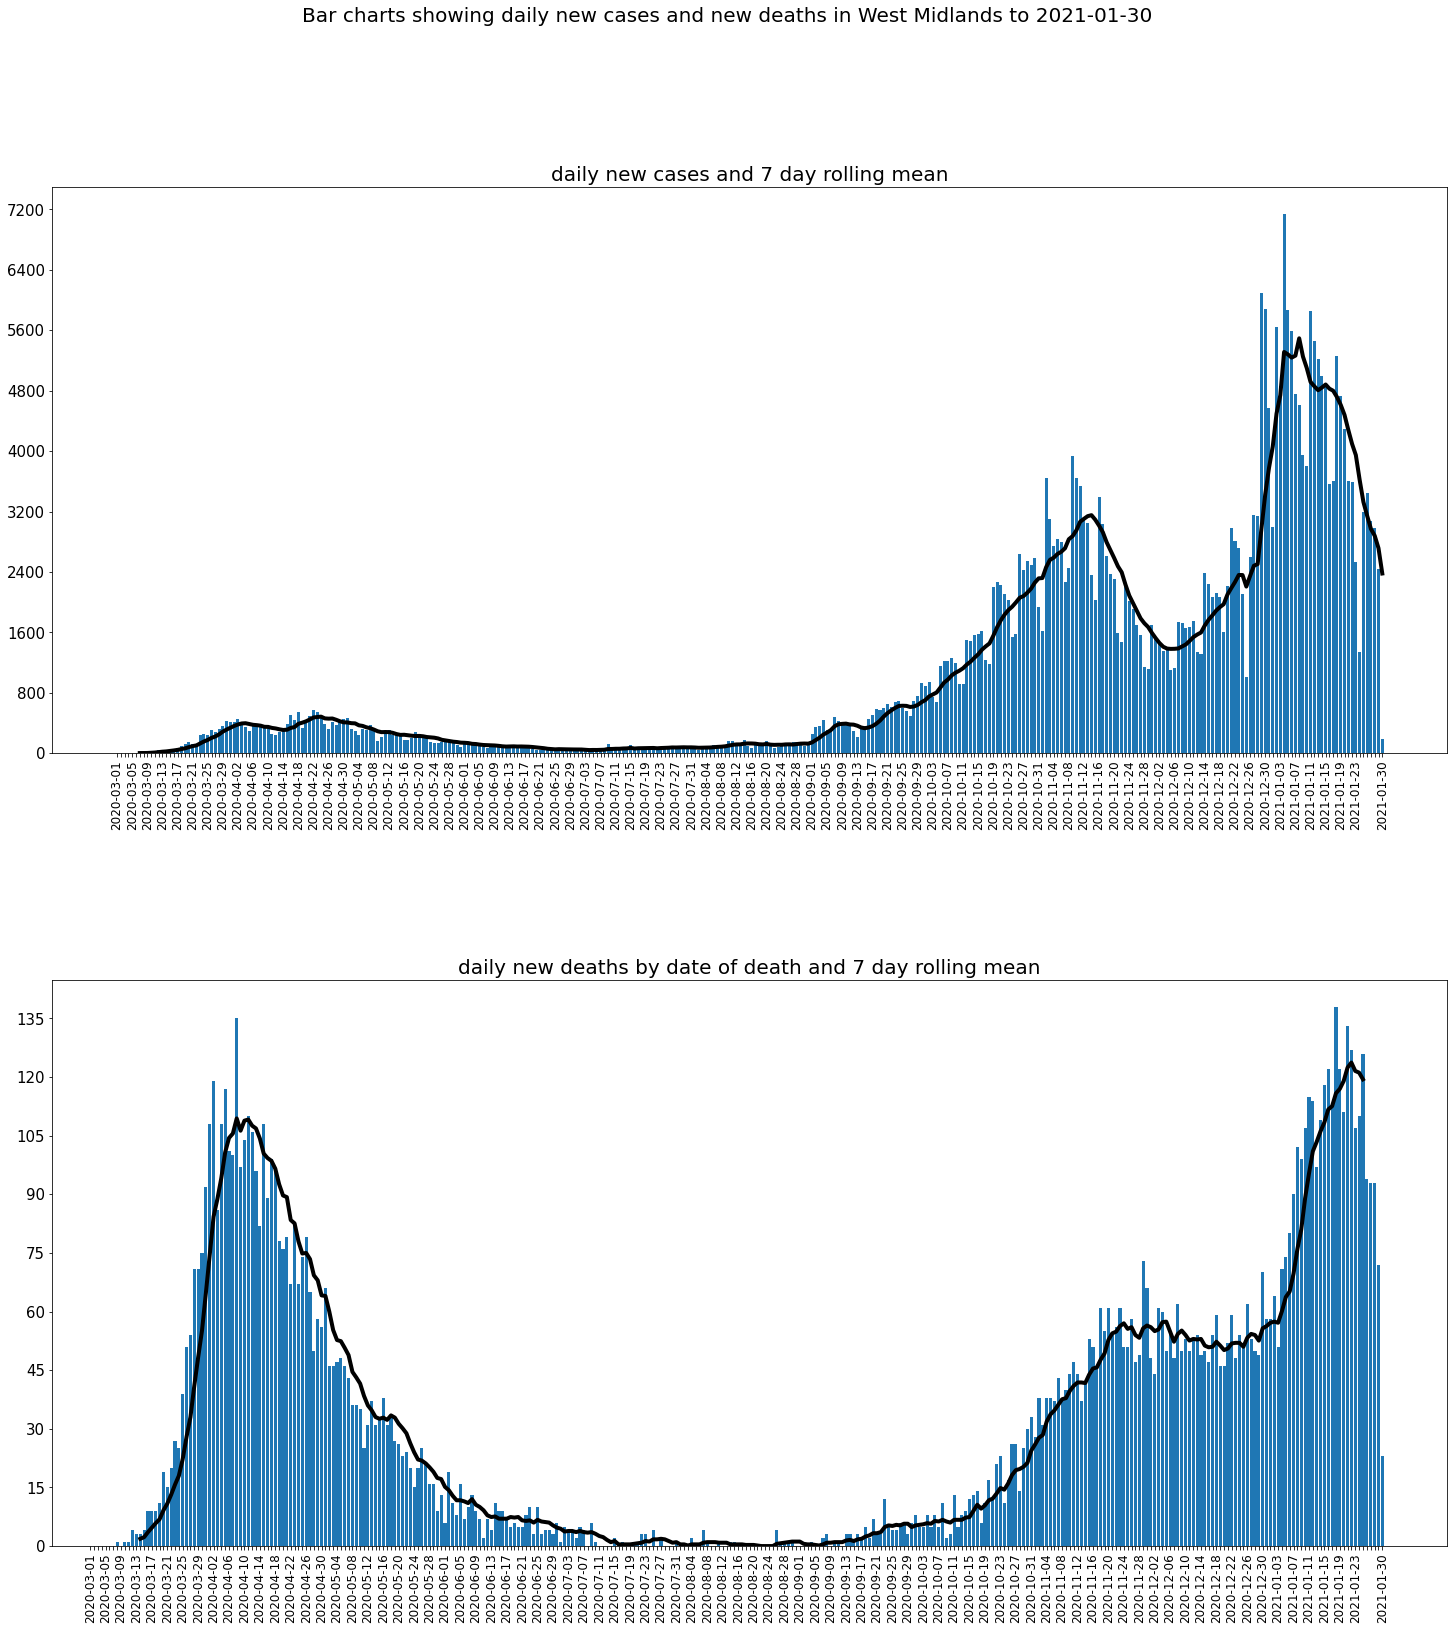

In [153]:
return1, return2, return3 = regional_charts(df_WM, col_names, chart_titles, 'West Midlands')

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

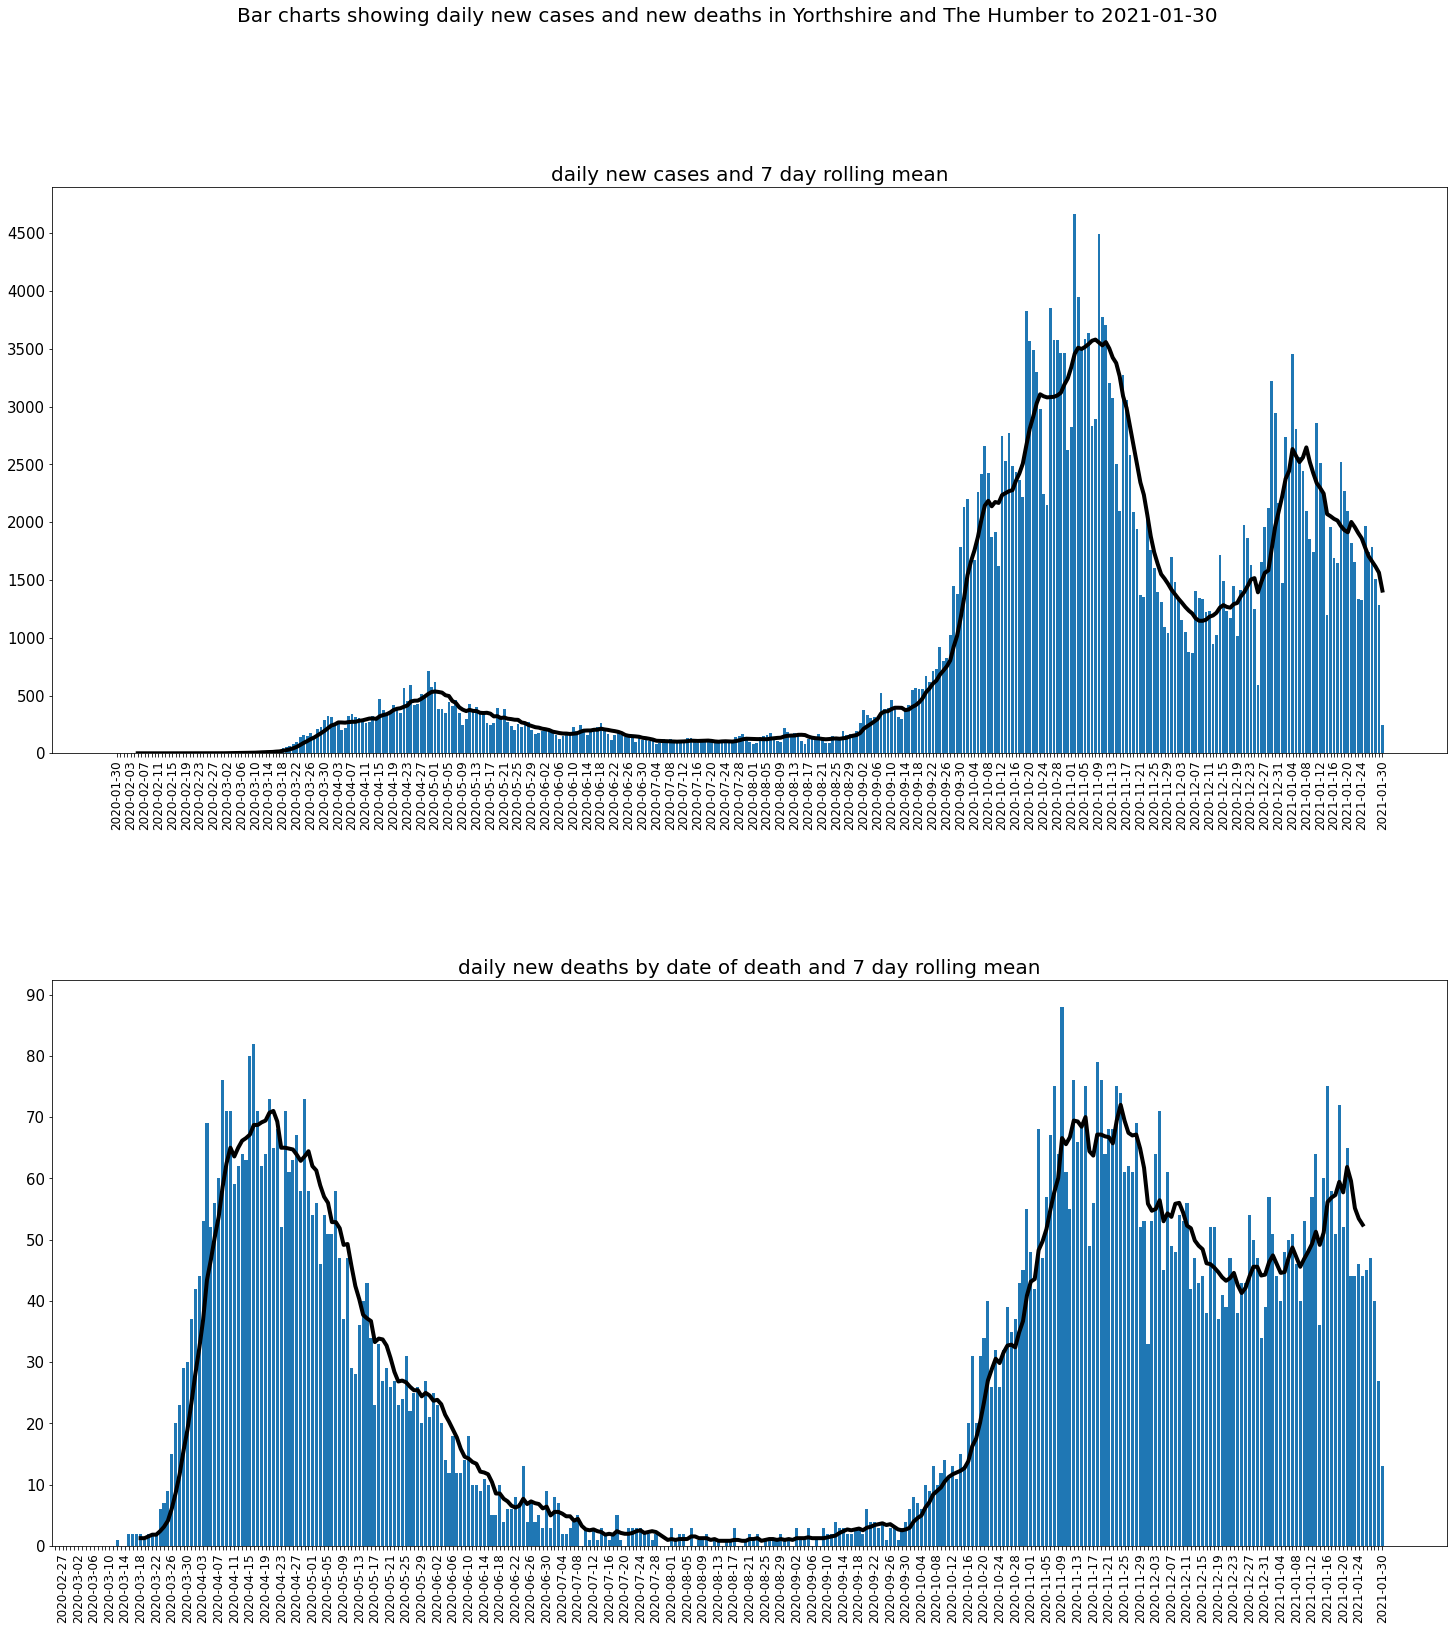

In [154]:
return1, return2, return3 = regional_charts(df_YH, col_names, chart_titles, 'Yorthshire and The Humber')

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [155]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    #plt.savefig('Auto Trader - bar chart of Lookers cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('Data for the UK by Age (Deaths is always a couple of weeks old): Cases and Deaths')
    slideText.append('')
    imagePath.append('')

plt.show()

In [156]:
df_casesAge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 9 columns):
date           7986 non-null object
areaType       7986 non-null object
areaCode       7986 non-null object
areaName       7986 non-null object
metric         7986 non-null object
age            7986 non-null object
cases          7986 non-null int64
rollingRate    7623 non-null float64
rollingSum     7986 non-null int64
dtypes: float64(1), int64(2), object(6)
memory usage: 561.6+ KB


In [157]:
df_casesAge.drop_duplicates(inplace=True)
df_casesAge.reset_index(drop=True)

date  areaType   areaCode        areaName  \
0     2020-01-30  overview  K02000001  United Kingdom   
1     2020-01-30  overview  K02000001  United Kingdom   
2     2020-01-30  overview  K02000001  United Kingdom   
3     2020-01-30  overview  K02000001  United Kingdom   
4     2020-01-30  overview  K02000001  United Kingdom   
...          ...       ...        ...             ...   
7981  2021-01-26  overview  K02000001  United Kingdom   
7982  2021-01-26  overview  K02000001  United Kingdom   
7983  2021-01-26  overview  K02000001  United Kingdom   
7984  2021-01-26  overview  K02000001  United Kingdom   
7985  2021-01-26  overview  K02000001  United Kingdom   

                                     metric         age  cases  rollingRate  \
0     newCasesBySpecimenDateAgeDemographics       55_59      0          0.0   
1     newCasesBySpecimenDateAgeDemographics         60+      0          0.0   
2     newCasesBySpecimenDateAgeDemographics  unassigned      0          NaN   
3     newCasesBySpecimenDateAgeDemographics         90+      0          0.0   
4     newCasesBySpecimenDateAgeDemographics       85_89      0          0.0   
...                                     ...         ...    ...          ...   
7981  newCasesBySpecimenDateAgeDemographics  unassigned     23          NaN   
7982  newCasesBySpecimenDateAgeDemographics         60+   4753        206.1   
7983  newCasesBySpecimenDateAgeDemographics       00_59  19559        278.2   
7984  newCasesBySpecimenDateAgeDemographics       55_59   1809        292.4   
7985  newCasesBySpecimenDateAgeDemographics       00_04    692        131.3   

      rollingSum  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
7981         201  
7982       33246  
7983      140936  
7984       12883  
7985        5066  

[7986 rows x 9 columns]

In [158]:
# making the age values the column headers
# make a new dataframe

dates = df_casesAge['date'].tolist()
dates = list(set(dates))

df_casesAge_Summary = pd.DataFrame(dates, columns = ['date'])
df_casesAge_Summary.sort_values('date', inplace = True)
df_casesAge_Summary.reset_index(drop=True, inplace=True)


In [159]:
df_casesAge_Summary.head()

date
0  2020-01-30
1  2020-01-31
2  2020-02-01
3  2020-02-02
4  2020-02-03

In [160]:
# create the column headers and associated case numbers

headers = df_casesAge['age'].unique().tolist()

for i in range(len(headers)):
    listOfValues = df_casesAge[df_casesAge['age'] == headers[i]]['cases'].tolist()
    df_casesAge_Summary[headers[i]] = listOfValues


In [161]:
df_casesAge_Summary.tail(10)

date  55_59   60+  unassigned  90+  85_89  80_84  75_79  70_74  \
353  2021-01-17   1966  4623          18  404    386    484    508    591   
354  2021-01-18   3173  7824          53  809    793    798    846    996   
355  2021-01-19   2649  6906          43  760    777    772    711    870   
356  2021-01-20   2343  6216          37  678    690    660    684    817   
357  2021-01-21   2099  5444          57  525    535    550    602    700   
358  2021-01-22   1961  5122          29  478    512    545    559    666   
359  2021-01-23   1521  3605          12  313    354    363    404    494   
360  2021-01-24   1130  2826          12  238    286    288    314    393   
361  2021-01-25   2020  5280          31  585    565    551    549    689   
362  2021-01-26   1809  4753          23  538    497    535    535    614   

     00_59  65_69  10_14  50_54  45_49  40_44  35_39  30_34  25_29  60_64  \
353  21602    760    743   2278   2046   2166   2385   2646   2633   1490   
354  32917   1258   1172   3556   3332   3302   3616   3840   3729   2324   
355  29078   1138   1092   3081   2853   2796   3181   3644   3420   1878   
356  25572    916    970   2629   2366   2540   2912   3119   2925   1771   
357  23349    924    802   2471   2196   2295   2632   2785   2807   1608   
358  21810    908    779   2227   2056   2191   2435   2674   2478   1454   
359  16281    619    578   1630   1537   1683   1889   1994   1827   1058   
360  12645    494    399   1253   1252   1268   1467   1597   1398    813   
361  21720    899    767   2248   2095   2201   2403   2637   2521   1442   
362  19559    735    720   1900   1892   1963   2192   2376   2285   1299   

     05_09  00_04  15_19  20_24  
353    611    710   1239   2161  
354    987   1020   1807   3330  
355    850    928   1579   2962  
356    767    848   1456   2660  
357    721    785   1295   2404  
358    708    787   1232   2253  
359    520    622    887   1581  
360    397    531    684   1257  
361    677    801   1151   2168  
362    612    692   1042   2053

In [162]:
#df_casesAge_Summary['date'] = df_casesAge_Summary['datetime'].dt.strftime('%d-%m-%Y')

In [163]:
# creat new columns

nursery = ['00_04']
school = ['15_19','10_14','05_09']
university = ['20_24']
working = ['55_59', '50_54','45_49','40_44','35_39','30_34','25_29']
sixties = ['60_64','65_69']
seventies = ['70_74','75_79']
eighties = ['80_84','85_89']
nineties = ['90+']


In [164]:
create_new_columns(df_casesAge_Summary,nursery,'nursery')
create_new_columns(df_casesAge_Summary,school,'school')
create_new_columns(df_casesAge_Summary,university,'university')
create_new_columns(df_casesAge_Summary,working,'working')
create_new_columns(df_casesAge_Summary,sixties,'sixties')
create_new_columns(df_casesAge_Summary,seventies,'seventies')
create_new_columns(df_casesAge_Summary,eighties,'eighties')
create_new_columns(df_casesAge_Summary,nineties,'nineties')


In [165]:
# add rolling 7 day columns

columns_rolling = ['nursery','school','university','working',
                   'sixties','seventies','eighties','nineties']


In [166]:
for i in range(len(columns_rolling)):
    df_casesAge_Summary[columns_rolling[i] + '_roll'] = df_casesAge_Summary[columns_rolling[i]].rolling(7).mean()

In [167]:
df_casesAge_Summary.tail(10)

date  55_59   60+  unassigned  90+  85_89  80_84  75_79  70_74  \
353  2021-01-17   1966  4623          18  404    386    484    508    591   
354  2021-01-18   3173  7824          53  809    793    798    846    996   
355  2021-01-19   2649  6906          43  760    777    772    711    870   
356  2021-01-20   2343  6216          37  678    690    660    684    817   
357  2021-01-21   2099  5444          57  525    535    550    602    700   
358  2021-01-22   1961  5122          29  478    512    545    559    666   
359  2021-01-23   1521  3605          12  313    354    363    404    494   
360  2021-01-24   1130  2826          12  238    286    288    314    393   
361  2021-01-25   2020  5280          31  585    565    551    549    689   
362  2021-01-26   1809  4753          23  538    497    535    535    614   

     00_59  65_69  10_14  50_54  45_49  40_44  35_39  30_34  25_29  60_64  \
353  21602    760    743   2278   2046   2166   2385   2646   2633   1490   
354  32917   1258   1172   3556   3332   3302   3616   3840   3729   2324   
355  29078   1138   1092   3081   2853   2796   3181   3644   3420   1878   
356  25572    916    970   2629   2366   2540   2912   3119   2925   1771   
357  23349    924    802   2471   2196   2295   2632   2785   2807   1608   
358  21810    908    779   2227   2056   2191   2435   2674   2478   1454   
359  16281    619    578   1630   1537   1683   1889   1994   1827   1058   
360  12645    494    399   1253   1252   1268   1467   1597   1398    813   
361  21720    899    767   2248   2095   2201   2403   2637   2521   1442   
362  19559    735    720   1900   1892   1963   2192   2376   2285   1299   

     05_09  00_04  15_19  20_24  nursery  school  university  working  \
353    611    710   1239   2161      710    2593        2161    16120   
354    987   1020   1807   3330     1020    3966        3330    24548   
355    850    928   1579   2962      928    3521        2962    21624   
356    767    848   1456   2660      848    3193        2660    18834   
357    721    785   1295   2404      785    2818        2404    17285   
358    708    787   1232   2253      787    2719        2253    16022   
359    520    622    887   1581      622    1985        1581    12081   
360    397    531    684   1257      531    1480        1257     9365   
361    677    801   1151   2168      801    2595        2168    16125   
362    612    692   1042   2053      692    2374        2053    14417   

     sixties  seventies  eighties  nineties  nursery_roll  school_roll  \
353     2250       1099       870       404    907.285714  3719.000000   
354     3582       1842      1591       809    897.857143  3587.428571   
355     3016       1581      1549       760    890.285714  3493.000000   
356     2687       1501      1350       678    877.142857  3362.142857   
357     2532       1302      1085       525    857.142857  3233.000000   
358     2362       1225      1057       478    834.000000  3090.428571   
359     1677        898       717       313    814.285714  2970.714286   
360     1307        707       574       238    788.714286  2811.714286   
361     2341       1238      1116       585    757.428571  2615.857143   
362     2034       1149      1032       538    723.714286  2452.000000   

     university_roll  working_roll  sixties_roll  seventies_roll  \
353      3299.285714  22966.000000   3282.428571     1739.428571   
354      3122.714286  21995.142857   3144.142857     1656.285714   
355      2979.285714  21278.428571   3017.142857     1581.714286   
356      2851.142857  20415.571429   2915.714286     1525.285714   
357      2701.857143  19593.000000   2802.000000     1465.000000   
358      2577.000000  18758.000000   2680.285714     1399.285714   
359      2478.714286  18073.428571   2586.571429     1349.714286   
360      2349.571429  17108.428571   2451.857143     1293.714286   
361      2183.571429  15905.142857   2274.571429     1207.428571   
362      2053.71

In [168]:
columns = ['nursery_roll', 'school_roll', 'university_roll', 'working_roll', 
           'sixties_roll', 'seventies_roll', 'eighties_roll', 'nineties_roll']
chart_titles = ['nursery', 'school', 'university', 'working', 
                'sixties', 'seventies', 'eighties', 'nineties']

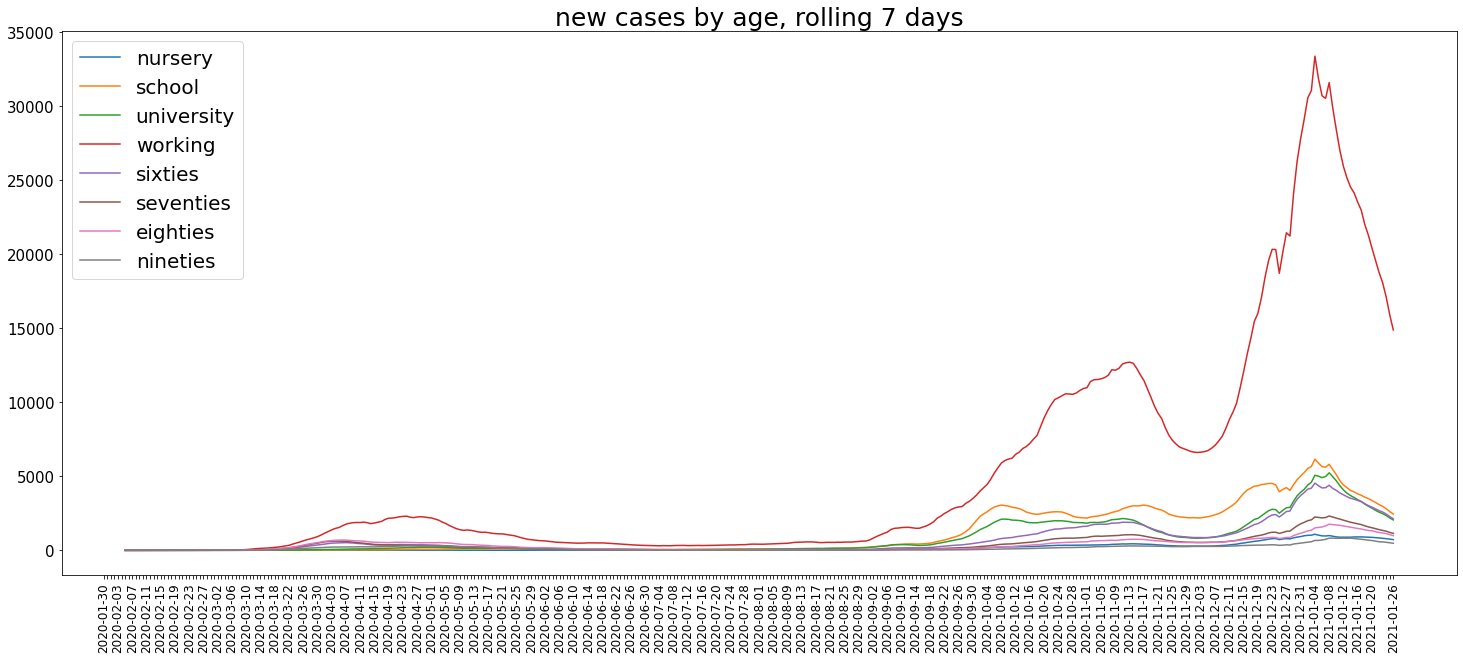

In [169]:
return1, return2, return3 = multiple_line_charts(df_casesAge_Summary, columns, chart_titles, 'new cases by age, rolling 7 days')

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [170]:
columns = ['nursery_roll', 'school_roll', 'university_roll', 
           'sixties_roll', 'seventies_roll', 'eighties_roll', 'nineties_roll']
chart_titles = ['nursery', 'school', 'university', 
                'sixties', 'seventies', 'eighties', 'nineties']

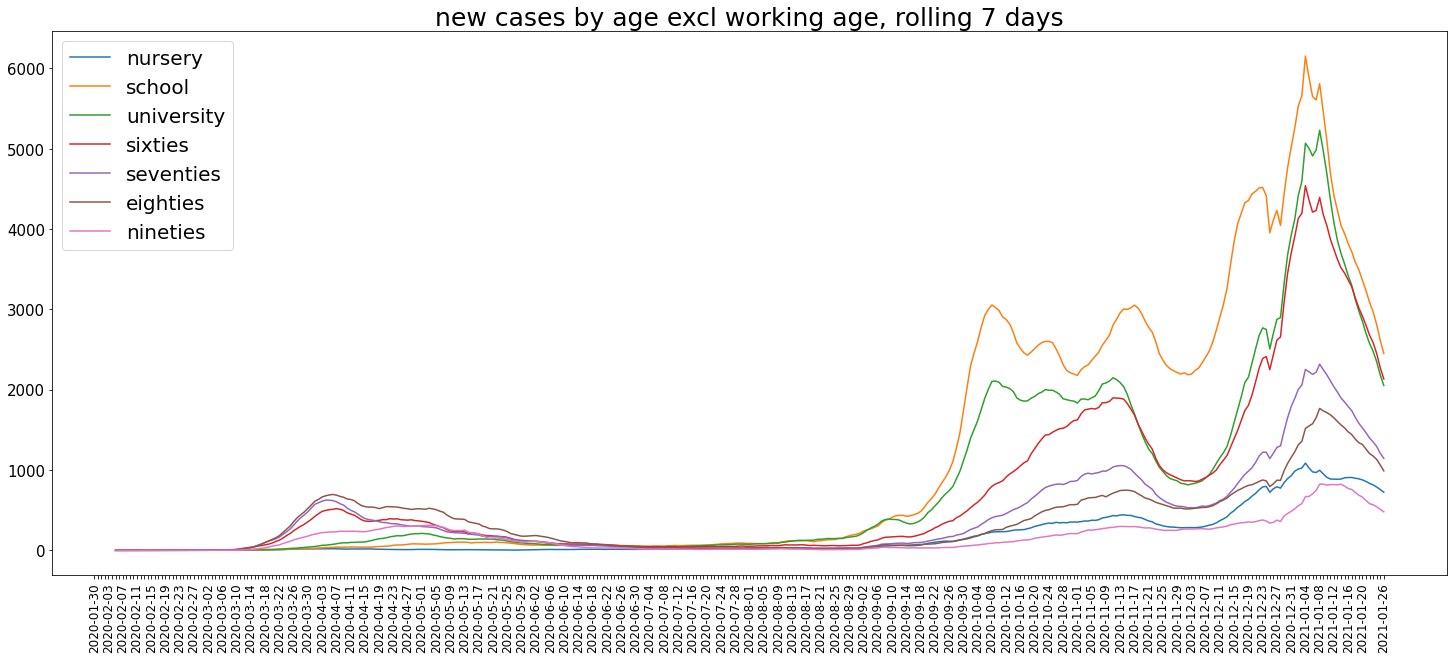

In [171]:
return1, return2, return3 = multiple_line_charts(df_casesAge_Summary, columns, chart_titles, 'new cases by age excl working age, rolling 7 days')

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [172]:
# looking at deaths by ages

df_deathsAges.head()

age  2020-01-03  2020-01-10  2020-01-17  2020-01-24  2020-01-31  \
0     <1         0.0         0.0         0.0         0.0         0.0   
1    1-4         0.0         0.0         0.0         0.0         0.0   
2    5-9         0.0         0.0         0.0         0.0         0.0   
3  10-14         0.0         0.0         0.0         0.0         0.0   
4  15-19         0.0         0.0         0.0         0.0         0.0   

   2020-02-07  2020-02-14  2020-02-21  2020-02-28  2020-03-06  2020-03-13  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   2020-03-20  2020-03-27  2020-04-03  2020-04-10  2020-04-17  2020-04-24  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         1.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         1.0         0.0         0.0   
4         0.0         2.0         3.0         1.0         2.0         0.0   

   2020-05-01  2020-05-08  2020-05-15  2020-05-22  2020-05-29  2020-06-05  \
0         0.0         1.0         1.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         1.0         0.0         1.0   
4         0.0         0.0         1.0         0.0         0.0         0.0   

   2020-06-12  2020-06-19  2020-06-26  2020-07-03  2020-07-10  2020-07-17  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   2020-07-24  2020-07-31  2020-08-07  2020-08-14  2020-08-21  2020-08-28  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   2020-09-04  2020-09-11  2020-09-18  2020-09-25  2020-10-02  2020-10-09  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   2020-10-16  2020-10-23  2020-10-30  2020-11-06  2020-11-13  2020-11-20  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         1.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         1.0   

   2020-11-27  2020-12-04  2020-12-11  2020-12-18  2020-12-25  2021-01-01  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         2.0   
3         1.0         0

In [173]:
df_deathsAges.set_index('age', inplace=True)
df_deathsAges = df_deathsAges.T
df_deathsAges.reset_index(inplace=True)
df_deathsAges.rename(columns={"index": "date"}, inplace=True)
df_deathsAges.columns.name=''

In [174]:
df_deathsAges.head()

date   <1  1-4  5-9  10-14  15-19  20-24  25-29  30-34  35-39  40-44  \
0  2020-01-03  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1  2020-01-10  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2  2020-01-17  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3  2020-01-24  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4  2020-01-31  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   45-49  50-54  55-59  60-64  65-69  70-74  75-79  80-84  85-89  90+  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0  0.0

In [175]:
df_deathsAges.tail()

date   <1  1-4  5-9  10-14  15-19  20-24  25-29  30-34  35-39  \
50  2020-12-18  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    4.0   
51  2020-12-25  0.0  0.0  0.0    0.0    0.0    0.0    4.0    6.0    3.0   
52  2021-01-01  0.0  0.0  2.0    0.0    0.0    1.0    5.0    9.0   14.0   
53  2021-01-08  0.0  0.0  0.0    0.0    2.0    3.0    7.0   10.0   21.0   
54  2021-01-15  0.0  0.0  0.0    0.0    1.0    2.0    2.0    7.0   22.0   

    40-44  45-49  50-54  55-59  60-64  65-69  70-74  75-79   80-84   85-89  \
50   11.0   22.0   44.0   80.0  108.0  173.0  287.0  414.0   627.0   681.0   
51   13.0   30.0   62.0   92.0  134.0  218.0  384.0  484.0   689.0   782.0   
52   19.0   42.0   77.0  131.0  223.0  264.0  447.0  640.0   871.0   964.0   
53   24.0   57.0  114.0  176.0  266.0  348.0  575.0  719.0  1064.0  1132.0   
54   31.0   69.0  105.0  177.0  282.0  397.0  613.0  885.0  1150.0  1295.0   

       90+  
50   762.0  
51   839.0  
52   988.0  
53  1224.0  
54  1550.0

In [176]:
last_date = df_deathsAges['date'].iloc[-1]

In [177]:
nursery = ['<1', '1-4']
school = ['15-19','10-14','5-9']
university = ['20-24']
working = ['55-59', '50-54','45-49','40-44','35-39','30-34','25-29']
sixties = ['60-64','65-69']
seventies = ['70-74','75-79']
eighties = ['80-84','85-89']
nineties = ['90+']

In [178]:
create_new_columns(df_deathsAges,nursery,'nursery')
create_new_columns(df_deathsAges,school,'school')
create_new_columns(df_deathsAges,university,'university')
create_new_columns(df_deathsAges,working,'working')
create_new_columns(df_deathsAges,sixties,'sixties')
create_new_columns(df_deathsAges,seventies,'seventies')
create_new_columns(df_deathsAges,eighties,'eighties')
create_new_columns(df_deathsAges,nineties,'nineties')

In [179]:
columns = ['nursery','school','university','working',
           'sixties','seventies','eighties','nineties']
chart_titles = ['nursery', 'school', 'university', 'working', 
                'sixties', 'seventies', 'eighties', 'nineties']

In [180]:
return3 = 'new deaths by age, weekly to 2020-12-11'

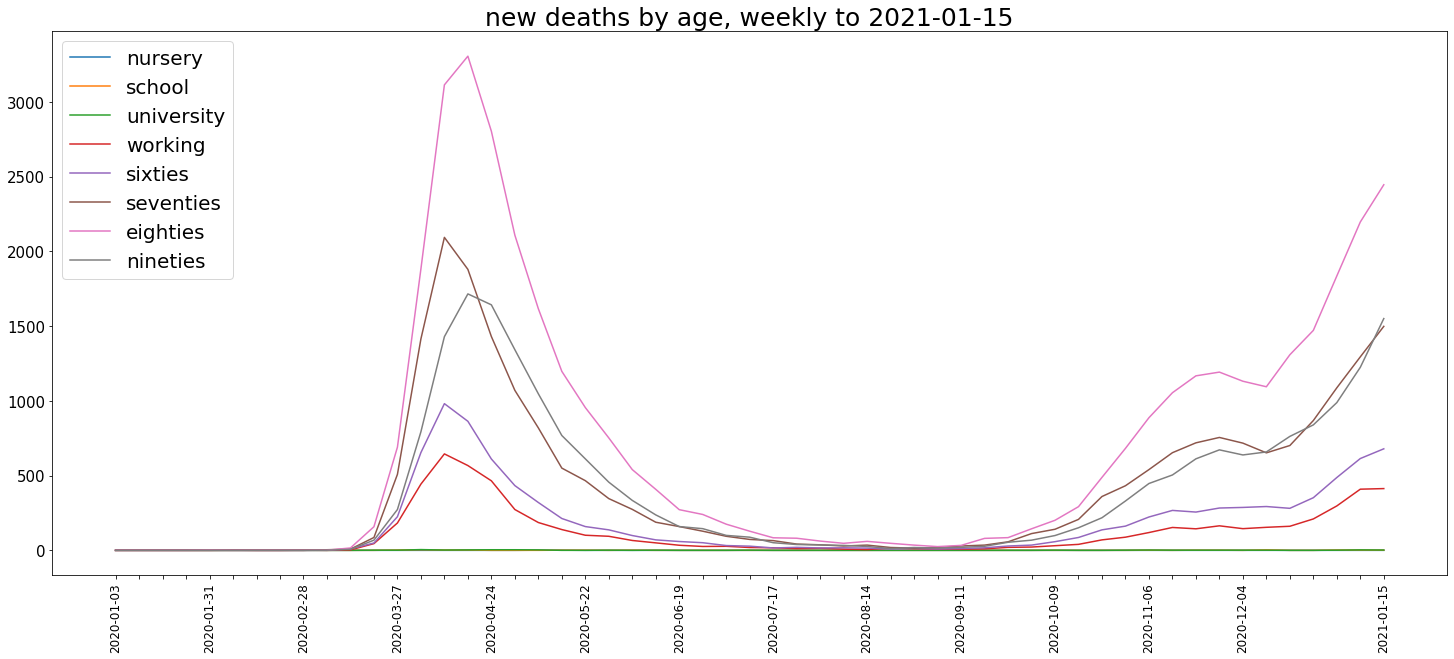

In [181]:
return1, return2, return3 = multiple_line_charts(df_deathsAges, columns, chart_titles, 'new deaths by age, weekly to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [182]:
columns = ['nursery','school','university','working',
           'sixties']
chart_titles = ['nursery', 'school', 'university', 'working', 
                'sixties']

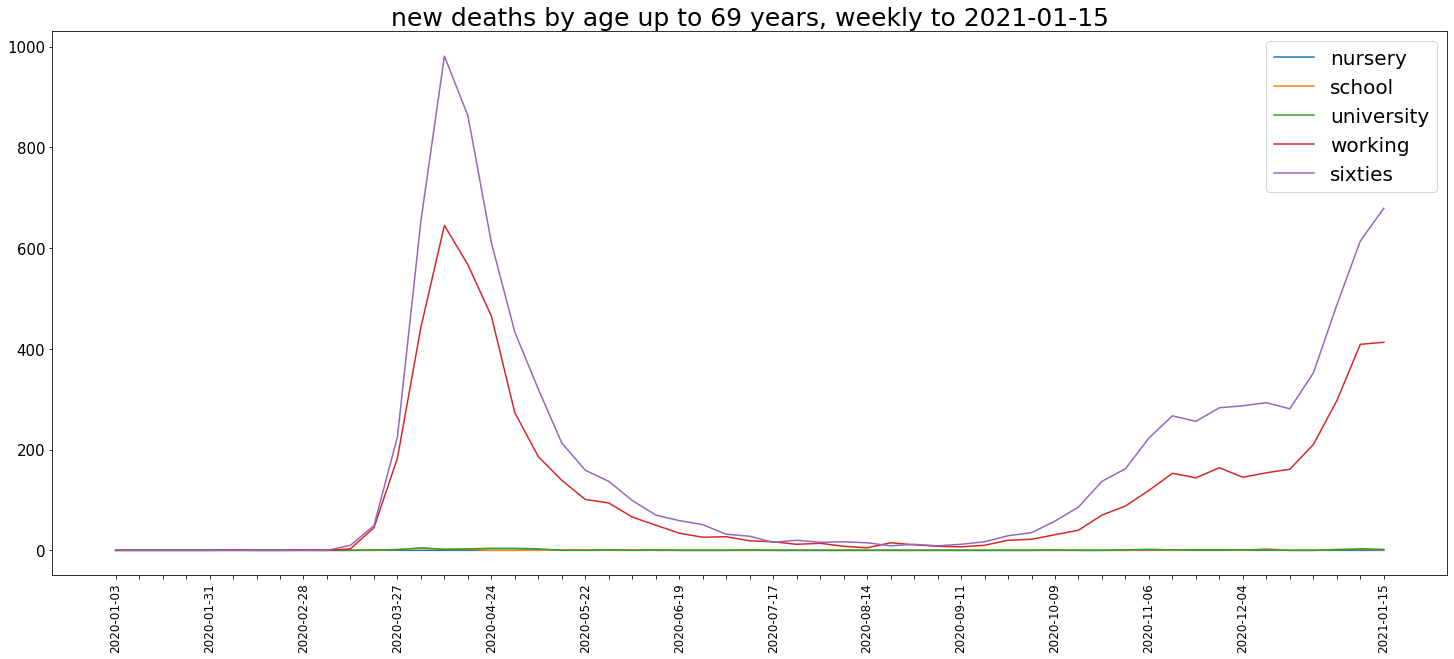

In [183]:
return1, return2, return3 = multiple_line_charts(df_deathsAges, columns, chart_titles, 'new deaths by age up to 69 years, weekly to ' + last_date)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [184]:
# cumulative deaths

columns = ['nursery','school','university','working',
           'sixties','seventies','eighties','nineties']

for i in range(len(columns)):
    df_deathsAges[columns[i] + '_cum'] = df_deathsAges[columns[i]].cumsum()

In [185]:
columns = ['nursery_cum','school_cum','university_cum','working_cum',
           'sixties_cum','seventies_cum','eighties_cum','nineties_cum']
chart_titles = ['nursery', 'school', 'university', 'working', 
                'sixties', 'seventies', 'eighties', 'nineties']

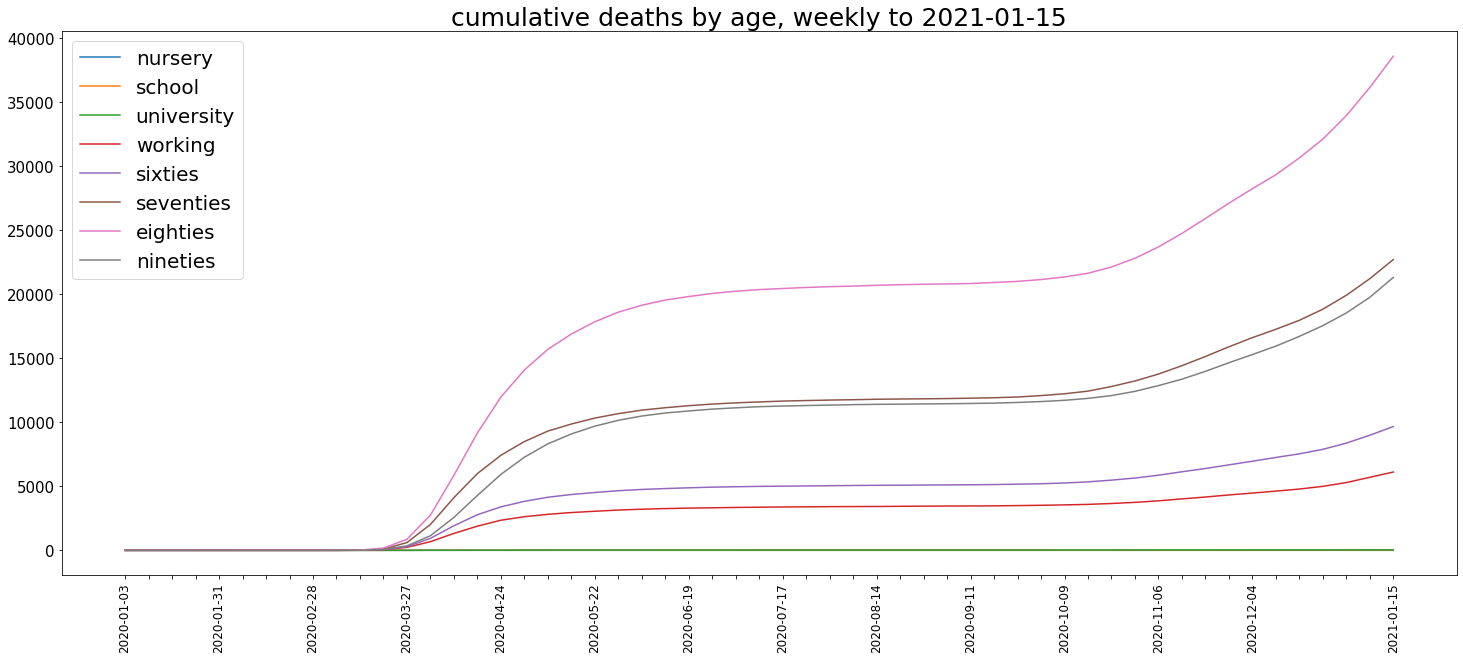

In [186]:
return1, return2, return3 = multiple_line_charts(df_deathsAges, columns, chart_titles, 'cumulative deaths by age, weekly to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [187]:
columns = ['nursery_cum','school_cum','university_cum','working_cum',
           'sixties_cum']
chart_titles = ['nursery', 'school', 'university', 'working', 
                'sixties']

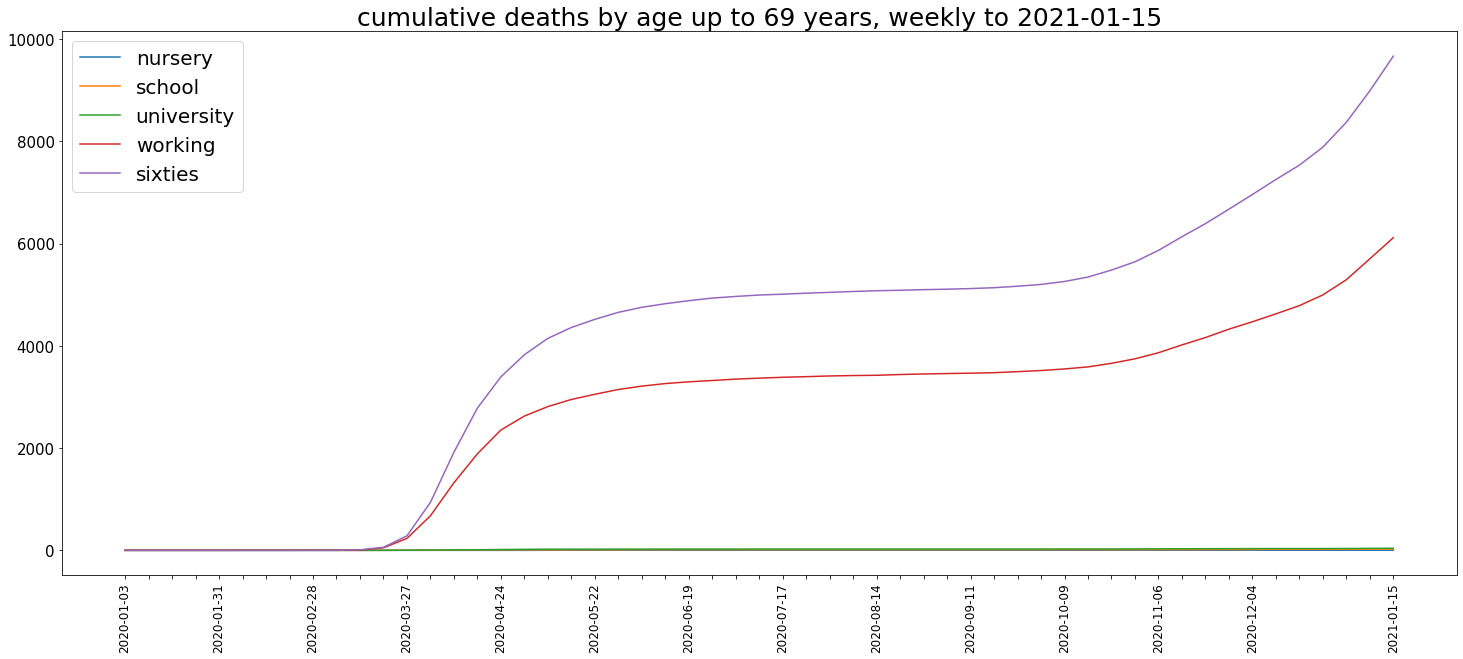

In [188]:
return1, return2, return3 = multiple_line_charts(df_deathsAges, columns, chart_titles, 'cumulative deaths by age up to 69 years, weekly to ' + last_date)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [189]:
columns = ['nursery_cum','school_cum','university_cum']
chart_titles = ['nursery', 'school', 'university']

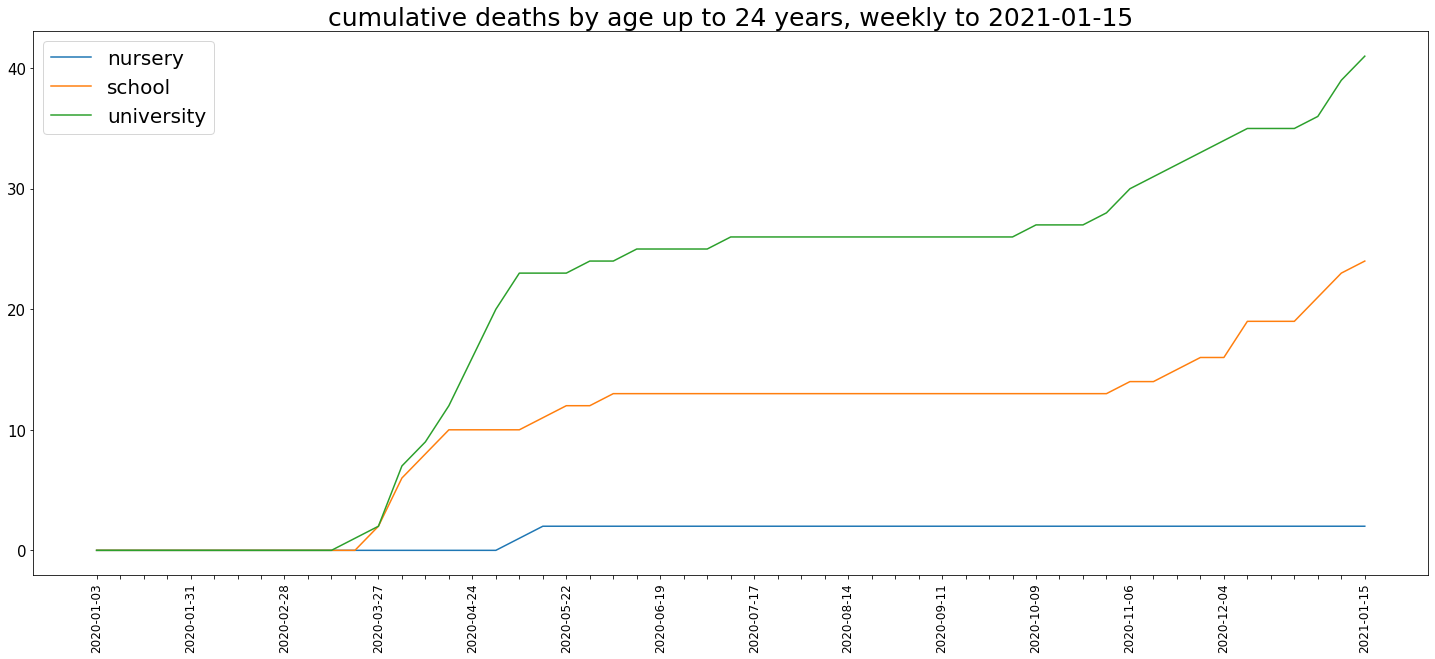

In [190]:
return1, return2, return3 = multiple_line_charts(df_deathsAges, columns, chart_titles, 'cumulative deaths by age up to 24 years, weekly to ' + last_date)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [191]:
df_deathsAges.tail()

date   <1  1-4  5-9  10-14  15-19  20-24  25-29  30-34  35-39  \
50  2020-12-18  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    4.0   
51  2020-12-25  0.0  0.0  0.0    0.0    0.0    0.0    4.0    6.0    3.0   
52  2021-01-01  0.0  0.0  2.0    0.0    0.0    1.0    5.0    9.0   14.0   
53  2021-01-08  0.0  0.0  0.0    0.0    2.0    3.0    7.0   10.0   21.0   
54  2021-01-15  0.0  0.0  0.0    0.0    1.0    2.0    2.0    7.0   22.0   

    40-44  45-49  50-54  55-59  60-64  65-69  70-74  75-79   80-84   85-89  \
50   11.0   22.0   44.0   80.0  108.0  173.0  287.0  414.0   627.0   681.0   
51   13.0   30.0   62.0   92.0  134.0  218.0  384.0  484.0   689.0   782.0   
52   19.0   42.0   77.0  131.0  223.0  264.0  447.0  640.0   871.0   964.0   
53   24.0   57.0  114.0  176.0  266.0  348.0  575.0  719.0  1064.0  1132.0   
54   31.0   69.0  105.0  177.0  282.0  397.0  613.0  885.0  1150.0  1295.0   

       90+  nursery  school  university  working  sixties  seventies  \
50   762.0      0.0     0.0         0.0    161.0    281.0      701.0   
51   839.0      0.0     0.0         0.0    210.0    352.0      868.0   
52   988.0      0.0     2.0         1.0    297.0    487.0     1087.0   
53  1224.0      0.0     2.0         3.0    409.0    614.0     1294.0   
54  1550.0      0.0     1.0         2.0    413.0    679.0     1498.0   

    eighties  nineties  nursery_cum  school_cum  university_cum  working_cum  \
50    1308.0     762.0          2.0        19.0            35.0       4786.0   
51    1471.0     839.0          2.0        19.0            35.0       4996.0   
52    1835.0     988.0          2.0        21.0            36.0       5293.0   
53    2196.0    1224.0          2.0        23.0            39.0       5702.0   
54    2445.0    1550.0          2.0        24.0            41.0       6115.0   

    sixties_cum  seventies_cum  eighties_cum  nineties_cum  
50       7534.0        17961.0       30639.0       16707.0  
51       7886.0        18829.0       32110.0       17546.0  
52       8373.0        19916.0       33945.0       18534.0  
53       8987.0        21210.0       36141.0       19758.0  
54       9666.0        22708.0       38586.0       21308.0

In [192]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    #plt.savefig('Auto Trader - bar chart of Lookers cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('Data looking at all deaths and covid deaths by age (always a couple of weeks behind)')
    slideText.append('')
    imagePath.append('')

plt.show()

In [193]:
df_deathsAges_all.head()

age  2020-01-03  2020-01-10  2020-01-17  2020-01-24  2020-01-31  \
0     <1        48.0        50.0        69.0        53.0        50.0   
1    1-4         8.0         9.0         7.0         9.0         6.0   
2    5-9         4.0         8.0         5.0         4.0         5.0   
3  10-14         4.0         9.0         4.0         8.0         4.0   
4  15-19         6.0        16.0        10.0        15.0        23.0   

   2020-02-07  2020-02-14  2020-02-21  2020-02-28  2020-03-06  2020-03-13  \
0        30.0        43.0        51.0        49.0        56.0        53.0   
1         8.0         6.0         5.0         7.0        11.0        13.0   
2         4.0         2.0         6.0         6.0         2.0         3.0   
3         4.0         4.0         7.0         7.0         7.0         6.0   
4        10.0        16.0        20.0        24.0        21.0        18.0   

   2020-03-20  2020-03-27  2020-04-03  2020-04-10  2020-04-17  2020-04-24  \
0        44.0        49.0        51.0        38.0        51.0        54.0   
1         2.0         8.0         8.0         6.0         6.0         6.0   
2         6.0         1.0         5.0         4.0         5.0         3.0   
3         4.0         4.0         8.0         4.0         4.0         3.0   
4        15.0        12.0         9.0         8.0        20.0        11.0   

   2020-05-01  2020-05-08  2020-05-15  2020-05-22  2020-05-29  2020-06-05  \
0        48.0        28.0        56.0        51.0        40.0        44.0   
1         8.0         6.0        10.0         4.0         6.0         4.0   
2         0.0         4.0         5.0         5.0         3.0         4.0   
3         3.0        10.0         4.0         7.0         5.0         8.0   
4        14.0         9.0        13.0        13.0         7.0        10.0   

   2020-06-12  2020-06-19  2020-06-26  2020-07-03  2020-07-10  2020-07-17  \
0        44.0        48.0        47.0        47.0        58.0        35.0   
1         4.0        10.0         4.0         7.0         3.0         6.0   
2         2.0         5.0         4.0         2.0         2.0         4.0   
3         5.0         4.0         3.0         4.0         5.0         0.0   
4        10.0         9.0         2.0        14.0        11.0        10.0   

   2020-07-24  2020-07-31  2020-08-07  2020-08-14  2020-08-21  2020-08-28  \
0        49.0        45.0        44.0        50.0        49.0        38.0   
1         3.0        11.0         4.0         5.0         7.0         5.0   
2         5.0         5.0         5.0         2.0         4.0         7.0   
3         4.0         3.0         6.0         8.0         5.0         6.0   
4         9.0        12.0        13.0        12.0        14.0        14.0   

   2020-09-04  2020-09-11  2020-09-18  2020-09-25  2020-10-02  2020-10-09  \
0        29.0        39.0        36.0        45.0        47.0        45.0   
1         3.0         6.0         4.0         7.0         3.0         6.0   
2         2.0         5.0         4.0         3.0         3.0         5.0   
3         5.0         3.0         7.0         7.0        10.0         6.0   
4         7.0        15.0        15.0        13.0        12.0        12.0   

   2020-10-16  2020-10-23  2020-10-30  2020-11-06  2020-11-13  2020-11-20  \
0        41.0        34.0        31.0        43.0        45.0        54.0   
1         6.0         2.0         6.0         6.0         8.0        11.0   
2         4.0         7.0         2.0         2.0         7.0         6.0   
3         3.0         5.0         5.0         4.0         3.0         4.0   
4        15.0        14.0        15.0        12.0         7.0        17.0   

   2020-11-27  2020-12-04  2020-12-11  2020-12-18  2020-12-25  2021-01-01  \
0        44.0        50.0        45.0        46.0        33.0        32.0   
1         7.0         4.0         3.0         5.0         7.0         4.0   
2         5.0         3.0        11.0         4.0         5.0         1.0   
3         5.0         8

In [194]:
df_deathsAges_all.set_index('age', inplace=True)
df_deathsAges_all = df_deathsAges_all.T
df_deathsAges_all.reset_index(inplace=True)
df_deathsAges_all.rename(columns={"index": "date"}, inplace=True)
df_deathsAges_all.columns.name=''

In [195]:
nursery = ['<1', '1-4']
school = ['15-19','10-14','5-9']
university = ['20-24']
working = ['55-59', '50-54','45-49','40-44','35-39','30-34','25-29']
sixties = ['60-64','65-69']
seventies = ['70-74','75-79']
eighties = ['80-84','85-89']
nineties = ['90+']

In [196]:
create_new_columns(df_deathsAges_all,nursery,'nursery')
create_new_columns(df_deathsAges_all,school,'school')
create_new_columns(df_deathsAges_all,university,'university')
create_new_columns(df_deathsAges_all,working,'working')
create_new_columns(df_deathsAges_all,sixties,'sixties')
create_new_columns(df_deathsAges_all,seventies,'seventies')
create_new_columns(df_deathsAges_all,eighties,'eighties')
create_new_columns(df_deathsAges_all,nineties,'nineties')

In [197]:
# cumulative deaths

columns = ['nursery','school','university','working',
           'sixties','seventies','eighties','nineties']

for i in range(len(columns)):
    df_deathsAges_all[columns[i] + '_cum'] = df_deathsAges_all[columns[i]].cumsum()

In [198]:
df_deathsAges_all.columns += '_all'
df_deathsAges_all.columns.values[0] = 'date'

In [199]:
df_deathsAges_all.head()

date  <1_all  1-4_all  5-9_all  10-14_all  15-19_all  20-24_all  \
0  2020-01-03    48.0      8.0      4.0        4.0        6.0       11.0   
1  2020-01-10    50.0      9.0      8.0        9.0       16.0       23.0   
2  2020-01-17    69.0      7.0      5.0        4.0       10.0       25.0   
3  2020-01-24    53.0      9.0      4.0        8.0       15.0       30.0   
4  2020-01-31    50.0      6.0      5.0        4.0       23.0       23.0   

   25-29_all  30-34_all  35-39_all  40-44_all  45-49_all  50-54_all  \
0       17.0       32.0       54.0       69.0      115.0      239.0   
1       37.0       46.0       68.0       85.0      191.0      279.0   
2       37.0       47.0       77.0      118.0      189.0      306.0   
3       36.0       38.0       79.0      116.0      160.0      280.0   
4       28.0       58.0       76.0      100.0      163.0      278.0   

   55-59_all  60-64_all  65-69_all  70-74_all  75-79_all  80-84_all  \
0      361.0      486.0      696.0     1164.0     1535.0     2049.0   
1      426.0      604.0      857.0     1341.0     1724.0     2290.0   
2      461.0      562.0      803.0     1210.0     1612.0     2103.0   
3      381.0      535.0      791.0     1167.0     1474.0     1863.0   
4      382.0      525.0      732.0     1196.0     1445.0     1811.0   

   85-89_all  90+_all  nursery_all  school_all  university_all  working_all  \
0     2457.0   2898.0         56.0        14.0            11.0        887.0   
1     2697.0   3297.0         59.0        33.0            23.0       1132.0   
2     2421.0   2924.0         76.0        19.0            25.0       1235.0   
3     2188.0   2626.0         62.0        27.0            30.0       1090.0   
4     2124.0   2583.0         56.0        32.0            23.0       1085.0   

   sixties_all  seventies_all  eighties_all  nineties_all  nursery_cum_all  \
0       1182.0         2699.0        4506.0        2898.0             56.0   
1       1461.0         3065.0        4987.0        3297.0            115.0   
2       1365.0         2822.0        4524.0        2924.0            191.0   
3       1326.0         2641.0        4051.0        2626.0            253.0   
4       1257.0         2641.0        3935.0        2583.0            309.0   

   school_cum_all  university_cum_all  working_cum_all  sixties_cum_all  \
0            14.0                11.0            887.0           1182.0   
1            47.0                34.0           2019.0           2643.0   
2            66.0                59.0           3254.0           4008.0   
3            93.0                89.0           4344.0           5334.0   
4           125.0               112.0           5429.0           6591.0   

   seventies_cum_all  eighties_cum_all  nineties_cum_all  
0             2699.0            4506.0            2898.0  
1             5764.0            9493.0            6195.0  
2             8586.0           14017.0            9119.0  
3            11227.0           18068.0           11745.0  
4            13868.0           22003.0           14328.0

In [200]:
df_deathsAges.head()

date   <1  1-4  5-9  10-14  15-19  20-24  25-29  30-34  35-39  40-44  \
0  2020-01-03  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1  2020-01-10  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2  2020-01-17  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3  2020-01-24  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4  2020-01-31  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   45-49  50-54  55-59  60-64  65-69  70-74  75-79  80-84  85-89  90+  \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0  0.0   

   nursery  school  university  working  sixties  seventies  eighties  \
0      0.0     0.0         0.0      0.0      0.0        0.0       0.0   
1      0.0     0.0         0.0      0.0      0.0        0.0       0.0   
2      0.0     0.0         0.0      0.0      0.0        0.0       0.0   
3      0.0     0.0         0.0      0.0      0.0        0.0       0.0   
4      0.0     0.0         0.0      0.0      0.0        0.0       1.0   

   nineties  nursery_cum  school_cum  university_cum  working_cum  \
0       0.0          0.0         0.0             0.0          0.0   
1       0.0          0.0         0.0             0.0          0.0   
2       0.0          0.0         0.0             0.0          0.0   
3       0.0          0.0         0.0             0.0          0.0   
4       0.0          0.0         0.0             0.0          0.0   

   sixties_cum  seventies_cum  eighties_cum  nineties_cum  
0          0.0            0.0           0.0           0.0  
1          0.0            0.0           0.0           0.0  
2          0.0            0.0           0.0           0.0  
3          0.0            0.0           0.0           0.0  
4          0.0            0.0           1.0           0.0

In [201]:
df_deaths_comp = pd.merge(df_deathsAges, df_deathsAges_all, left_on='date', right_on='date', how='left')

In [202]:
df_deaths_comp.tail()

date   <1  1-4  5-9  10-14  15-19  20-24  25-29  30-34  35-39  \
50  2020-12-18  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    4.0   
51  2020-12-25  0.0  0.0  0.0    0.0    0.0    0.0    4.0    6.0    3.0   
52  2021-01-01  0.0  0.0  2.0    0.0    0.0    1.0    5.0    9.0   14.0   
53  2021-01-08  0.0  0.0  0.0    0.0    2.0    3.0    7.0   10.0   21.0   
54  2021-01-15  0.0  0.0  0.0    0.0    1.0    2.0    2.0    7.0   22.0   

    40-44  45-49  50-54  55-59  60-64  65-69  70-74  75-79   80-84   85-89  \
50   11.0   22.0   44.0   80.0  108.0  173.0  287.0  414.0   627.0   681.0   
51   13.0   30.0   62.0   92.0  134.0  218.0  384.0  484.0   689.0   782.0   
52   19.0   42.0   77.0  131.0  223.0  264.0  447.0  640.0   871.0   964.0   
53   24.0   57.0  114.0  176.0  266.0  348.0  575.0  719.0  1064.0  1132.0   
54   31.0   69.0  105.0  177.0  282.0  397.0  613.0  885.0  1150.0  1295.0   

       90+  nursery  school  university  working  sixties  seventies  \
50   762.0      0.0     0.0         0.0    161.0    281.0      701.0   
51   839.0      0.0     0.0         0.0    210.0    352.0      868.0   
52   988.0      0.0     2.0         1.0    297.0    487.0     1087.0   
53  1224.0      0.0     2.0         3.0    409.0    614.0     1294.0   
54  1550.0      0.0     1.0         2.0    413.0    679.0     1498.0   

    eighties  nineties  nursery_cum  school_cum  university_cum  working_cum  \
50    1308.0     762.0          2.0        19.0            35.0       4786.0   
51    1471.0     839.0          2.0        19.0            35.0       4996.0   
52    1835.0     988.0          2.0        21.0            36.0       5293.0   
53    2196.0    1224.0          2.0        23.0            39.0       5702.0   
54    2445.0    1550.0          2.0        24.0            41.0       6115.0   

    sixties_cum  seventies_cum  eighties_cum  nineties_cum  <1_all  1-4_all  \
50       7534.0        17961.0       30639.0       16707.0    46.0      5.0   
51       7886.0        18829.0       32110.0       17546.0    33.0      7.0   
52       8373.0        19916.0       33945.0       18534.0    32.0      4.0   
53       8987.0        21210.0       36141.0       19758.0    52.0      6.0   
54       9666.0        22708.0       38586.0       21308.0    52.0      3.0   

    5-9_all  10-14_all  15-19_all  20-24_all  25-29_all  30-34_all  35-39_all  \
50      4.0        5.0       11.0       24.0       38.0       57.0       73.0   
51      5.0        6.0       10.0       21.0       35.0       46.0       70.0   
52      1.0        9.0        8.0       10.0       24.0       27.0       43.0   
53      4.0        2.0       15.0       23.0       29.0       57.0       72.0   
54      1.0        5.0       14.0       26.0       37.0       56.0      102.0   

    40-44_all  45-49_all  50-54_all  55-59_all  60-64_all  65-69_all  \
50      115.0      189.0      317.0      437.0      581.0      805.0   
51       99.0      179.0      262.0      359.0      515.0      729.0   
52       68.0      123.0      203.0      311.0      449.0      619.0   
53      107.0      231.0      392.0      547.0      808.0     1097.0   
54      152.0      241.0      419.0      572.0      869.0     1145.0   

    70-74_all  75-79_all  80-84_all  85-89_all  90+_all  nursery_all  \
50     1246.0     1614.0     2124.0     2439.0   2881.0         51.0   
51     1154.0     1436.0     1892.0     2154.0   2508.0         40.0   
52      990.0     1262.0     1651.0     1980.0   2255.0         36.0   
53     1748.0     2284.0     2985.0     3296.0   3996.0         58.0   
54     1799.0     2280.0     3004.0     3278.0   3987.0         55.0   

    school_all  university_all  working_all  sixties_all  seventies_all  \
50        20.0            24.0       1226.0       1386.0         2860.0   
51        21.0            21.0       1050.0       1244.0         2590.0   
52        18.0            10.0        799.0       1068.0         2252.0   
53        21.0            23.0       1435.0     

In [203]:
col_names = ['nursery','school','university','working',
           'sixties','seventies','eighties','nineties']

for i in range(len(col_names)):
    df_deaths_comp[str(col_names[i]) + '_%'] = (df_deaths_comp[str(col_names[i]) + '_cum']
                                                /df_deaths_comp[str(col_names[i]) + '_cum_all'])

In [204]:
col_names = ['nursery','school','university','working',
           'sixties','seventies','eighties','nineties']

col_names_new = [s + '_cum_all' for s in col_names]

In [205]:
df_deaths_comp['total_cum_all'] = df_deaths_comp[col_names_new].sum(axis=1)

In [206]:
col_names = ['nursery','school','university','working',
           'sixties','seventies','eighties','nineties']

col_names_new = [s + '_cum' for s in col_names]

In [207]:
df_deaths_comp['total_cum'] = df_deaths_comp[col_names_new].sum(axis=1)

In [208]:
df_deaths_comp.tail()

date   <1  1-4  5-9  10-14  15-19  20-24  25-29  30-34  35-39  \
50  2020-12-18  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    4.0   
51  2020-12-25  0.0  0.0  0.0    0.0    0.0    0.0    4.0    6.0    3.0   
52  2021-01-01  0.0  0.0  2.0    0.0    0.0    1.0    5.0    9.0   14.0   
53  2021-01-08  0.0  0.0  0.0    0.0    2.0    3.0    7.0   10.0   21.0   
54  2021-01-15  0.0  0.0  0.0    0.0    1.0    2.0    2.0    7.0   22.0   

    40-44  45-49  50-54  55-59  60-64  65-69  70-74  75-79   80-84   85-89  \
50   11.0   22.0   44.0   80.0  108.0  173.0  287.0  414.0   627.0   681.0   
51   13.0   30.0   62.0   92.0  134.0  218.0  384.0  484.0   689.0   782.0   
52   19.0   42.0   77.0  131.0  223.0  264.0  447.0  640.0   871.0   964.0   
53   24.0   57.0  114.0  176.0  266.0  348.0  575.0  719.0  1064.0  1132.0   
54   31.0   69.0  105.0  177.0  282.0  397.0  613.0  885.0  1150.0  1295.0   

       90+  nursery  school  university  working  sixties  seventies  \
50   762.0      0.0     0.0         0.0    161.0    281.0      701.0   
51   839.0      0.0     0.0         0.0    210.0    352.0      868.0   
52   988.0      0.0     2.0         1.0    297.0    487.0     1087.0   
53  1224.0      0.0     2.0         3.0    409.0    614.0     1294.0   
54  1550.0      0.0     1.0         2.0    413.0    679.0     1498.0   

    eighties  nineties  nursery_cum  school_cum  university_cum  working_cum  \
50    1308.0     762.0          2.0        19.0            35.0       4786.0   
51    1471.0     839.0          2.0        19.0            35.0       4996.0   
52    1835.0     988.0          2.0        21.0            36.0       5293.0   
53    2196.0    1224.0          2.0        23.0            39.0       5702.0   
54    2445.0    1550.0          2.0        24.0            41.0       6115.0   

    sixties_cum  seventies_cum  eighties_cum  nineties_cum  <1_all  1-4_all  \
50       7534.0        17961.0       30639.0       16707.0    46.0      5.0   
51       7886.0        18829.0       32110.0       17546.0    33.0      7.0   
52       8373.0        19916.0       33945.0       18534.0    32.0      4.0   
53       8987.0        21210.0       36141.0       19758.0    52.0      6.0   
54       9666.0        22708.0       38586.0       21308.0    52.0      3.0   

    5-9_all  10-14_all  15-19_all  20-24_all  25-29_all  30-34_all  35-39_all  \
50      4.0        5.0       11.0       24.0       38.0       57.0       73.0   
51      5.0        6.0       10.0       21.0       35.0       46.0       70.0   
52      1.0        9.0        8.0       10.0       24.0       27.0       43.0   
53      4.0        2.0       15.0       23.0       29.0       57.0       72.0   
54      1.0        5.0       14.0       26.0       37.0       56.0      102.0   

    40-44_all  45-49_all  50-54_all  55-59_all  60-64_all  65-69_all  \
50      115.0      189.0      317.0      437.0      581.0      805.0   
51       99.0      179.0      262.0      359.0      515.0      729.0   
52       68.0      123.0      203.0      311.0      449.0      619.0   
53      107.0      231.0      392.0      547.0      808.0     1097.0   
54      152.0      241.0      419.0      572.0      869.0     1145.0   

    70-74_all  75-79_all  80-84_all  85-89_all  90+_all  nursery_all  \
50     1246.0     1614.0     2124.0     2439.0   2881.0         51.0   
51     1154.0     1436.0     1892.0     2154.0   2508.0         40.0   
52      990.0     1262.0     1651.0     1980.0   2255.0         36.0   
53     1748.0     2284.0     2985.0     3296.0   3996.0         58.0   
54     1799.0     2280.0     3004.0     3278.0   3987.0         55.0   

    school_all  university_all  working_all  sixties_all  seventies_all  \
50        20.0            24.0       1226.0       1386.0         2860.0   
51        21.0            21.0       1050.0       1244.0         2590.0   
52        18.0            10.0        799.0       1068.0         2252.0   
53        21.0            23.0       1435.0     

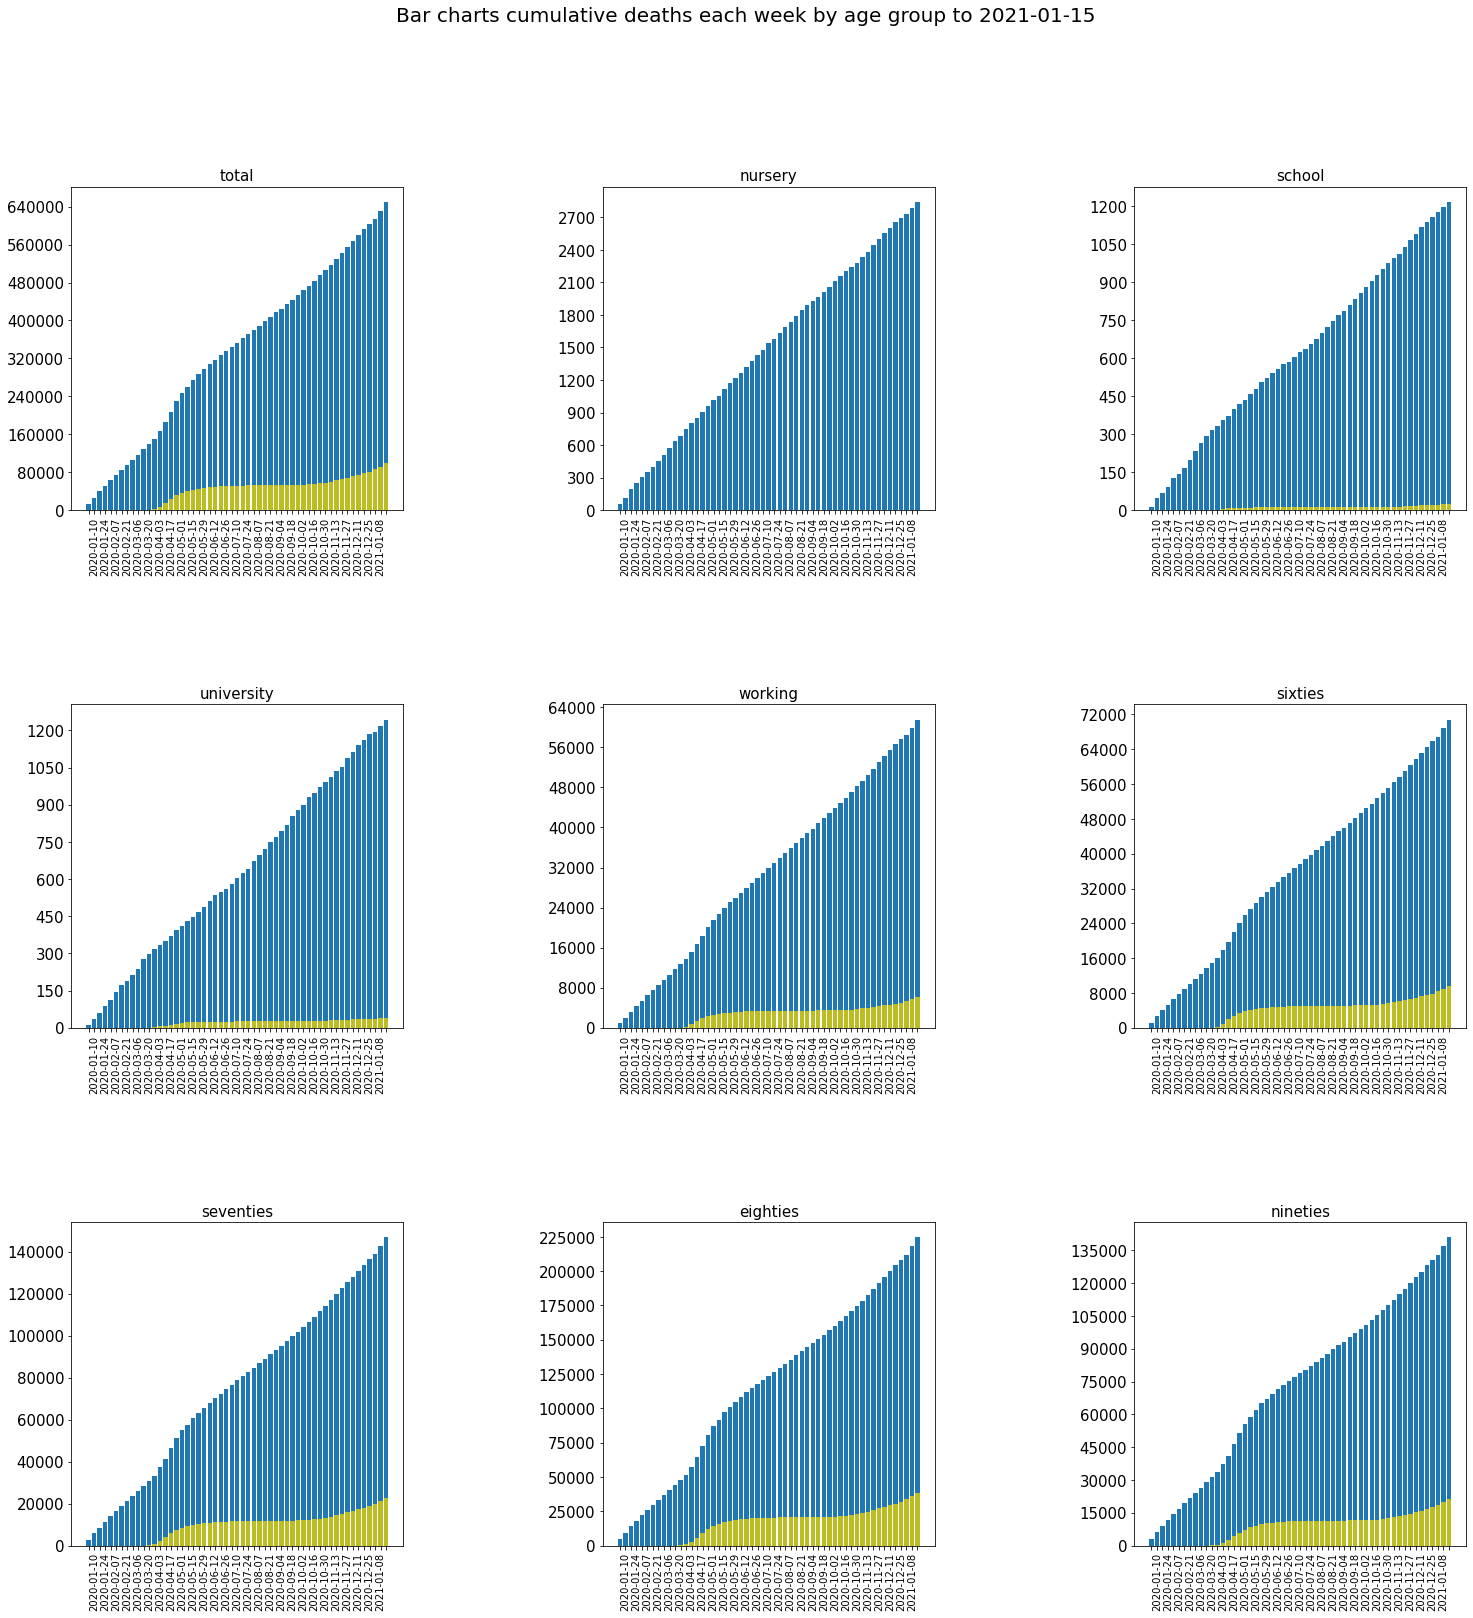

In [209]:
# bar charts showing number of deaths for each age group per week

col_names = ['total', 'nursery','school','university','working',
             'sixties','seventies','eighties','nineties']

#fig, ax = plt.subplots(nrows=int(len(col_names)/3)+1, ncols=3, figsize=(25,25))
fig, ax = plt.subplots(nrows=int(len(col_names)/3), ncols=3, figsize=(25,25))

plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.suptitle('Bar charts cumulative deaths each week by age group to ' + last_date, fontsize = 20)
#plt.suptitle("anything over 'Less than a year' indicates that returning members keep their history", fontsize = 20)

x = df_deaths_comp.index.values

labels = list(df_deaths_comp['date'])

for i in range(1,len(labels),2):
    labels[i-1]=''
if len(labels) % 2 != 0:
    labels[-1]=''

for ii in range(len(col_names)):
    #for i in range(len(df)):
    y1 = df_deaths_comp[col_names[ii] + '_cum_all']
    y2 = df_deaths_comp[col_names[ii] + '_cum']
    ax[int(ii/3),ii - 3*int(ii/3)].set_title(col_names[ii], fontsize=15)
    ax[int(ii/3),ii - 3*int(ii/3)].set_xticks(x)
    ax[int(ii/3),ii - 3*int(ii/3)].set_xticklabels(labels, rotation = 90)
    ax[int(ii/3),ii - 3*int(ii/3)].yaxis.set_tick_params(labelsize=15)
    ax[int(ii/3),ii - 3*int(ii/3)].yaxis.set_major_locator(MaxNLocator(integer=True))
    ax[int(ii/3),ii - 3*int(ii/3)].bar(x,y1, color='#1f77b4')
    ax[int(ii/3),ii - 3*int(ii/3)].bar(x,y2, color='#bcbd22')
    #ax[int(ii/3),ii - 3*int(ii/3)].bar(df_deaths_comp['date'][i],y1[i], color='#1f77b4')

start_date = df_deaths_comp['date'].iloc[0]
end_date = df_deaths_comp['date'].iloc[-1]

if savePNG == 1 or PwrptPrep == 1:
    fileName = 'Coviduk - Bar charts cumulative deaths each week by age group.png'
    
    slideTitle.append('Bar charts cumulative deaths each week by age group to ' + last_date)
    slideText.append(str(start_date) + ' to ' + str(end_date))
    imagePath.append(fileName)

    # need to remove any dates filename when saved as .png given they change
    plt.savefig(fileName, bbox_inches = 'tight')
    
#     slideTitle_ = 'Bar charts cumulative deaths each week by age group to ' + last_date
#     slideText_ = (str(start_date) + ' to ' + str(end_date))
#     imagePath_ = (fileName)  
    
plt.show()

In [210]:
columns = ['nursery_%','school_%','university_%','working_%',
           'sixties_%','seventies_%','eighties_%','nineties_%']
chart_titles = ['nursery', 'school', 'university', 'working', 
                'sixties', 'seventies', 'eighties', 'nineties']

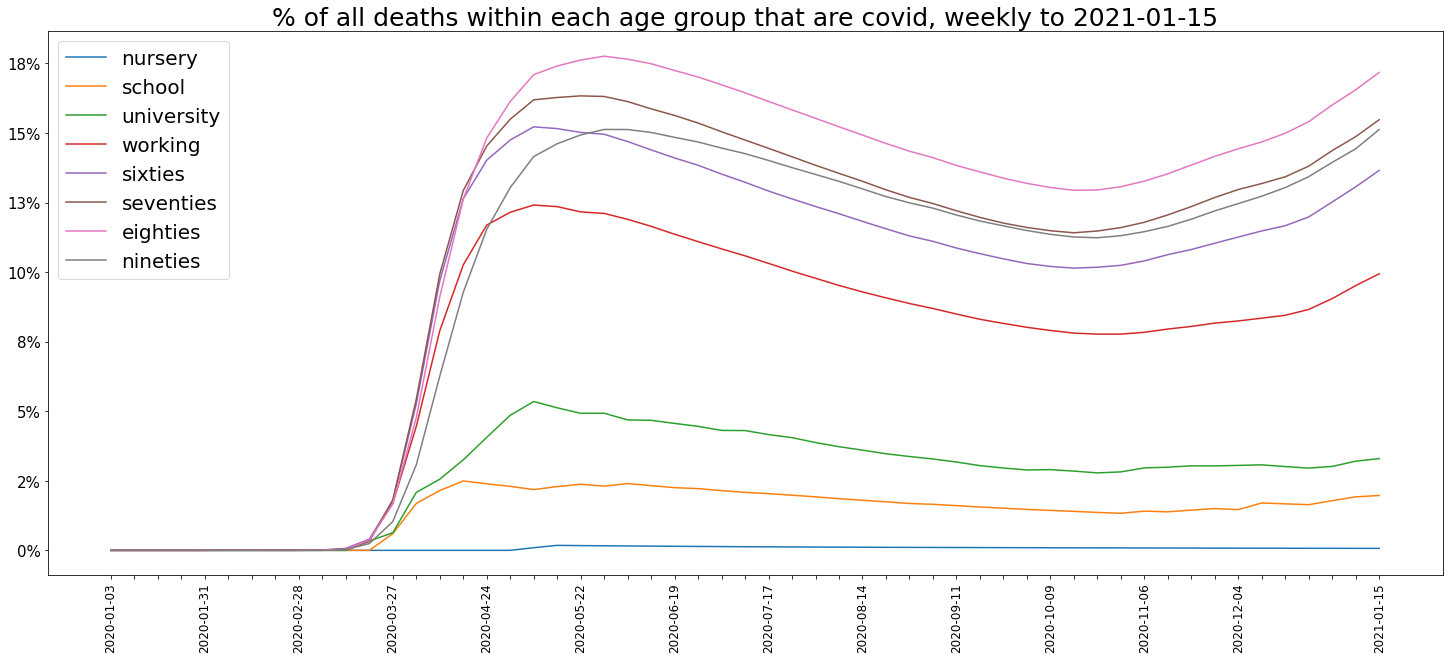

In [211]:
return1, return2, return3 = multiple_line_charts(df_deaths_comp, columns, chart_titles, '% of all deaths within each age group that are covid, weekly to ' + last_date)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [212]:
df_deathsAges_all_totals.head()

Week ended  2020-01-03  2020-01-10  \
0                             Total deaths, all ages     12254.0     14058.0   
1  week over the previous 5 years 1, 10, 11 (Engl...     12175.0     13822.0   

   2020-01-17  2020-01-24  2020-01-31  2020-02-07  2020-02-14  2020-02-21  \
0     12990.0     11856.0     11612.0     10986.0     10944.0     10841.0   
1     13216.0     12760.0     12206.0     11925.0     11627.0     11548.0   

   2020-02-28  2020-03-06  2020-03-13  2020-03-20  2020-03-27  2020-04-03  \
0     10816.0     10895.0     11019.0     10645.0     11141.0     16387.0   
1     11183.0     11498.0     11205.0     10573.0     10130.0     10305.0   

   2020-04-10  2020-04-17  2020-04-24  2020-05-01  2020-05-08  2020-05-15  \
0     18516.0     22351.0     21997.0     17953.0     12657.0     14573.0   
1     10520.0     10497.0     10458.0      9941.0      9576.0     10188.0   

   2020-05-22  2020-05-29  2020-06-05  2020-06-12  2020-06-19  2020-06-26  \
0     12288.0      9824.0     10709.0      9976.0      9339.0      8979.0   
1      9940.0      8171.0      9977.0      9417.0      9404.0      9293.0   

   2020-07-03  2020-07-10  2020-07-17  2020-07-24  2020-07-31  2020-08-07  \
0      9140.0      8690.0      8823.0      8891.0      8946.0      8945.0   
1      9183.0      9250.0      9093.0      9052.0      9036.0      9102.0   

   2020-08-14  2020-08-21  2020-08-28  2020-09-04  2020-09-11  2020-09-18  \
0      9392.0      9631.0      9032.0      7739.0      9811.0      9523.0   
1      9085.0      9157.0      8241.0      9182.0      9306.0      9264.0   

   2020-09-25  2020-10-02  2020-10-09  2020-10-16  2020-10-23  2020-10-30  \
0      9634.0      9945.0      9954.0     10534.0     10739.0     10887.0   
1      9377.0      9555.0      9811.0      9865.0      9759.0      9891.0   

   2020-11-06  2020-11-13  2020-11-20  2020-11-27  2020-12-04  2020-12-11  \
0     11812.0     12254.0     12535.0     12456.0     12303.0     12292.0   
1     10331.0     10350.0     10380.0     10357.0     10695.0     10750.0   

   2020-12-18  2020-12-25  2021-01-01  2021-01-08  2021-01-15  
0     13011.0     11520.0     10069.0     17751.0     18042.0  
1     11548.0      7954.0      7954.0     12175.0     13822.0

In [213]:
df_deathsAges_all_totals.set_index('Week ended', inplace=True)
df_deathsAges_all_totals = df_deathsAges_all_totals.T
df_deathsAges_all_totals.reset_index(inplace=True)
df_deathsAges_all_totals.rename(columns={"index": "date"}, inplace=True)
df_deathsAges_all_totals.columns.name=''

In [214]:
df_deathsAges_all_totals.head()

date  Total deaths, all ages  \
0  2020-01-03                 12254.0   
1  2020-01-10                 14058.0   
2  2020-01-17                 12990.0   
3  2020-01-24                 11856.0   
4  2020-01-31                 11612.0   

   week over the previous 5 years 1, 10, 11 (England and Wales)  
0                                            12175.0             
1                                            13822.0             
2                                            13216.0             
3                                            12760.0             
4                                            12206.0

In [215]:
df_deaths_comp = pd.merge(df_deaths_comp, df_deathsAges_all_totals, left_on='date', right_on='date', how='left')

In [216]:
final_column = df_deathsAges_all_totals.columns.tolist()[-1]

In [217]:
df_deaths_comp['5_year_average_cum'] = df_deaths_comp[final_column].cumsum()

In [218]:
df_deaths_comp['all_ex_covid'] = df_deaths_comp['total_cum_all'] - df_deaths_comp['total_cum']

In [219]:
df_deaths_comp['excess_deaths_incl_covid'] = df_deaths_comp['total_cum_all'] - df_deaths_comp['5_year_average_cum']
df_deaths_comp['excess_deaths_ex_covid'] = df_deaths_comp['all_ex_covid'] - df_deaths_comp['5_year_average_cum']

In [220]:
df_deaths_comp.head()

date   <1  1-4  5-9  10-14  15-19  20-24  25-29  30-34  35-39  40-44  \
0  2020-01-03  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1  2020-01-10  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2  2020-01-17  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3  2020-01-24  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4  2020-01-31  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   45-49  50-54  55-59  60-64  65-69  70-74  75-79  80-84  85-89  90+  \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0  0.0   

   nursery  school  university  working  sixties  seventies  eighties  \
0      0.0     0.0         0.0      0.0      0.0        0.0       0.0   
1      0.0     0.0         0.0      0.0      0.0        0.0       0.0   
2      0.0     0.0         0.0      0.0      0.0        0.0       0.0   
3      0.0     0.0         0.0      0.0      0.0        0.0       0.0   
4      0.0     0.0         0.0      0.0      0.0        0.0       1.0   

   nineties  nursery_cum  school_cum  university_cum  working_cum  \
0       0.0          0.0         0.0             0.0          0.0   
1       0.0          0.0         0.0             0.0          0.0   
2       0.0          0.0         0.0             0.0          0.0   
3       0.0          0.0         0.0             0.0          0.0   
4       0.0          0.0         0.0             0.0          0.0   

   sixties_cum  seventies_cum  eighties_cum  nineties_cum  <1_all  1-4_all  \
0          0.0            0.0           0.0           0.0    48.0      8.0   
1          0.0            0.0           0.0           0.0    50.0      9.0   
2          0.0            0.0           0.0           0.0    69.0      7.0   
3          0.0            0.0           0.0           0.0    53.0      9.0   
4          0.0            0.0           1.0           0.0    50.0      6.0   

   5-9_all  10-14_all  15-19_all  20-24_all  25-29_all  30-34_all  35-39_all  \
0      4.0        4.0        6.0       11.0       17.0       32.0       54.0   
1      8.0        9.0       16.0       23.0       37.0       46.0       68.0   
2      5.0        4.0       10.0       25.0       37.0       47.0       77.0   
3      4.0        8.0       15.0       30.0       36.0       38.0       79.0   
4      5.0        4.0       23.0       23.0       28.0       58.0       76.0   

   40-44_all  45-49_all  50-54_all  55-59_all  60-64_all  65-69_all  \
0       69.0      115.0      239.0      361.0      486.0      696.0   
1       85.0      191.0      279.0      426.0      604.0      857.0   
2      118.0      189.0      306.0      461.0      562.0      803.0   
3      116.0      160.0      280.0      381.0      535.0      791.0   
4      100.0      163.0      278.0      382.0      525.0      732.0   

   70-74_all  75-79_all  80-84_all  85-89_all  90+_all  nursery_all  \
0     1164.0     1535.0     2049.0     2457.0   2898.0         56.0   
1     1341.0     1724.0     2290.0     2697.0   3297.0         59.0   
2     1210.0     1612.0     2103.0     2421.0   2924.0         76.0   
3     1167.0     1474.0     1863.0     2188.0   2626.0         62.0   
4     1196.0     1445.0     1811.0     2124.0   2583.0         56.0   

   school_all  university_all  working_all  sixties_all  seventies_all  \
0        14.0            11.0        887.0       1182.0         2699.0   
1        33.0            23.0       1132.0       1461.0         3065.0   
2        19.0            25.0       1235.0       1365.0         2822.0   
3        27.0            30.0       1090.0       1326.0         2641.0   
4        32.0            23.0       1085.0       1257.0

In [221]:
columns = ['total_cum_all', 'all_ex_covid', '5_year_average_cum']
chart_titles = ['All deaths incl covid', 'All deaths ex covid', '5 year average']

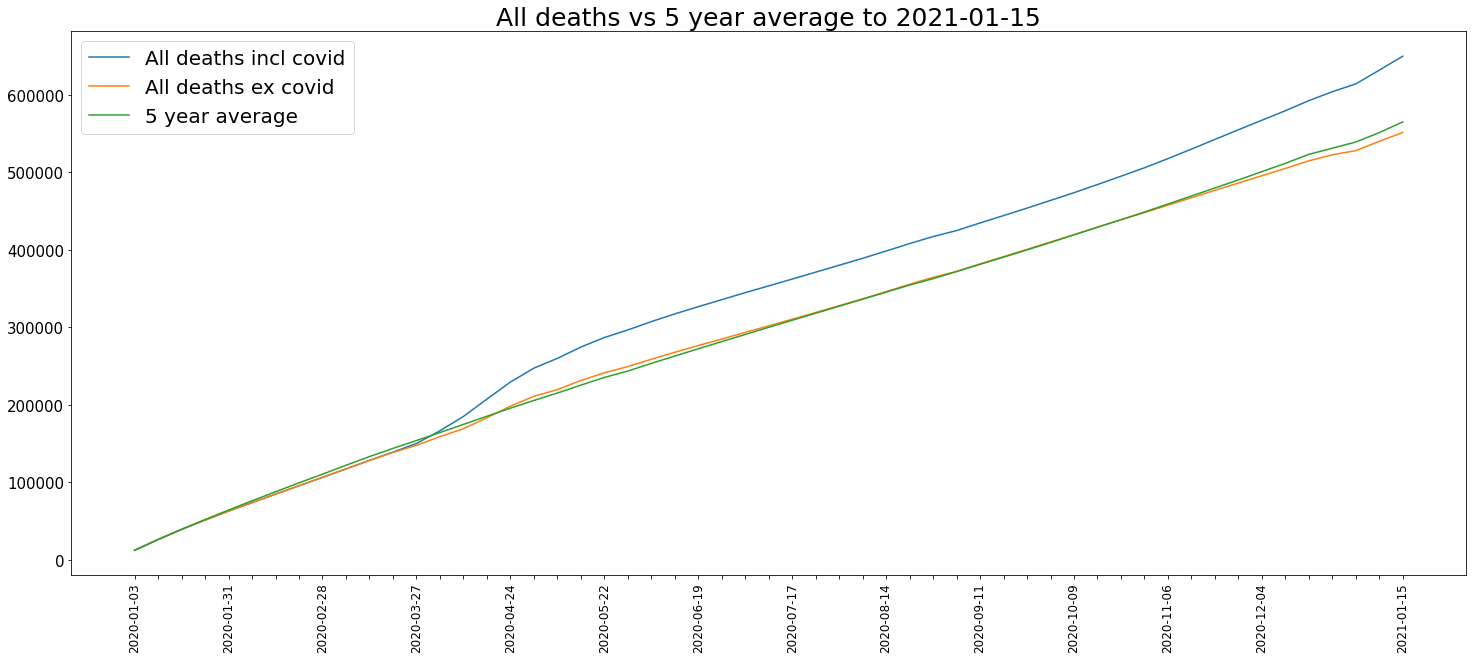

In [222]:
return1, return2, return3 = multiple_line_charts(df_deaths_comp, columns, chart_titles, 'All deaths vs 5 year average to '  + last_date)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [223]:
def one_chart_incl_df(df, column, chart_title, bar, percent):

    # plot 1 chart showing the % value  of STCs/STCM to total resi units on the site

    fig, ax = plt.subplots(figsize=(25,10))

    plt.subplots_adjust(hspace=0.6, wspace=0.2)

    x = df.index.values

    labels = list(df['date'])

    # prevent x-axis labels from overlapping by printing every nth label
    for i in range(4,len(labels),4):
        labels[i-1], labels[i-2], labels[i-3]='','',''

    labels[len(labels)-1]=list(df['date'])[-1]
    labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

    y1 = df[column]
    #y2 = df_rightmove['STCs_value_scdhd']/df_rightmove['resi_value_scdhd']
    #y3 = df_rightmove['STCs_value_new']/df_rightmove['resi_value_new']

    ax.set_title(chart_title, fontsize=25)
    ax.set_xticklabels(labels, rotation=90, fontsize=12)
    ax.set_xticks(x)
    
    if percent == 1:
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    
    ax.yaxis.set_tick_params(labelsize=15)
    
    if bar == 1:
        ax.bar(x, y1)
    else:
        ax.plot(x, y1)
        
    #ax.plot(x, y2)
    #ax.plot(x, y3)
    #ax.legend(('New Cases by Specimen Date'),fontsize=20)

    # if savePNG == 1 or PwrptPrep == 1:
    #     savefig = 'Rightmove LD - STCs and STCMs as a % of all resi sale units.png'
    #     plt.savefig(savefig, bbox_inches = 'tight')    
    #     slideTitle.append('Weekly offers on the site as a % of all units')
    #     slideText.append(str(first_data) + ' to '+ str(monthNow))
    #     imagePath.append(savefig)

    start_date = df['date'].iloc[0]
    end_date = df['date'].iloc[-1]
    
    fileName = 'Coviduk - onechart ' + str(chart_title) + '.png'  

    plt.savefig(fileName.split('202')[0] + '.png', bbox_inches = 'tight')
    
    slideTitle_ = chart_title
    slideText_ = (str(start_date) + ' to ' + str(end_date))
    imagePath_ = (fileName.split('202')[0] + '.png')  
    
    plt.show()
    
    return slideTitle_, slideText_, imagePath_

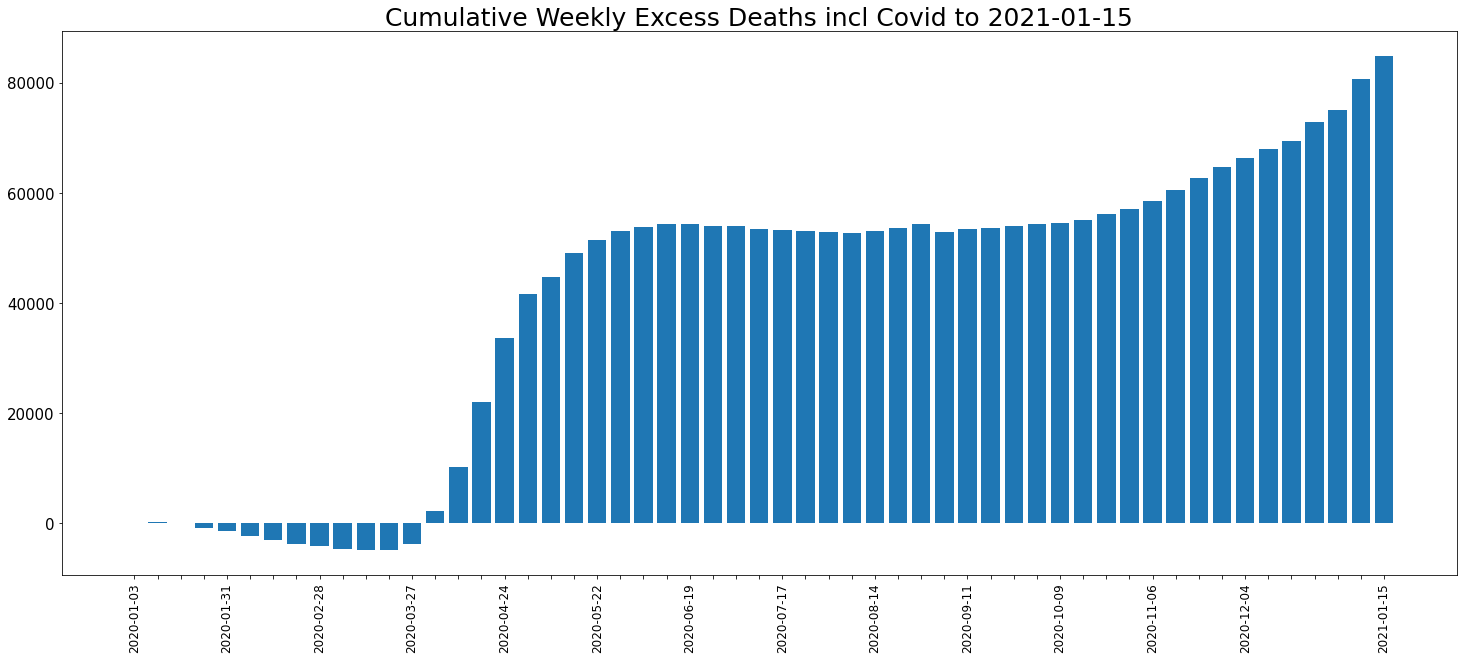

In [224]:
return1, return2, return3 = one_chart_incl_df(df_deaths_comp, 'excess_deaths_incl_covid', 'Cumulative Weekly Excess Deaths incl Covid to '  + last_date,1,0)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

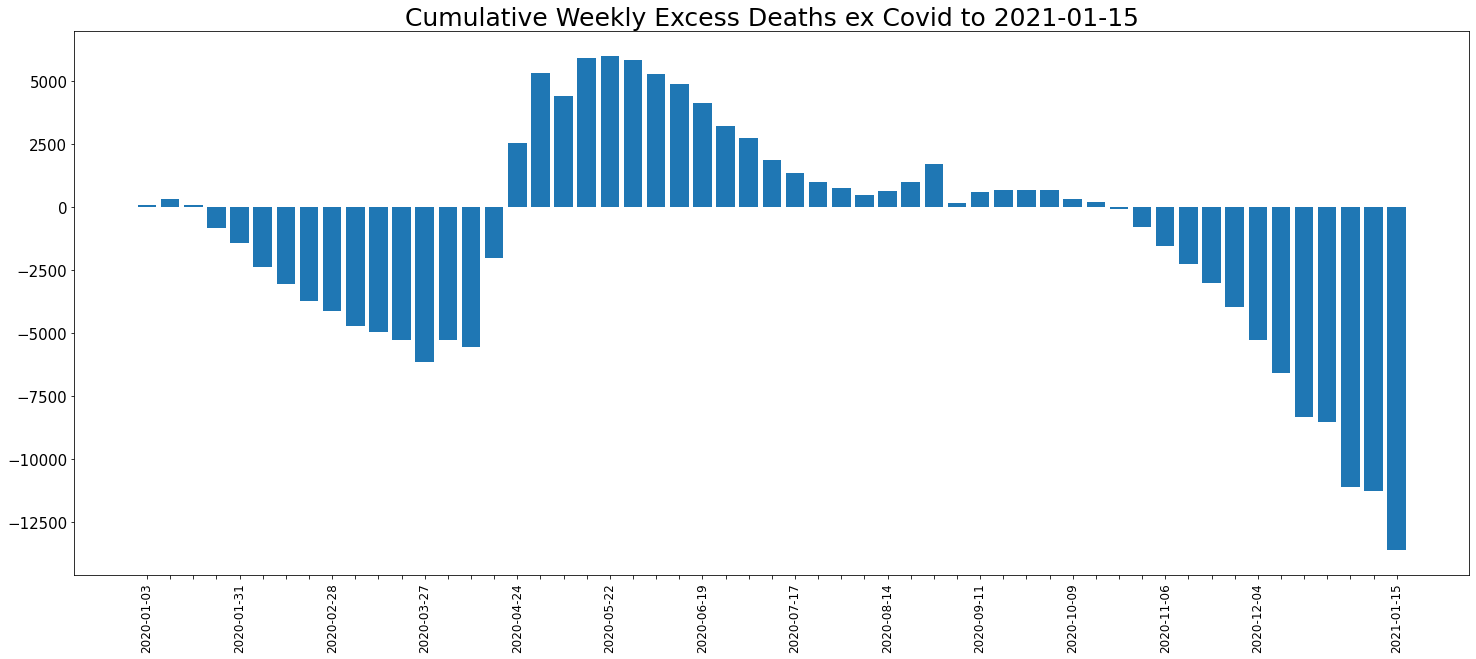

In [225]:
return1, return2, return3 = one_chart_incl_df(df_deaths_comp, 'excess_deaths_ex_covid', 'Cumulative Weekly Excess Deaths ex Covid to '  + last_date,1,0)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [226]:
df_deaths_comp.tail()

date   <1  1-4  5-9  10-14  15-19  20-24  25-29  30-34  35-39  \
50  2020-12-18  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    4.0   
51  2020-12-25  0.0  0.0  0.0    0.0    0.0    0.0    4.0    6.0    3.0   
52  2021-01-01  0.0  0.0  2.0    0.0    0.0    1.0    5.0    9.0   14.0   
53  2021-01-08  0.0  0.0  0.0    0.0    2.0    3.0    7.0   10.0   21.0   
54  2021-01-15  0.0  0.0  0.0    0.0    1.0    2.0    2.0    7.0   22.0   

    40-44  45-49  50-54  55-59  60-64  65-69  70-74  75-79   80-84   85-89  \
50   11.0   22.0   44.0   80.0  108.0  173.0  287.0  414.0   627.0   681.0   
51   13.0   30.0   62.0   92.0  134.0  218.0  384.0  484.0   689.0   782.0   
52   19.0   42.0   77.0  131.0  223.0  264.0  447.0  640.0   871.0   964.0   
53   24.0   57.0  114.0  176.0  266.0  348.0  575.0  719.0  1064.0  1132.0   
54   31.0   69.0  105.0  177.0  282.0  397.0  613.0  885.0  1150.0  1295.0   

       90+  nursery  school  university  working  sixties  seventies  \
50   762.0      0.0     0.0         0.0    161.0    281.0      701.0   
51   839.0      0.0     0.0         0.0    210.0    352.0      868.0   
52   988.0      0.0     2.0         1.0    297.0    487.0     1087.0   
53  1224.0      0.0     2.0         3.0    409.0    614.0     1294.0   
54  1550.0      0.0     1.0         2.0    413.0    679.0     1498.0   

    eighties  nineties  nursery_cum  school_cum  university_cum  working_cum  \
50    1308.0     762.0          2.0        19.0            35.0       4786.0   
51    1471.0     839.0          2.0        19.0            35.0       4996.0   
52    1835.0     988.0          2.0        21.0            36.0       5293.0   
53    2196.0    1224.0          2.0        23.0            39.0       5702.0   
54    2445.0    1550.0          2.0        24.0            41.0       6115.0   

    sixties_cum  seventies_cum  eighties_cum  nineties_cum  <1_all  1-4_all  \
50       7534.0        17961.0       30639.0       16707.0    46.0      5.0   
51       7886.0        18829.0       32110.0       17546.0    33.0      7.0   
52       8373.0        19916.0       33945.0       18534.0    32.0      4.0   
53       8987.0        21210.0       36141.0       19758.0    52.0      6.0   
54       9666.0        22708.0       38586.0       21308.0    52.0      3.0   

    5-9_all  10-14_all  15-19_all  20-24_all  25-29_all  30-34_all  35-39_all  \
50      4.0        5.0       11.0       24.0       38.0       57.0       73.0   
51      5.0        6.0       10.0       21.0       35.0       46.0       70.0   
52      1.0        9.0        8.0       10.0       24.0       27.0       43.0   
53      4.0        2.0       15.0       23.0       29.0       57.0       72.0   
54      1.0        5.0       14.0       26.0       37.0       56.0      102.0   

    40-44_all  45-49_all  50-54_all  55-59_all  60-64_all  65-69_all  \
50      115.0      189.0      317.0      437.0      581.0      805.0   
51       99.0      179.0      262.0      359.0      515.0      729.0   
52       68.0      123.0      203.0      311.0      449.0      619.0   
53      107.0      231.0      392.0      547.0      808.0     1097.0   
54      152.0      241.0      419.0      572.0      869.0     1145.0   

    70-74_all  75-79_all  80-84_all  85-89_all  90+_all  nursery_all  \
50     1246.0     1614.0     2124.0     2439.0   2881.0         51.0   
51     1154.0     1436.0     1892.0     2154.0   2508.0         40.0   
52      990.0     1262.0     1651.0     1980.0   2255.0         36.0   
53     1748.0     2284.0     2985.0     3296.0   3996.0         58.0   
54     1799.0     2280.0     3004.0     3278.0   3987.0         55.0   

    school_all  university_all  working_all  sixties_all  seventies_all  \
50        20.0            24.0       1226.0       1386.0         2860.0   
51        21.0            21.0       1050.0       1244.0         2590.0   
52        18.0            10.0        799.0       1068.0         2252.0   
53        21.0            23.0       1435.0     

In [227]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    #plt.savefig('Auto Trader - bar chart of Lookers cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('Data looking at the Vaccine Rollout)')
    slideText.append('')
    imagePath.append('')

plt.show()

In [228]:
df_vac.head()

date  areaType   areaCode        areaName  \
0  2021-01-10  overview  K02000001  United Kingdom   
1  2021-01-11  overview  K02000001  United Kingdom   
2  2021-01-12  overview  K02000001  United Kingdom   
3  2021-01-13  overview  K02000001  United Kingdom   
4  2021-01-14  overview  K02000001  United Kingdom   

   cumPeopleVaccinatedFirstDoseByPublishDate  \
0                                    2286572   
1                                    2431648   
2                                    2639309   
3                                    2918252   
4                                    3234946   

   newPeopleVaccinatedFirstDoseByPublishDate  \
0                                        NaN   
1                                   145076.0   
2                                   207661.0   
3                                   278943.0   
4                                   316694.0   

   newPeopleVaccinatedSecondDoseByPublishDate  \
0                                         NaN   
1                                     20768.0   
2                                     16065.0   
3                                      9745.0   
4                                      5257.0   

   cumPeopleVaccinatedSecondDoseByPublishDate  
0                                      391399  
1                                      412167  
2                                      428232  
3                                      437977  
4                                      443234

In [229]:
last_date = df_vac['date'].iloc[-1]

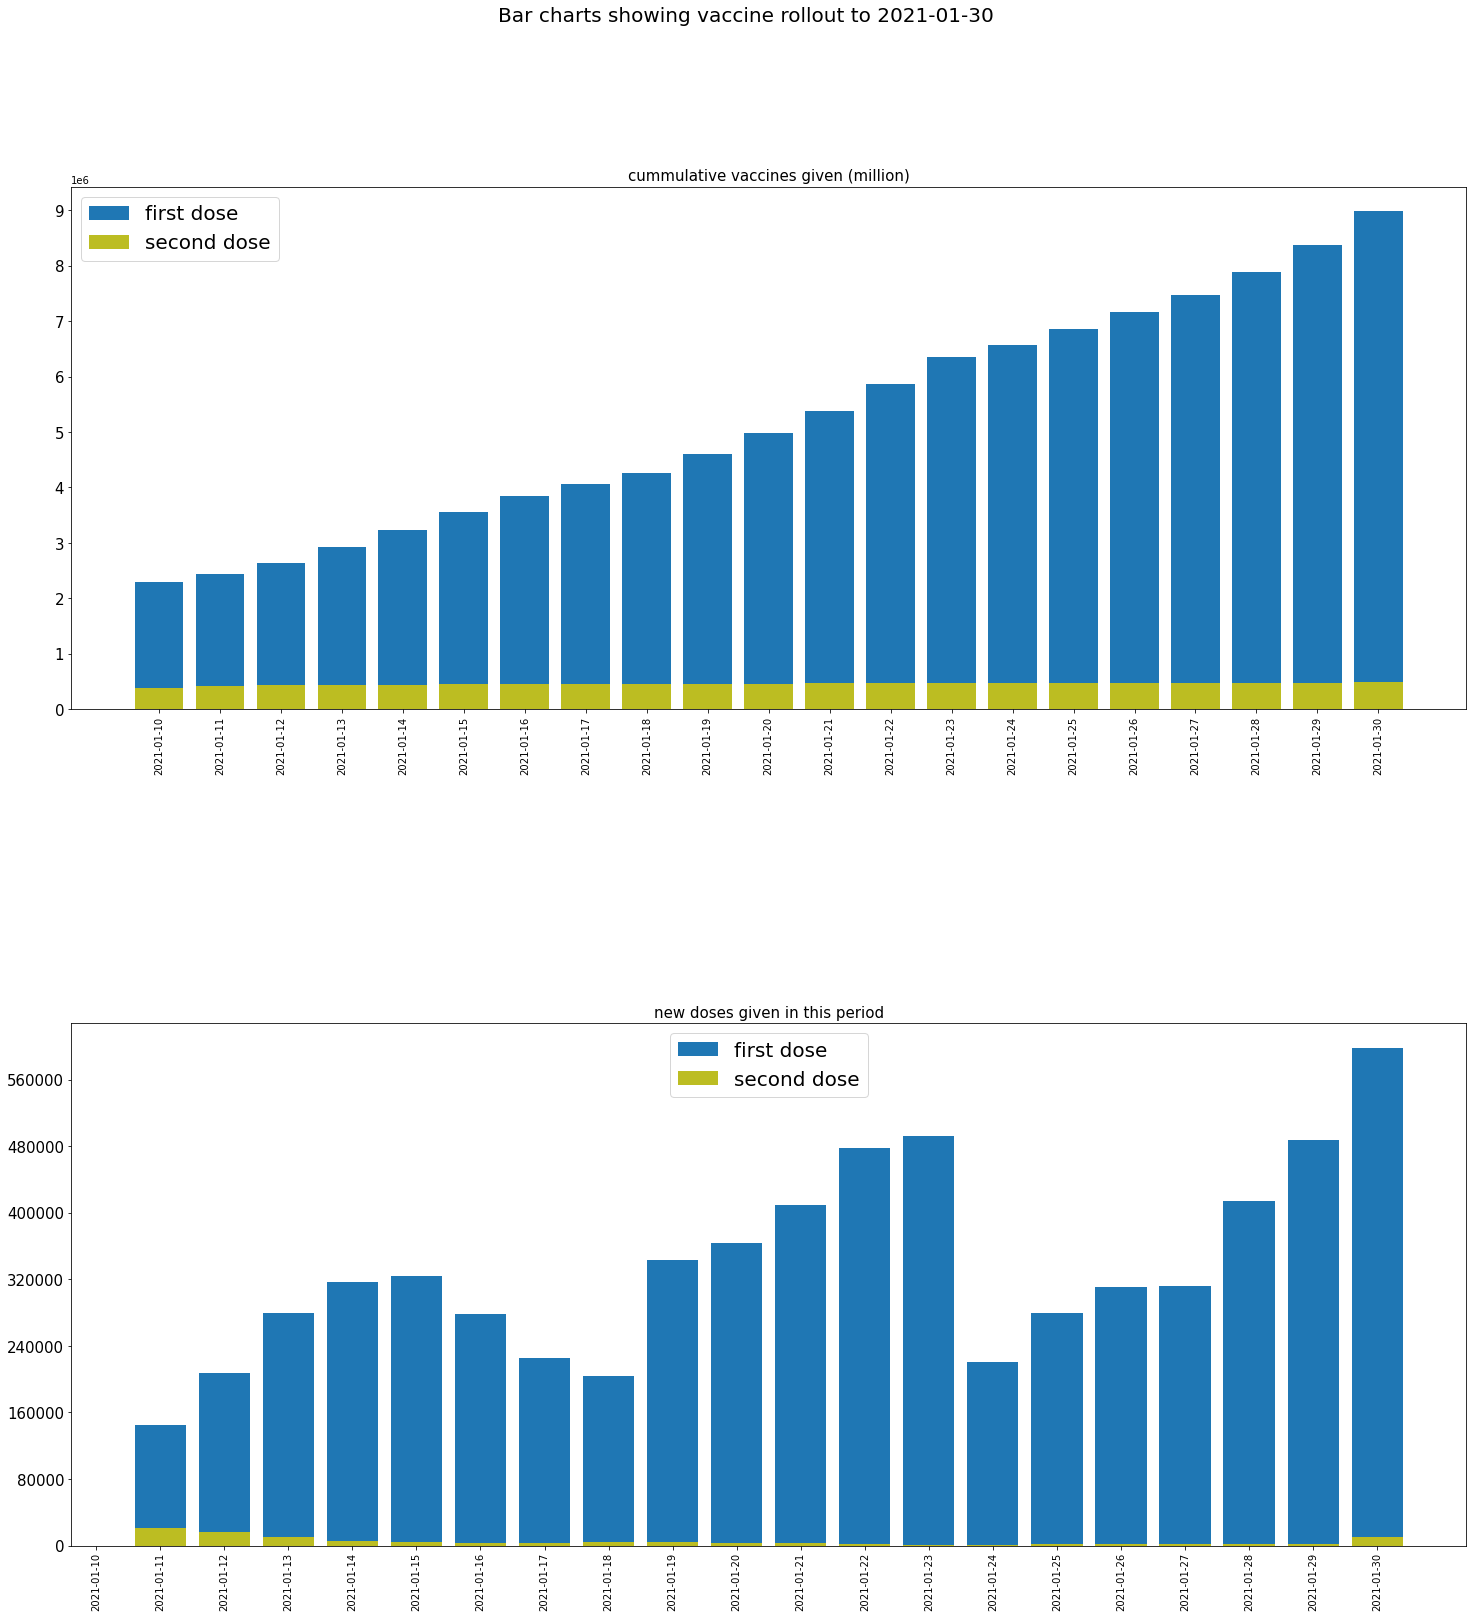

In [230]:
# bar charts showing vaccine rollout

col_names = ['cumPeopleVaccinatedFirstDoseByPublishDate', 'cumPeopleVaccinatedSecondDoseByPublishDate',
             'newPeopleVaccinatedFirstDoseByPublishDate', 'newPeopleVaccinatedSecondDoseByPublishDate']

titles = ['cummulative vaccines given (million)', 'new doses given in this period']

#fig, ax = plt.subplots(nrows=int(len(col_names)/3)+1, ncols=3, figsize=(25,25))
fig, ax = plt.subplots(nrows=int(len(col_names)/2), ncols=1, figsize=(25,25))

plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.suptitle('Bar charts showing vaccine rollout to ' + last_date, fontsize = 20)
#plt.suptitle("anything over 'Less than a year' indicates that returning members keep their history", fontsize = 20)

x = df_vac.index.values

labels = list(df_vac['date'])

# for i in range(1,len(labels),2):
#     labels[i-1]=''
# if len(labels) % 2 != 0:
#     labels[-1]=''

for ii in range(0,len(col_names),2):
    #for i in range(len(df)):
    y1 = df_vac[col_names[ii]]
    y2 = df_vac[col_names[ii+1]]
    ax[int(ii/2)].set_title(titles[int(ii/2)], fontsize=15)
    ax[int(ii/2)].set_xticks(x)
    ax[int(ii/2)].set_xticklabels(labels, rotation = 90)
    ax[int(ii/2)].yaxis.set_tick_params(labelsize=15)
    ax[int(ii/2)].yaxis.set_major_locator(MaxNLocator(integer=True))
    ax[int(ii/2)].bar(x,y1, color='#1f77b4', label = 'first dose')
    ax[int(ii/2)].bar(x,y2, color='#bcbd22', label = 'second dose')
    #ax[int(ii/3),ii - 3*int(ii/3)].bar(df_deaths_comp['date'][i],y1[i], color='#1f77b4')
    ax[int(ii/2)].legend(fontsize=20)    

start_date = df_vac['date'].iloc[0]
end_date = df_vac['date'].iloc[-1]

if savePNG == 1 or PwrptPrep == 1:
    fileName = 'Coviduk - bar charts vaccine rollout.png'
    
    slideTitle.append('Bar charts showing vaccine rollout to ' + last_date)
    slideText.append(str(start_date) + ' to ' + str(end_date))
    imagePath.append(fileName)

    # need to remove any dates filename when saved as .png given they change
    plt.savefig(fileName, bbox_inches = 'tight')
    
#     slideTitle_ = 'Bar charts cumulative deaths each week by age group to ' + last_date
#     slideText_ = (str(start_date) + ' to ' + str(end_date))
#     imagePath_ = (fileName)  
    
plt.show()

In [231]:
#
# Preparing the presentation
#

In [232]:
if PwrptPrep == 1:
    prs = Presentation('Presentation - template.pptx')
    prs_type = 'agi'
    #prs = Presentation('Presentation - template2.pptx')
    #prs_type = 'plain'

In [233]:
# change the title and date on the front page
# the slide shapes do not go nicely 0,1,2 they go 1,2,0
if PwrptPrep == 1:
    
    #listShapes = [1,2,0]
    
    if prs_type !='plain':
        
        listShapes = [1,2,0]
        for i in range(3):
            slide = prs.slides[0]
            shape = slide.shapes[listShapes[i]]
            text_frame = shape.text_frame
            text_frame.paragraphs[0].runs[0].text = presentationTitle[i]
    
    else:        
        listShapes = [0,1,2]
        for i in range(3):
            slide = prs.slides[0]
            shape = slide.shapes[listShapes[i]]
            text_frame = shape.text_frame
            text_frame.paragraphs[0].text = presentationTitle[i]

In [234]:
# # add the Preamble and Summary slides
# if PwrptPrep == 1:

#     title_Preamble_Summary = ['Preamble', 'Summary']

#     for i in range(2):
#         blank_slide_layout = prs.slide_layouts[15]
#         slide = prs.slides.add_slide(blank_slide_layout)

#         title = slide.shapes.title
#         title.text = title_Preamble_Summary[i]

#         top = height = Inches(1.5)
#         width = Inches(10.25)
#         left = Inches(0.25)
#         txBox = slide.shapes.add_textbox(left, top, width, height)
#         tf = txBox.text_frame
#         tf.word_wrap = True
#         p = tf.add_paragraph()
#         p.level = 1
#         p.text = 'start writing here'

In [235]:
# add the Preamble and Summary slides
if PwrptPrep == 1:

    title_Preamble_Summary = ['Preamble']
    
    for i in range(1):
        if prs_type !='plain':
            blank_slide_layout = prs.slide_layouts[15]
            left_inches = 0.25
            p_level = 1
        else:
            blank_slide_layout = prs.slide_layouts[5]
            left_inches = 0.955
            p_level = 0
        
        slide = prs.slides.add_slide(blank_slide_layout)

        title = slide.shapes.title
        title.text = title_Preamble_Summary[i]

        top = height = Inches(1.5)
        width = Inches(10.25)
        left = Inches(left_inches)
        txBox = slide.shapes.add_textbox(left, top, width, height)
        tf = txBox.text_frame
        tf.word_wrap = True
        p = tf.add_paragraph()
        p.level = p_level
        if i == 0:
            p.text = 'Daily and some weekly charts showing UK Covid Testing, new cases, hospitalisations including occupied ventilation beds and deaths.  Data Further visualised by age and by region.  End of chart pack has excess deaths and vaccine rollout'
            p = tf.add_paragraph()
            p.level = p_level 
            p.text = 'The charts for England only given i could only find hospital admission by age for England'
            p = tf.add_paragraph()
            p.level = p_level
            p.text = 'All the data for these charts comes from UK government websites'
            p = tf.add_paragraph()
            p.level = p_level
            p.text = 'Some charts are derived from other charts'
            p = tf.add_paragraph()
            p.level = p_level
            p.text = 'For the daily charts, the latest data points are subject to revision as new data is submitted'         
#             p = tf.add_paragraph()
#             p.level = p_level
#             p.text = 'Sources:'
            
#             sources = [
#             'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newCasesBySpecimenDate%22:%22newCasesBySpecimenDate%22,%22cumCasesBySpecimenDate%22:%22cumCasesBySpecimenDate%22%7D&format=csv',
#             'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newDeaths28DaysByDeathDate%22:%22newDeaths28DaysByDeathDate%22,%22cumDeaths28DaysByDeathDate%22:%22cumDeaths28DaysByDeathDate%22%7D&format=csv',
#             'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newAdmissions%22:%22newAdmissions%22,%22cumAdmissions%22:%22cumAdmissions%22%7D&format=csv',
#             'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22hospitalCases%22:%22hospitalCases%22%7D&format=csv',
#             'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22covidOccupiedMVBeds%22:%22covidOccupiedMVBeds%22%7D&format=csv',
#             'https://coronavirus.data.gov.uk/api/v1/data?filters=areaName=United%2520Kingdom;areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newVirusTests%22:%22newVirusTests%22,%22cumVirusTests%22:%22cumVirusTests%22%7D&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=newCasesBySpecimenDateAgeDemographics&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=nation&areaCode=E92000001&metric=newCasesBySpecimenDateAgeDemographics&metric=newDeaths28DaysByDeathDateAgeDemographics&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=nation&areaCode=E92000001&metric=cumAdmissionsByAge&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=cumPeopleVaccinatedFirstDoseByVaccinationDate&metric=cumPeopleVaccinatedSecondDoseByVaccinationDate&metric=weeklyPeopleVaccinatedFirstDoseByVaccinationDate&metric=weeklyPeopleVaccinatedSecondDoseByVaccinationDate&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000004&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',    
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000006&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000007&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000001&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000001&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000008&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000009&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000005&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000003&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',   
#             ]
            
#             for i in range(len(sources)):
#                 p = tf.add_paragraph()
#                 p.level = p_level + 1
#                 p.font.size = Pt(6)
#                 p.text = sources[i]

In [236]:
# add the Preamble and Summary slides
if PwrptPrep == 1:

    title_Preamble_Summary = ['Sources']
    
    for i in range(1):
        if prs_type !='plain':
            blank_slide_layout = prs.slide_layouts[15]
            left_inches = 0.25
            p_level = 1
        else:
            blank_slide_layout = prs.slide_layouts[5]
            left_inches = 0.955
            p_level = 0
        
        slide = prs.slides.add_slide(blank_slide_layout)

        title = slide.shapes.title
        title.text = title_Preamble_Summary[i]

        top = height = Inches(1.5)
        width = Inches(10.25)
        left = Inches(left_inches)
        txBox = slide.shapes.add_textbox(left, top, width, height)
        tf = txBox.text_frame
        tf.word_wrap = True
        p = tf.add_paragraph()
        p.level = p_level
        if i == 0:
#             p.text = 'Daily and some weekly charts showing UK Covid Testing, new cases, hospitalisations including occupied ventilation beds, deaths.  And also looking at the data by age'
#             p = tf.add_paragraph()
#             p.level = p_level 
#             p.text = 'The charts at the end are for England only given i could only find hospital admission by age for England'
#             p = tf.add_paragraph()
#             p.level = p_level
#             p.text = 'All the data for these charts comes from UK government websites'
#             p = tf.add_paragraph()
#             p.level = p_level
#             p.text = 'Some charts are derived from other charts'
#             p = tf.add_paragraph()
#             p.level = p_level
#             p.text = 'For the daily charts, the latest data points are subject to revision as new data is submitted'         
#             p = tf.add_paragraph()
#             p.level = p_level
#             p.text = 'Sources:'
            
            sources = [
            'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newCasesBySpecimenDate%22:%22newCasesBySpecimenDate%22,%22cumCasesBySpecimenDate%22:%22cumCasesBySpecimenDate%22%7D&format=csv',
            'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newDeaths28DaysByDeathDate%22:%22newDeaths28DaysByDeathDate%22,%22cumDeaths28DaysByDeathDate%22:%22cumDeaths28DaysByDeathDate%22%7D&format=csv',
            'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newAdmissions%22:%22newAdmissions%22,%22cumAdmissions%22:%22cumAdmissions%22%7D&format=csv',
            'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22hospitalCases%22:%22hospitalCases%22%7D&format=csv',
            'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22covidOccupiedMVBeds%22:%22covidOccupiedMVBeds%22%7D&format=csv',
            'https://coronavirus.data.gov.uk/api/v1/data?filters=areaName=United%2520Kingdom;areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newVirusTests%22:%22newVirusTests%22,%22cumVirusTests%22:%22cumVirusTests%22%7D&format=csv',
            'https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=newCasesBySpecimenDateAgeDemographics&format=csv',
            'https://api.coronavirus.data.gov.uk/v2/data?areaType=nation&areaCode=E92000001&metric=newCasesBySpecimenDateAgeDemographics&metric=newDeaths28DaysByDeathDateAgeDemographics&format=csv',
            'https://api.coronavirus.data.gov.uk/v2/data?areaType=nation&areaCode=E92000001&metric=cumAdmissionsByAge&format=csv',
            'https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=cumPeopleVaccinatedFirstDoseByVaccinationDate&metric=cumPeopleVaccinatedSecondDoseByVaccinationDate&metric=weeklyPeopleVaccinatedFirstDoseByVaccinationDate&metric=weeklyPeopleVaccinatedSecondDoseByVaccinationDate&format=csv',
            'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000004&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',    
            'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000006&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
            'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000007&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
            'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000001&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
            'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000001&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
            'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000008&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
            'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000009&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
            'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000005&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
            'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000003&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',   
            ]
            
            for i in range(len(sources)):
                p = tf.add_paragraph()
                p.level = p_level + 1
                p.font.size = Pt(6)
                p.text = sources[i]

In [237]:
# add the Preamble and Summary slides
if PwrptPrep == 1:

    title_Preamble_Summary = ['Summary']
    
    for i in range(1):
        if prs_type !='plain':
            blank_slide_layout = prs.slide_layouts[15]
            left_inches = 0.25
            p_level = 1
        else:
            blank_slide_layout = prs.slide_layouts[5]
            left_inches = 0.955
            p_level = 0
        
        slide = prs.slides.add_slide(blank_slide_layout)

        title = slide.shapes.title
        title.text = title_Preamble_Summary[i]

        top = height = Inches(1.5)
        width = Inches(10.25)
        left = Inches(left_inches)
        txBox = slide.shapes.add_textbox(left, top, width, height)
        tf = txBox.text_frame
        tf.word_wrap = True
        p = tf.add_paragraph()
        p.level = p_level


In [238]:
# add the Chapter contents slide and Chapter 1 slide
if prs_type !='plain':

    if PwrptPrep == 1:

        if prs_type !='plain':
            blank_slide_layout = prs.slide_layouts[15]
        else:
            blank_slide_layout = prs.slide_layouts[5]

        slide = prs.slides.add_slide(blank_slide_layout)

        shapes = slide.shapes

        shapes.title.text = 'Contents'

        rows = cols = 2
        left = Inches(0.25)
        top = Inches(1.5)
        width = Inches(1.5)
        height = Inches(1.5)

        table = shapes.add_table(rows, cols, left, top, width, height).table

        # set column widths
        table.columns[0].width = Inches(1.5)
        table.columns[1].width = Inches(2.0)

        tableText = ['01', 'Charts', '02', 'Appendix']
        TableFont = [60, 14, 60, 14]
        tableCell1 = [0,0,1,1]
        tableCell2 = [0,1,0,1]

        for i in range(4):
            table.cell(tableCell1[i], tableCell2[i]).text = tableText[i]
            cell = table.cell(tableCell1[i], tableCell2[i])
            para = cell.text_frame.paragraphs[0]
            para.font.bold = True
            para.font.size = Pt(TableFont[i])
            para.font.color.rgb = RGBColor(0, 55, 129) 
            cell.vertical_anchor = MSO_ANCHOR.MIDDLE
            fill = cell.fill
            fill.background()

        slide = prs.slides.add_slide(prs.slide_layouts[9])
        placeholder = slide.placeholders[1]
        placeholder.text = '01'
        title = slide.shapes.title
        title.text = 'Charts'


In [239]:
# add a blank slide with title, text and saved graphic as per the list of items
if PwrptPrep == 1:
    
    for i in range(len(slideTitle)):

        if prs_type !='plain':
            blank_slide_layout = prs.slide_layouts[15]
            left_inches = 0.25
        else:
            blank_slide_layout = prs.slide_layouts[5]
            left_inches = 0.955
            
        slide = prs.slides.add_slide(blank_slide_layout)

        title = slide.shapes.title
        title.text = slideTitle[i]

        top = width = height = Inches(1.5)
        left = Inches(left_inches)
        txBox = slide.shapes.add_textbox(left, top, width, height)
        tf = txBox.text_frame

        p = tf.add_paragraph()
        p.text = slideText[i]
        p.font.bold = True
        p.font.size = Pt(14)

        left = Inches(left_inches)
        top = Inches(2.5)
        height = Inches(4)
        width = Inches(9)
        if imagePath[i] !='':
            pic = slide.shapes.add_picture(imagePath[i], left, top, width = width, height = height)

In [240]:
# # add the Appendix

if PwrptPrep == 1:
    if prs_type !='plain':
        blank_slide_layout = prs.slide_layouts[15]
    
        slide = prs.slides.add_slide(prs.slide_layouts[9])
        placeholder = slide.placeholders[1]
        placeholder.text = '02'
        title = slide.shapes.title
        title.text = 'Appendix'

In [241]:
# # add the 'First 5 lines of the latest upload slide'

# if PwrptPrep == 1:
    
#     blank_slide_layout = prs.slide_layouts[15]
#     slide = prs.slides.add_slide(blank_slide_layout)

#     shapes = slide.shapes

#     shapes.title.text = 'First 5 lines of most recent uploaded data file'

#     rows = 6
#     cols = 7
#     left = Inches(0.25)
#     top = Inches(1.5)
#     width = Inches(1.5)
#     height = Inches(0.25)

#     table = shapes.add_table(rows, cols, left, top, width, height).table

#     # set column widths
#     table.columns[0].width = Inches(0.5)
#     table.columns[1].width = Inches(2.5)
#     table.columns[2].width = Inches(2.5)
#     table.columns[3].width = Inches(1.0)
#     table.columns[4].width = Inches(1.5)
#     table.columns[5].width = Inches(1.0)
#     table.columns[6].width = Inches(1.0)
    
#     tableText = ['']
    
#     # table headers
#     for col in df[-1].columns[0:cols-1]:
#         tableText.append(col)
    
#     # populate rest of list with dataframe cells
#     for i in range((rows-1) * (cols-1)):
#         if i%(cols-1) == 0:
#             tableText.append(str(int(i/(cols-1))))          
#         tableText.append(str(df[-1].iat[int(i/(cols-1)), i%(cols-1)]))

#     for i in range((rows) * cols):
#         table.cell(int(i/(cols)), i%cols).text = tableText[i]
#         cell = table.cell(int(i/(cols)), i%cols)
#         para = cell.text_frame.paragraphs[0]
#         if i%cols == 0 or int(i/cols) == 0:
#             para.font.bold = True
#         else:
#             para.font.bold = False
#         para.font.size = Pt(10)
#         para.font.color.rgb = RGBColor(0, 0, 0) 
#         cell.vertical_anchor = MSO_ANCHOR.MIDDLE
#         fill = cell.fill
#         fill.background()
        

In [242]:
# # and the 'Code used to gather page', rotate the text
# # and upload the Python, github and Pandas pages

# if PwrptPrep == 1:
    
#     # list of appendix text files to take from my PC to be put into slides
#     appendixTitleList = ['Code used to gather the checkatrade data',
#                          'Appendix: Python Programming Language','Appendix: Github','Appendix: Pandas']
#     appendixFileList = ['Presentation - code checkatrade.txt',
#                         'Presentation - Python Slide.txt','Presentation - Github Slide.txt','Presentation - Pandas Slide.txt']
#     appendixFileList_alt = []
#     for element in appendixFileList:
#         appendixFileList_alt.append('C:/Users/andre/OneDrive/Documents/Big Data Project/Jupyter Notebook Items/' + element)
    
#     for i in range(len(appendixTitleList)):
#         blank_slide_layout = prs.slide_layouts[15]
#         slide = prs.slides.add_slide(blank_slide_layout)
#         title = slide.shapes.title
#         title.text = appendixTitleList[i]
#         try:
#             lines = [line.rstrip('\n') for line in open(appendixFileList[i])]
#         except:
#             lines = [line.rstrip('\n') for line in open(appendixFileList_alt[i])]
        
#         if (appendixTitleList[i] == 'Code used to gather the checkatrade data'): # rotate the text code -90
#             top = height = Inches(1.25)
#             width = Inches(10.25)
#             left = Inches(-4.25)
#             txBox = slide.shapes.add_textbox(left, top, width, height)
#             txBox.rotation = -90            
#         else: # other slides are normal
#             top = height = Inches(1.25)
#             width = Inches(10.25)
#             left = Inches(0.25)
#             txBox = slide.shapes.add_textbox(left, top, width, height)
#             txBox.rotation = 0
            
#         tf = txBox.text_frame
#         tf.word_wrap = True
        
#         for ii in range(len(lines)):
#             p = tf.add_paragraph()
#             p.level = 1
        
#             if (appendixTitleList[i] == 'Code used to gather the checkatrade data'): # reduce the font size
#                 p.font.size = Pt(8)
#                 p.level = 0  
#             else:
#                 txBox.rotation = 0
#                 p.font.size = Pt(12)            
            
#             if 'https' in lines[ii]:
#                 r = p.add_run()
#                 r.text = lines[ii].split('https')[0]
#                 r1 = p.add_run()
#                 r1.text = 'https' + lines[ii].split('https')[1]        
#                 hlink = r1.hyperlink
#                 hlink.address = r1.text
#             else:
#                 p.text = lines[ii]


In [243]:
# add closing slide

if PwrptPrep == 1:
    if prs_type !='plain':
        blank_slide_layout = prs.slide_layouts[40]
        slide = prs.slides.add_slide(blank_slide_layout)

In [244]:
# save completed presentation to file using name diven in the slide name cell
if PwrptPrep == 1:

    prs.save(saveFileName)

In [245]:
#
# all the slide types
# only to be run for reference
#

In [246]:
# prs = Presentation('Persentation - template.pptx')

In [247]:
# for i in range(43):

#     blank_slide_layout = prs.slide_layouts[i]
#     slide = prs.slides.add_slide(blank_slide_layout)

In [248]:
# prs.save('presentationPrep - all the slides.pptx')